In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests 
import hvplot

path = "Downloads/NYPD_Arrest_Data__Year_to_Date_.csv"
df = pd.read_csv(path)


In [64]:

df[['Law Category CD']].value_counts()

Law Category CD
3                  74915
1                  63227
2                    539
9                    328
I                    193
dtype: int64

In [58]:
df.columns = ['Arrest Number', 
              'Arrest Date', 
              'Offense Code', 
              'Offense Description 1', 
              'KY number', 
              'Offense Description 2', 
              'Law Code', 
              'Law Category CD',
              'Arrest Borough',
              'Arrest Precinct',
              'Jurisdiction Code',
              'Age Group',
              'Gender',
              'Ethnicity',
              'X Coordinate', 
              'Y Coordinate', 
              'Latitude', 
              'Longitude', 
              'Geocoded', 
              ]

In [4]:

gender_counts = df['Gender'].value_counts()

In [5]:

df['Arrest Borough'] = df['Arrest Borough'].replace(['B', 'S', 'K', 'M','Q'],
                                              ['Bronx', 
                                               'Staten Island', 
                                               'Brooklyn', 
                                               'Manhattan',
                                               'Queens'])

In [6]:
df['Law Category CD'] = df['Law Category CD'].replace(['M', 
                                                       'F', 
                                                       'V'],['3', '1','2'])

In [91]:
#AGES 18-24
#(Y)OUNG (A)DULT (M)ALE 18-24
Y_A_Male = df[(df['Age Group'] == '18-24') & (df['Gender'] =='M')]
Y_A_Male = Y_A_Male.dropna()
Y_A_M_AP_Count = Y_A_Male.groupby('Arrest Precinct').count()

#PER BOROUGH 18-24 Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
Y_A_M_Ma = Y_A_Male[(Y_A_Male['Arrest Borough'] == 'Manhattan')]
Y_A_M_BX = Y_A_Male[(Y_A_Male['Arrest Borough'] == 'Bronx')]
Y_A_M_BK = Y_A_Male[(Y_A_Male['Arrest Borough'] == 'Brooklyn')]
Y_A_M_Q = Y_A_Male[(Y_A_Male['Arrest Borough'] == 'Queens')]
Y_A_M_S = Y_A_Male[(Y_A_Male['Arrest Borough'] == 'Staten Island')]

#ARREST PRECINCT COUNTS PER BOROUGH 18-24 Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
Y_A_M_Ma_AP_Count = Y_A_M_Ma.groupby('Arrest Precinct').count()
Y_A_M_BX_AP_Count = Y_A_M_BX.groupby('Arrest Precinct').count()
Y_A_M_BK_AP_Count = Y_A_M_BK.groupby('Arrest Precinct').count()
Y_A_M_Q_AP_Count = Y_A_M_Q.groupby('Arrest Precinct').count()
Y_A_M_S_AP_Count = Y_A_M_S.groupby('Arrest Precinct').count()

#Simplified
Y_A_M_AP_Count_Dropped = Y_A_M_AP_Count[['Arrest Number']]
Y_A_M_S_AP_Count_Dropped = Y_A_M_S_AP_Count[['Arrest Number']]
Y_A_M_Ma_AP_Count_Dropped = Y_A_M_Ma_AP_Count[['Arrest Number']]
Y_A_M_BX_AP_Count_Dropped = Y_A_M_BX_AP_Count[['Arrest Number']]
Y_A_M_BK_AP_Count_Dropped = Y_A_M_BK_AP_Count[['Arrest Number']]
Y_A_M_Q_AP_Count_Dropped = Y_A_M_Q_AP_Count[['Arrest Number']]

#(Y)OUNG (A)DULT (F)EMALE 18-24
Y_A_Female = df[(df['Age Group'] == '18-24') & (df['Gender'] =='F')]
Y_A_Female = Y_A_Female.dropna()
Y_A_F_AP_Count = Y_A_Female.groupby('Arrest Precinct').count()

#PER BOROUGH 18-24 Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
Y_A_F_Ma = Y_A_Female[(Y_A_Female['Arrest Borough'] == 'Manhattan')]
Y_A_F_BX = Y_A_Female[(Y_A_Female['Arrest Borough'] == 'Bronx')]
Y_A_F_BK = Y_A_Female[(Y_A_Female['Arrest Borough'] == 'Brooklyn')]
Y_A_F_Q = Y_A_Female[(Y_A_Female['Arrest Borough'] == 'Queens')]
Y_A_F_S = Y_A_Female[(Y_A_Female['Arrest Borough'] == 'Staten Island')]

#ARREST PRECINCT COUNTS PER BOROUGH 18-24 Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
Y_A_F_Ma_AP_Count = Y_A_F_Ma.groupby('Arrest Precinct').count()
Y_A_F_BX_AP_Count = Y_A_F_BX.groupby('Arrest Precinct').count()
Y_A_F_BK_AP_Count = Y_A_F_BK.groupby('Arrest Precinct').count()
Y_A_F_Q_AP_Count = Y_A_F_Q.groupby('Arrest Precinct').count()
Y_A_F_S_AP_Count = Y_A_F_S.groupby('Arrest Precinct').count()

#Simplified
Y_A_F_AP_Count_Dropped = Y_A_F_AP_Count[['Arrest Number']]
Y_A_F_Ma_AP_Count_Dropped = Y_A_F_Ma_AP_Count[['Arrest Number']]
Y_A_F_BX_AP_Count_Dropped = Y_A_F_BX_AP_Count[['Arrest Number']]
Y_A_F_BK_AP_Count_Dropped = Y_A_F_BK_AP_Count[['Arrest Number']]
Y_A_F_Q_AP_Count_Dropped = Y_A_F_Q_AP_Count[['Arrest Number']]
Y_A_F_S_AP_Count_Dropped = Y_A_F_S_AP_Count[['Arrest Number']]

#AGES 25-44
#(T)WENTY (F)IVE (A)DULT (M)ALE 25-44
TF_A_Male = df[(df['Age Group'] == '25-44') & (df['Gender'] =='M')]
TF_A_Male = TF_A_Male.dropna()
TF_A_M_AP_Count = TF_A_Male.groupby('Arrest Precinct').count()

#PER BOROUGH 25-44
TF_A_M_Ma = TF_A_Male[(TF_A_Male['Arrest Borough'] == 'Manhattan')]
TF_A_M_BX = TF_A_Male[(TF_A_Male['Arrest Borough'] == 'Bronx')]
TF_A_M_BK = TF_A_Male[(TF_A_Male['Arrest Borough'] == 'Brooklyn')]
TF_A_M_Q = TF_A_Male[(TF_A_Male['Arrest Borough'] == 'Queens')]
TF_A_M_S = TF_A_Male[(TF_A_Male['Arrest Borough'] == 'Staten Island')]

#ARREST PRECINCT COUNTS PER BOROUGH 25-44
TF_A_M_Ma_AP_Count = TF_A_M_Ma.groupby('Arrest Precinct').count()
TF_A_M_BX_AP_Count = TF_A_M_BX.groupby('Arrest Precinct').count()
TF_A_M_BK_AP_Count = TF_A_M_BK.groupby('Arrest Precinct').count()
TF_A_M_Q_AP_Count = TF_A_M_Q.groupby('Arrest Precinct').count()
TF_A_M_S_AP_Count = TF_A_M_S.groupby('Arrest Precinct').count()

#Simplified
TF_A_M_AP_Count_Dropped = TF_A_M_AP_Count[['Arrest Number']]
TF_A_M_Ma_AP_Count_Dropped = TF_A_M_Ma_AP_Count[['Arrest Number']]
TF_A_M_BX_AP_Count_Dropped = TF_A_M_BX_AP_Count[['Arrest Number']]
TF_A_M_BK_AP_Count_Dropped = TF_A_M_BK_AP_Count[['Arrest Number']]
TF_A_M_Q_AP_Count_Dropped = TF_A_M_Q_AP_Count[['Arrest Number']]
TF_A_M_S_AP_Count_Dropped = TF_A_M_S_AP_Count[['Arrest Number']]

#(T)WENTY (F)IVE (A)DULT FEMALE 25-44
TF_A_Female = df[(df['Age Group'] == '25-44') & (df['Gender'] =='F')]
TF_A_Female = TF_A_Female.dropna()
TF_A_F_AP_Count = TF_A_Female.groupby('Arrest Precinct').count()

#PER BOROUGH 25-44 Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
TF_A_F_Ma = TF_A_Female[(TF_A_Female['Arrest Borough'] == 'Manhattan')]
TF_A_F_BX = TF_A_Female[(TF_A_Female['Arrest Borough'] == 'Bronx')]
TF_A_F_BK = TF_A_Female[(TF_A_Female['Arrest Borough'] == 'Brooklyn')]
TF_A_F_Q = TF_A_Female[(TF_A_Female['Arrest Borough'] == 'Queens')]
TF_A_F_S = TF_A_Female[(TF_A_Female['Arrest Borough'] == 'Staten Island')]

#ARREST PRECINCT COUNTS PER BOROUGH 25-44
TF_A_F_Ma_AP_Count = TF_A_F_Ma.groupby('Arrest Precinct').count()
TF_A_F_BX_AP_Count = TF_A_F_BX.groupby('Arrest Precinct').count()
TF_A_F_BK_AP_Count = TF_A_F_BK.groupby('Arrest Precinct').count()
TF_A_F_Q_AP_Count = TF_A_F_Q.groupby('Arrest Precinct').count()
TF_A_F_S_AP_Count = TF_A_F_S.groupby('Arrest Precinct').count()

#simplified
TF_A_F_AP_Count_Dropped = TF_A_F_AP_Count[['Arrest Number']]
TF_A_F_Ma_AP_Count_Dropped = TF_A_F_Ma_AP_Count[['Arrest Number']]
TF_A_F_BX_AP_Count_Dropped = TF_A_F_BX_AP_Count[['Arrest Number']]
TF_A_F_BK_AP_Count_Dropped = TF_A_F_BK_AP_Count[['Arrest Number']]
TF_A_F_Q_AP_Count_Dropped = TF_A_F_Q_AP_Count[['Arrest Number']]
TF_A_F_S_AP_Count_Dropped = TF_A_F_S_AP_Count[['Arrest Number']]

#AGES 45-64
#(O)LDER (A)DULT (M)ALE 45-64
O_A_Male = df[(df['Age Group'] == '45-64') & (df['Gender'] =='M')]
O_A_Male = O_A_Male.dropna()
O_A_M_AP_Count = O_A_Male.groupby('Arrest Precinct').count()

#PER BOROUGH 45-64 Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
O_A_M_Ma = O_A_Male[(O_A_Male['Arrest Borough'] == 'Manhattan')]
O_A_M_BX = O_A_Male[(O_A_Male['Arrest Borough'] == 'Bronx')]
O_A_M_BK = O_A_Male[(O_A_Male['Arrest Borough'] == 'Brooklyn')]
O_A_M_Q = O_A_Male[(O_A_Male['Arrest Borough'] == 'Queens')]
O_A_M_S = O_A_Male[(O_A_Male['Arrest Borough'] == 'Staten Island')]

#ARREST PRECINCT COUNTS PER BOROUGH 45-64
O_A_M_Ma_AP_Count = O_A_M_Ma.groupby('Arrest Precinct').count()
O_A_M_BX_AP_Count = O_A_M_BX.groupby('Arrest Precinct').count()
O_A_M_BK_AP_Count = O_A_M_BK.groupby('Arrest Precinct').count()
O_A_M_Q_AP_Count = O_A_M_Q.groupby('Arrest Precinct').count()
O_A_M_S_AP_Count = O_A_M_S.groupby('Arrest Precinct').count()

#simplified
O_A_M_AP_Count_Dropped = O_A_M_AP_Count[['Arrest Number']]
O_A_M_Ma_AP_Count_Dropped = O_A_M_Ma_AP_Count[['Arrest Number']]
O_A_M_BX_AP_Count_Dropped = O_A_M_BX_AP_Count[['Arrest Number']]
O_A_M_BK_AP_Count_Dropped = O_A_M_BK_AP_Count[['Arrest Number']]
O_A_M_Q_AP_Count_Dropped = O_A_M_Q_AP_Count[['Arrest Number']]
O_A_M_S_AP_Count_Dropped = O_A_M_S_AP_Count[['Arrest Number']]

#(O)LDER (A)DULT (F)EMALE 45-64
O_A_Female = df[(df['Age Group'] == '45-64') & (df['Gender'] =='F')]
O_A_Female = O_A_Female.dropna()

#ARREST PRECINCT COUNT 45-64
O_A_F_AP_Count = O_A_Female.groupby('Arrest Precinct').count()

#PER BOROUGH 45-64 Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
O_A_F_Ma = O_A_Female[(O_A_Female['Arrest Borough'] == 'Manhattan')]
O_A_F_BX = O_A_Female[(O_A_Female['Arrest Borough'] == 'Bronx')]
O_A_F_BK = O_A_Female[(O_A_Female['Arrest Borough'] == 'Brooklyn')]
O_A_F_Q = O_A_Female[(O_A_Female['Arrest Borough'] == 'Queens')]
O_A_F_S = O_A_Female[(O_A_Female['Arrest Borough'] == 'Staten Island')]

#PER BOROUGH 45-64 ARREST PRECINCT COUNT

O_A_F_Ma_AP_Count = O_A_F_Ma.groupby('Arrest Precinct').count()
O_A_F_BX_AP_Count = O_A_F_BX.groupby('Arrest Precinct').count()
O_A_F_BK_AP_Count = O_A_F_BK.groupby('Arrest Precinct').count()
O_A_F_Q_AP_Count = O_A_F_Q.groupby('Arrest Precinct').count()
O_A_F_S_AP_Count = O_A_F_S.groupby('Arrest Precinct').count()

#simplified
O_A_F_AP_Count_Dropped = O_A_F_AP_Count[['Arrest Number']]
O_A_F_Ma_AP_Count_Dropped = O_A_F_Ma_AP_Count[['Arrest Number']]
O_A_F_BX_AP_Count_Dropped = O_A_F_BX_AP_Count[['Arrest Number']]
O_A_F_BK_AP_Count_Dropped = O_A_F_BK_AP_Count[['Arrest Number']]
O_A_F_Q_AP_Count_Dropped = O_A_F_Q_AP_Count[['Arrest Number']]
O_A_F_S_AP_Count_Dropped = O_A_F_S_AP_Count[['Arrest Number']]

#AGES 65+
#(G)RAND (M)ALE 65+
G_Male = df[(df['Age Group'] == '65+') & (df['Gender'] =='M')]
G_Male = G_Male.dropna()

G_M_AP_Count = G_Male.groupby('Arrest Precinct').count()

#PER BOROUGH 65+ Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
G_M_Ma = G_Male[(G_Male['Arrest Borough'] == 'Manhattan')]
G_M_BX = G_Male[(G_Male['Arrest Borough'] == 'Bronx')]
G_M_BK = G_Male[(G_Male['Arrest Borough'] == 'Brooklyn')]
G_M_Q = G_Male[(G_Male['Arrest Borough'] == 'Queens')]
G_M_S = G_Male[(G_Male['Arrest Borough'] == 'Staten Island')]

#PER BOROUGH 65+ ARREST PRECINCT COUNT
G_M_Ma_AP_Count = G_M_Ma.groupby('Arrest Precinct').count()
G_M_BX_AP_Count = G_M_BX.groupby('Arrest Precinct').count()
G_M_BK_AP_Count = G_M_BK.groupby('Arrest Precinct').count()
G_M_Q_AP_Count = G_M_Q.groupby('Arrest Precinct').count()
G_M_S_AP_Count = G_M_S.groupby('Arrest Precinct').count()

#simplified
G_M_AP_Count_Dropped = G_M_AP_Count[['Arrest Number']]
G_M_Ma_AP_Count_Dropped = G_M_Ma_AP_Count[['Arrest Number']]
G_M_BX_AP_Count_Dropped = G_M_BX_AP_Count[['Arrest Number']]
G_M_BK_AP_Count_Dropped = G_M_BK_AP_Count[['Arrest Number']]
G_M_Q_AP_Count_Dropped = G_M_Q_AP_Count[['Arrest Number']]
G_M_S_AP_Count_Dropped = G_M_S_AP_Count[['Arrest Number']]

#(G)RAND (F)EMALE 65+
G_Female = df[(df['Age Group'] == '65+') & (df['Gender'] =='F')]
G_Female = G_Female.dropna()

G_F_AP_Count = G_Female.groupby('Arrest Precinct').count()

#PER BOROUGH 65+ Ma= Manhattan, BX= Bronx, BK= Brooklyn, Q= Queens, S= Staten Island
G_F_Ma = G_Female[(G_Female['Arrest Borough'] == 'Manhattan')]
G_F_BX = G_Female[(G_Female['Arrest Borough'] == 'Bronx')]
G_F_BK = G_Female[(G_Female['Arrest Borough'] == 'Brooklyn')]
G_F_Q = G_Female[(G_Female['Arrest Borough'] == 'Queens')]
G_F_S = G_Female[(G_Female['Arrest Borough'] == 'Staten Island')]

#PER BOROUGH 65+ ARREST PRECINCT COUNT
G_F_Ma_AP_Count = G_F_Ma.groupby('Arrest Precinct').count()
G_F_BX_AP_Count = G_F_BX.groupby('Arrest Precinct').count()
G_F_BK_AP_Count = G_F_BK.groupby('Arrest Precinct').count()
G_F_Q_AP_Count = G_F_Q.groupby('Arrest Precinct').count()
G_F_S_AP_Count = G_F_S.groupby('Arrest Precinct').count()

#simplified
G_F_AP_Count_Dropped = G_F_AP_Count[['Arrest Number']]
G_F_Ma_AP_Count_Dropped = G_F_Ma_AP_Count[['Arrest Number']]
G_F_BX_AP_Count_Dropped = G_F_BX_AP_Count[['Arrest Number']]
G_F_BK_AP_Count_Dropped = G_F_BK_AP_Count[['Arrest Number']]
G_F_Q_AP_Count_Dropped = G_F_Q_AP_Count[['Arrest Number']]
G_F_S_AP_Count_Dropped = G_F_S_AP_Count[['Arrest Number']]

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in the Bronx(Female 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

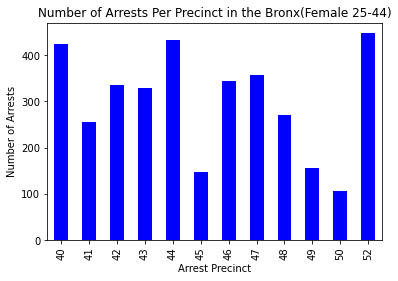

In [8]:
TF_A_F_BX_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in the Bronx(Female 25-44)',
                                   legend = False,
                                   color = 'blue'
                                   )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in the Bronx (Male 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

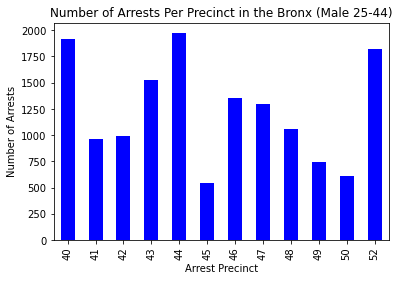

In [9]:
TF_A_M_BX_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in the Bronx (Male 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Manhattan (Female 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

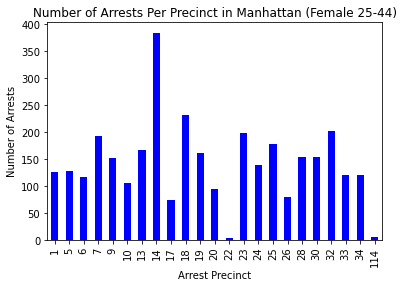

In [10]:
TF_A_F_Ma_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Manhattan (Female 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Manhattan (Male 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

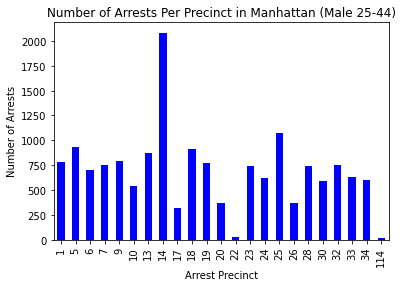

In [11]:
TF_A_M_Ma_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Manhattan (Male 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Brooklyn (Female 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

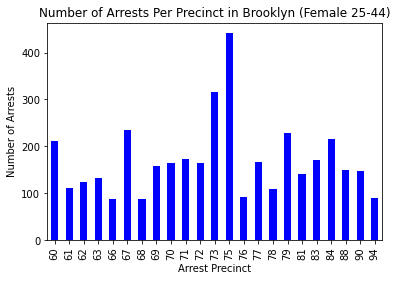

In [12]:
TF_A_F_BK_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Brooklyn (Female 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Brooklyn (Male 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

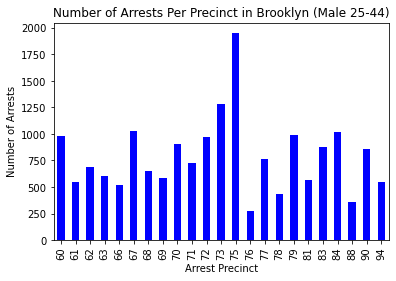

In [13]:
TF_A_M_BK_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Brooklyn (Male 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Queens (Female 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

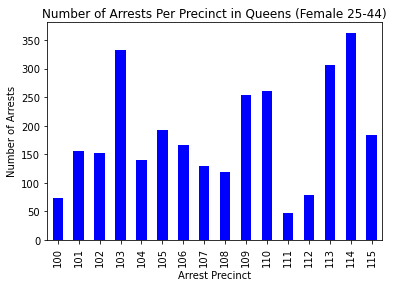

In [14]:
TF_A_F_Q_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Queens (Female 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Queens (Male 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

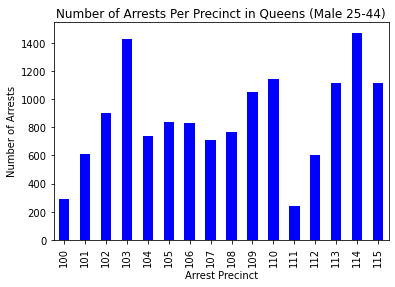

In [15]:
TF_A_M_Q_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Queens (Male 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Staten Island (Female 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

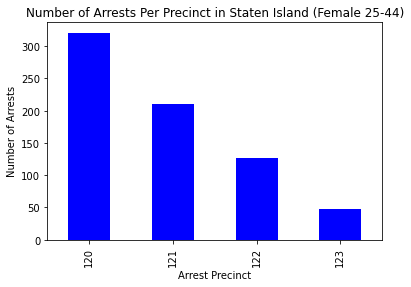

In [16]:
TF_A_F_S_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Staten Island (Female 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Staten Island (Male 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

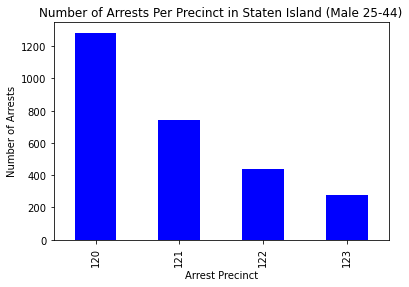

In [17]:
TF_A_M_S_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Staten Island (Male 25-44)',
                                   legend = False,
                                   color = 'blue')

<AxesSubplot:title={'center':'Number of Arrests Per Precinct (Female 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

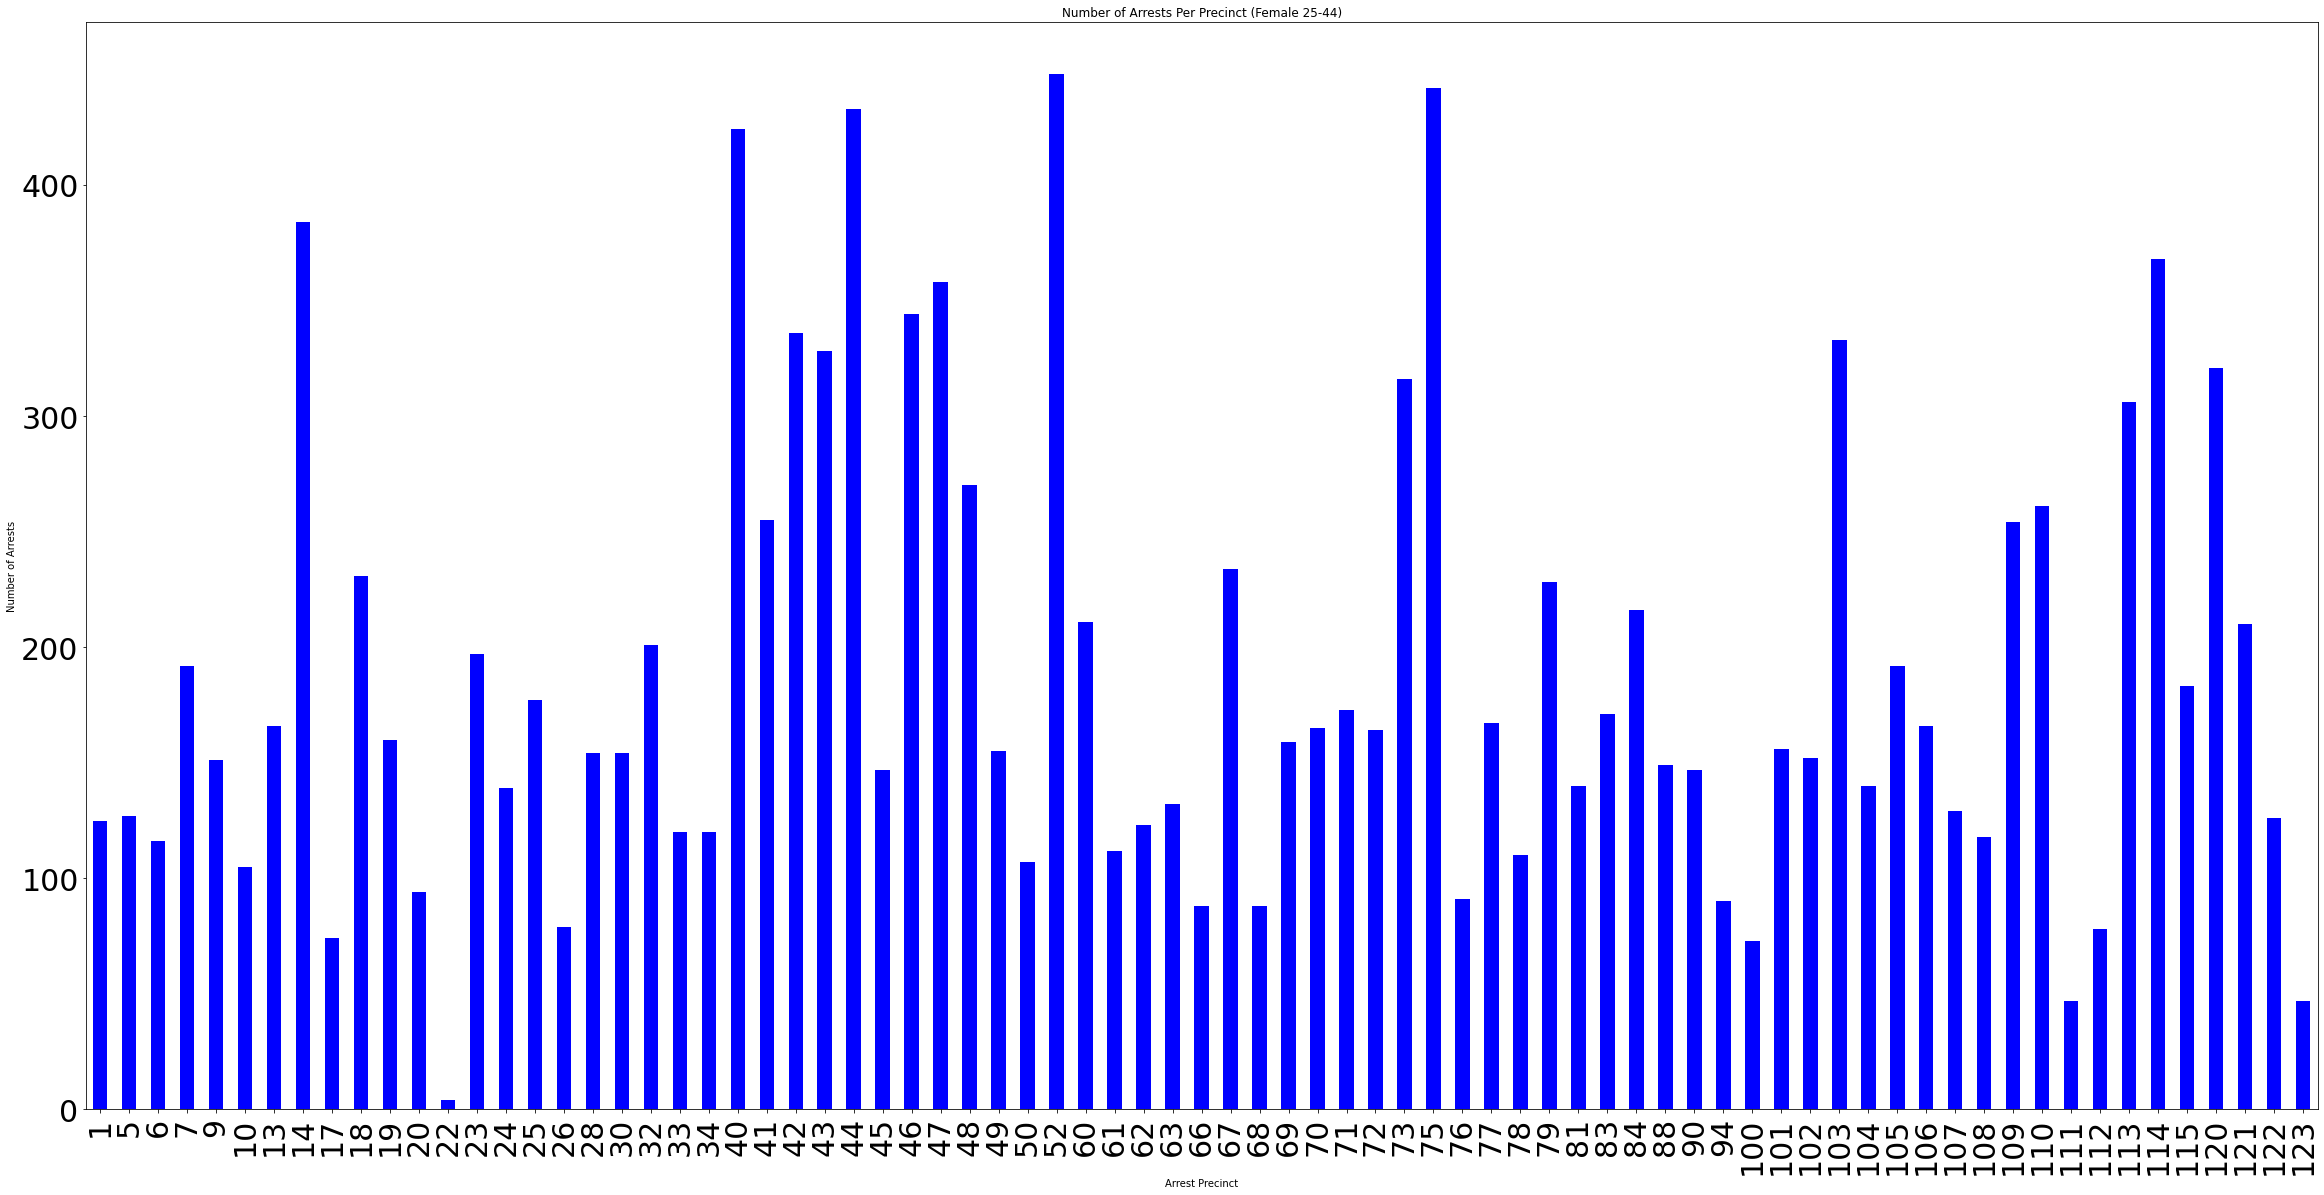

In [18]:
TF_A_F_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct (Female 25-44)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct (Male 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

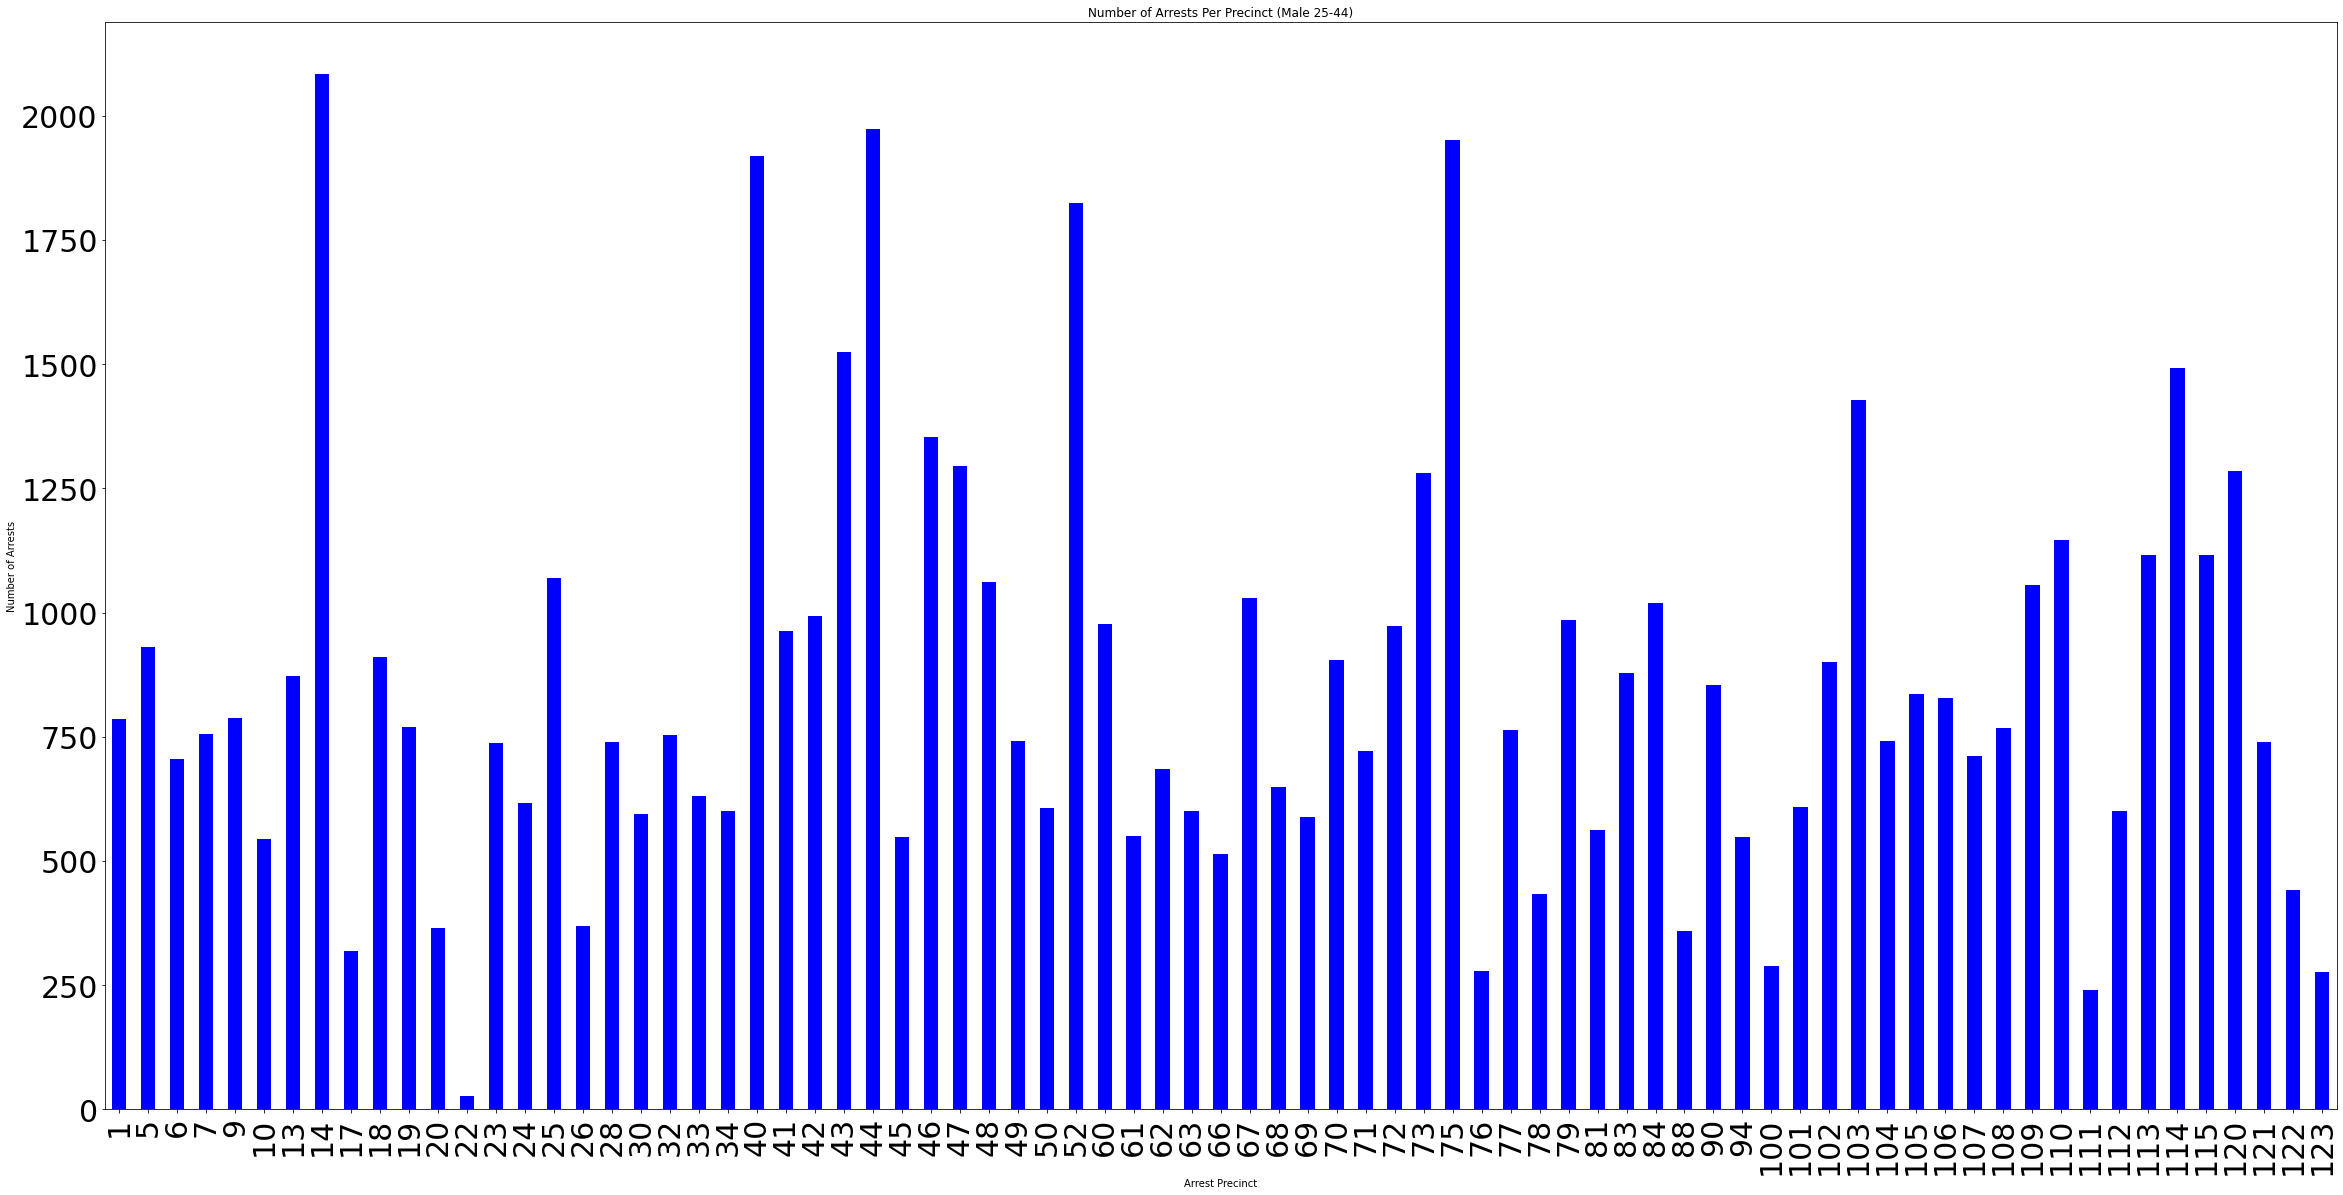

In [19]:
TF_A_M_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct (Male 25-44)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct (Female 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

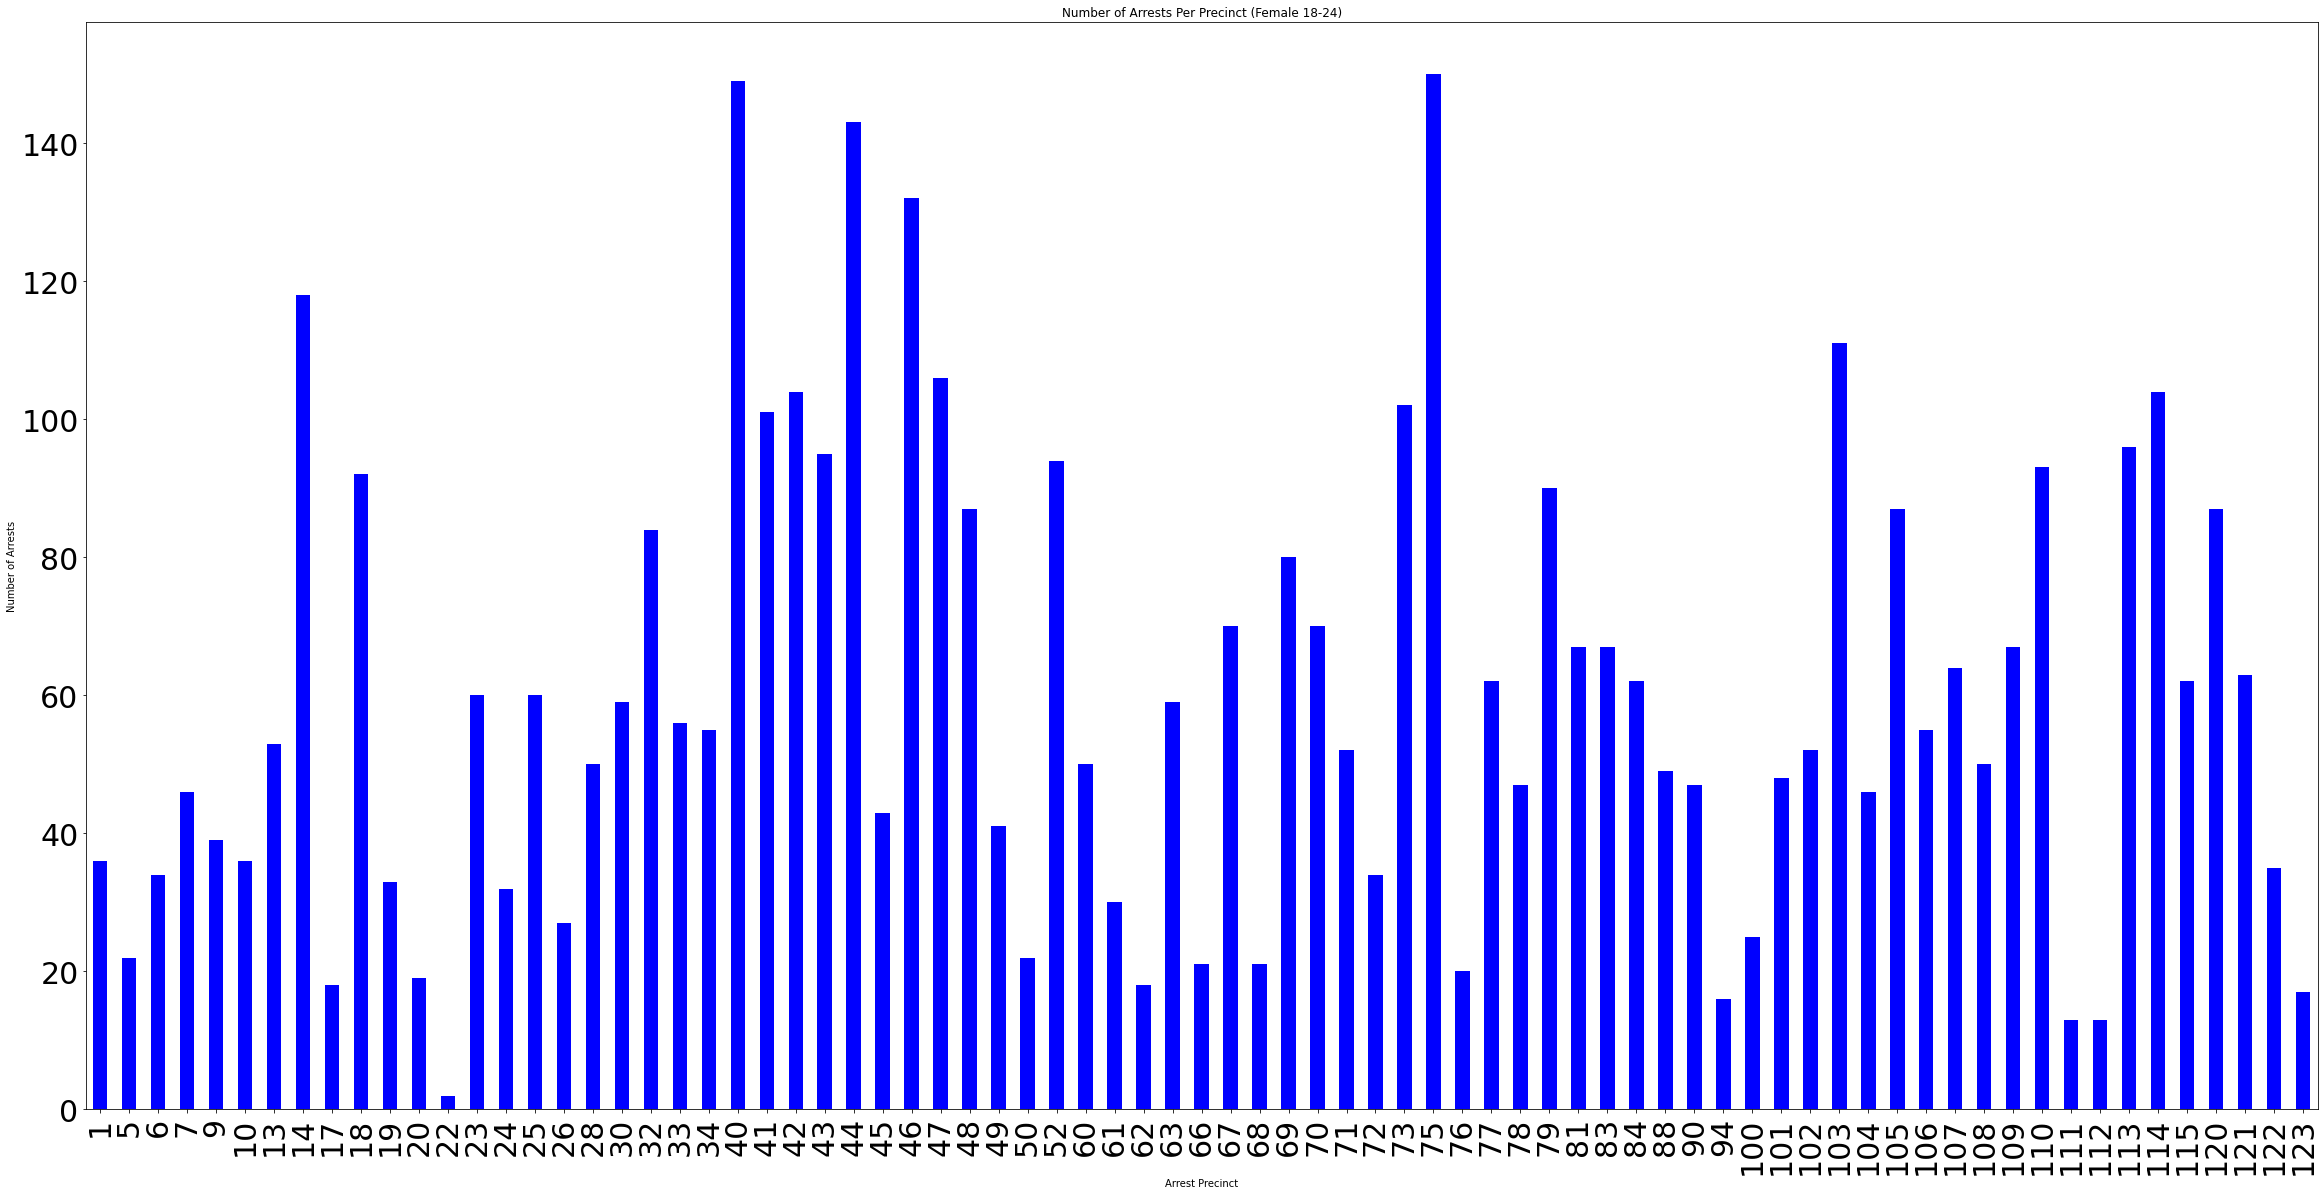

In [20]:
Y_A_F_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct (Female 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct (Male 25-44)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

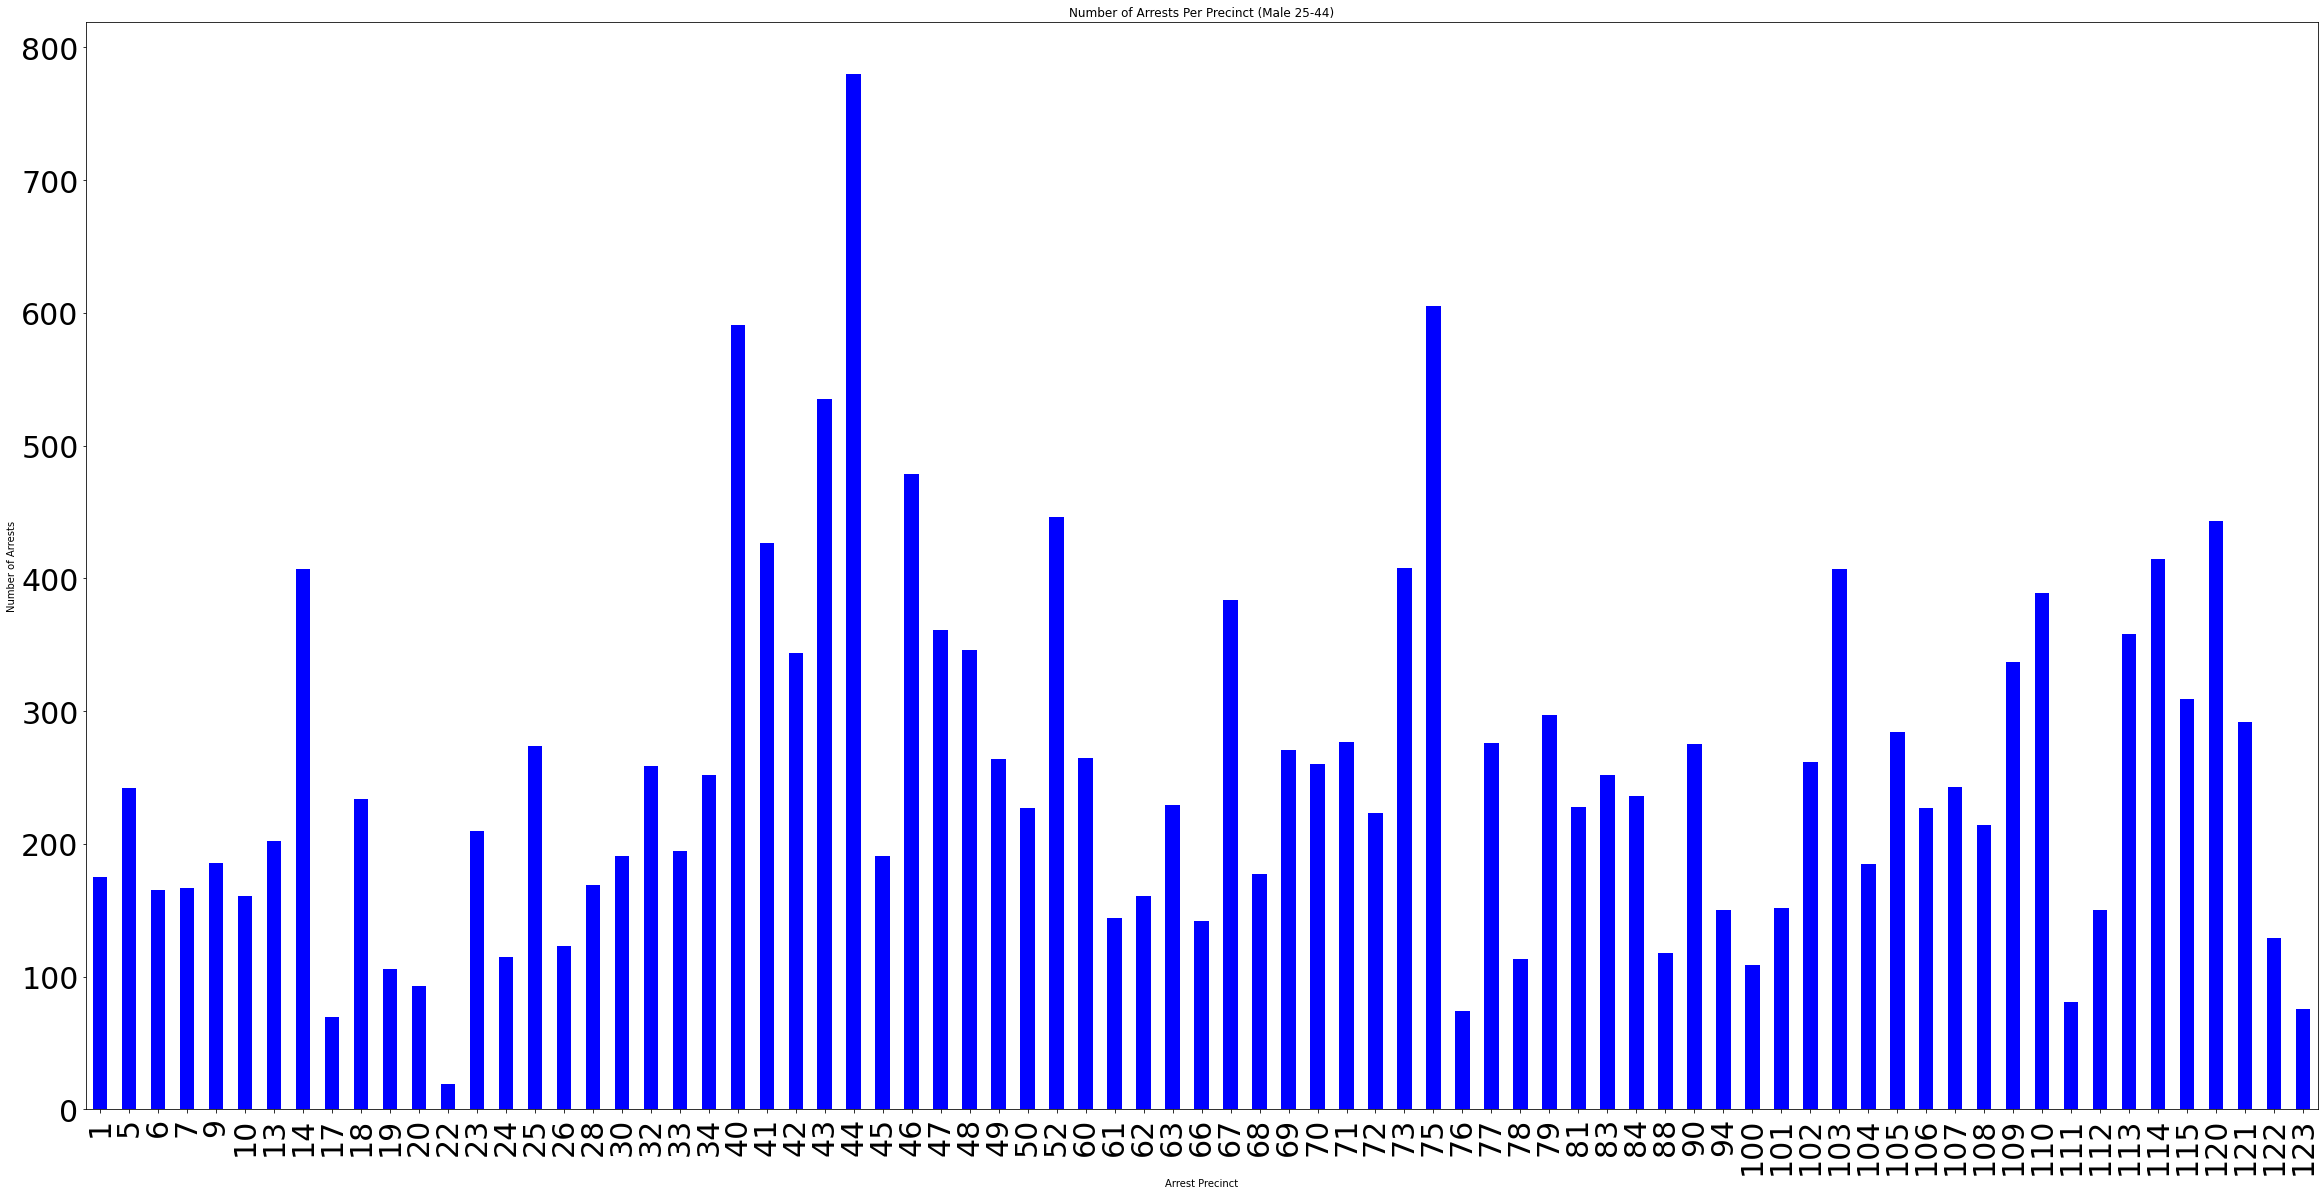

In [21]:
Y_A_M_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct (Male 25-44)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )


<AxesSubplot:title={'center':'Number of Arrests Per Precinct in the Bronx (Female 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

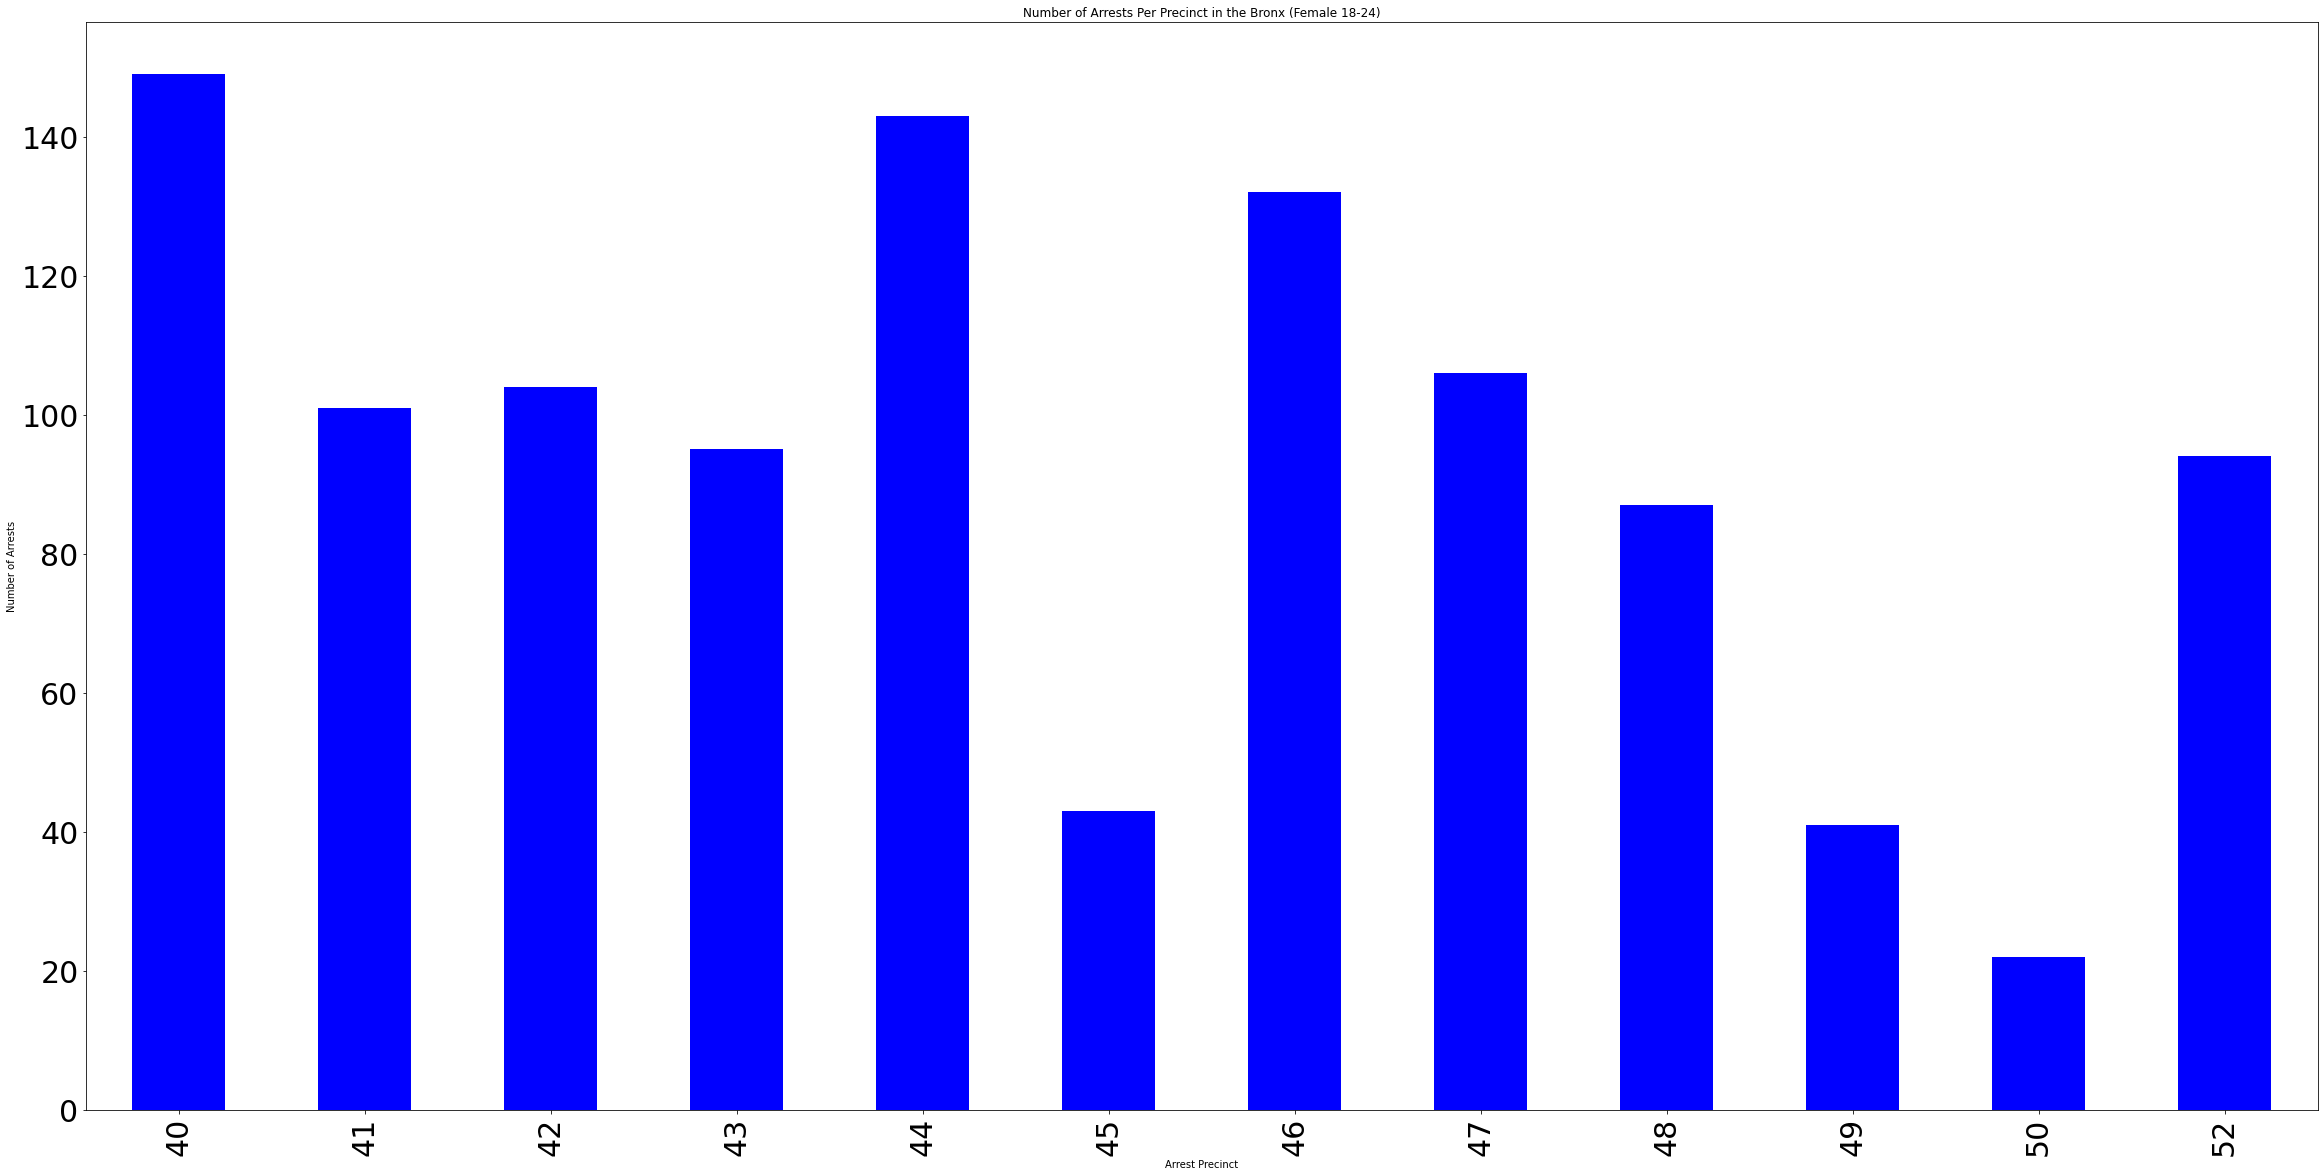

In [22]:
Y_A_F_BX_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in the Bronx (Female 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in the Bronx (Male 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

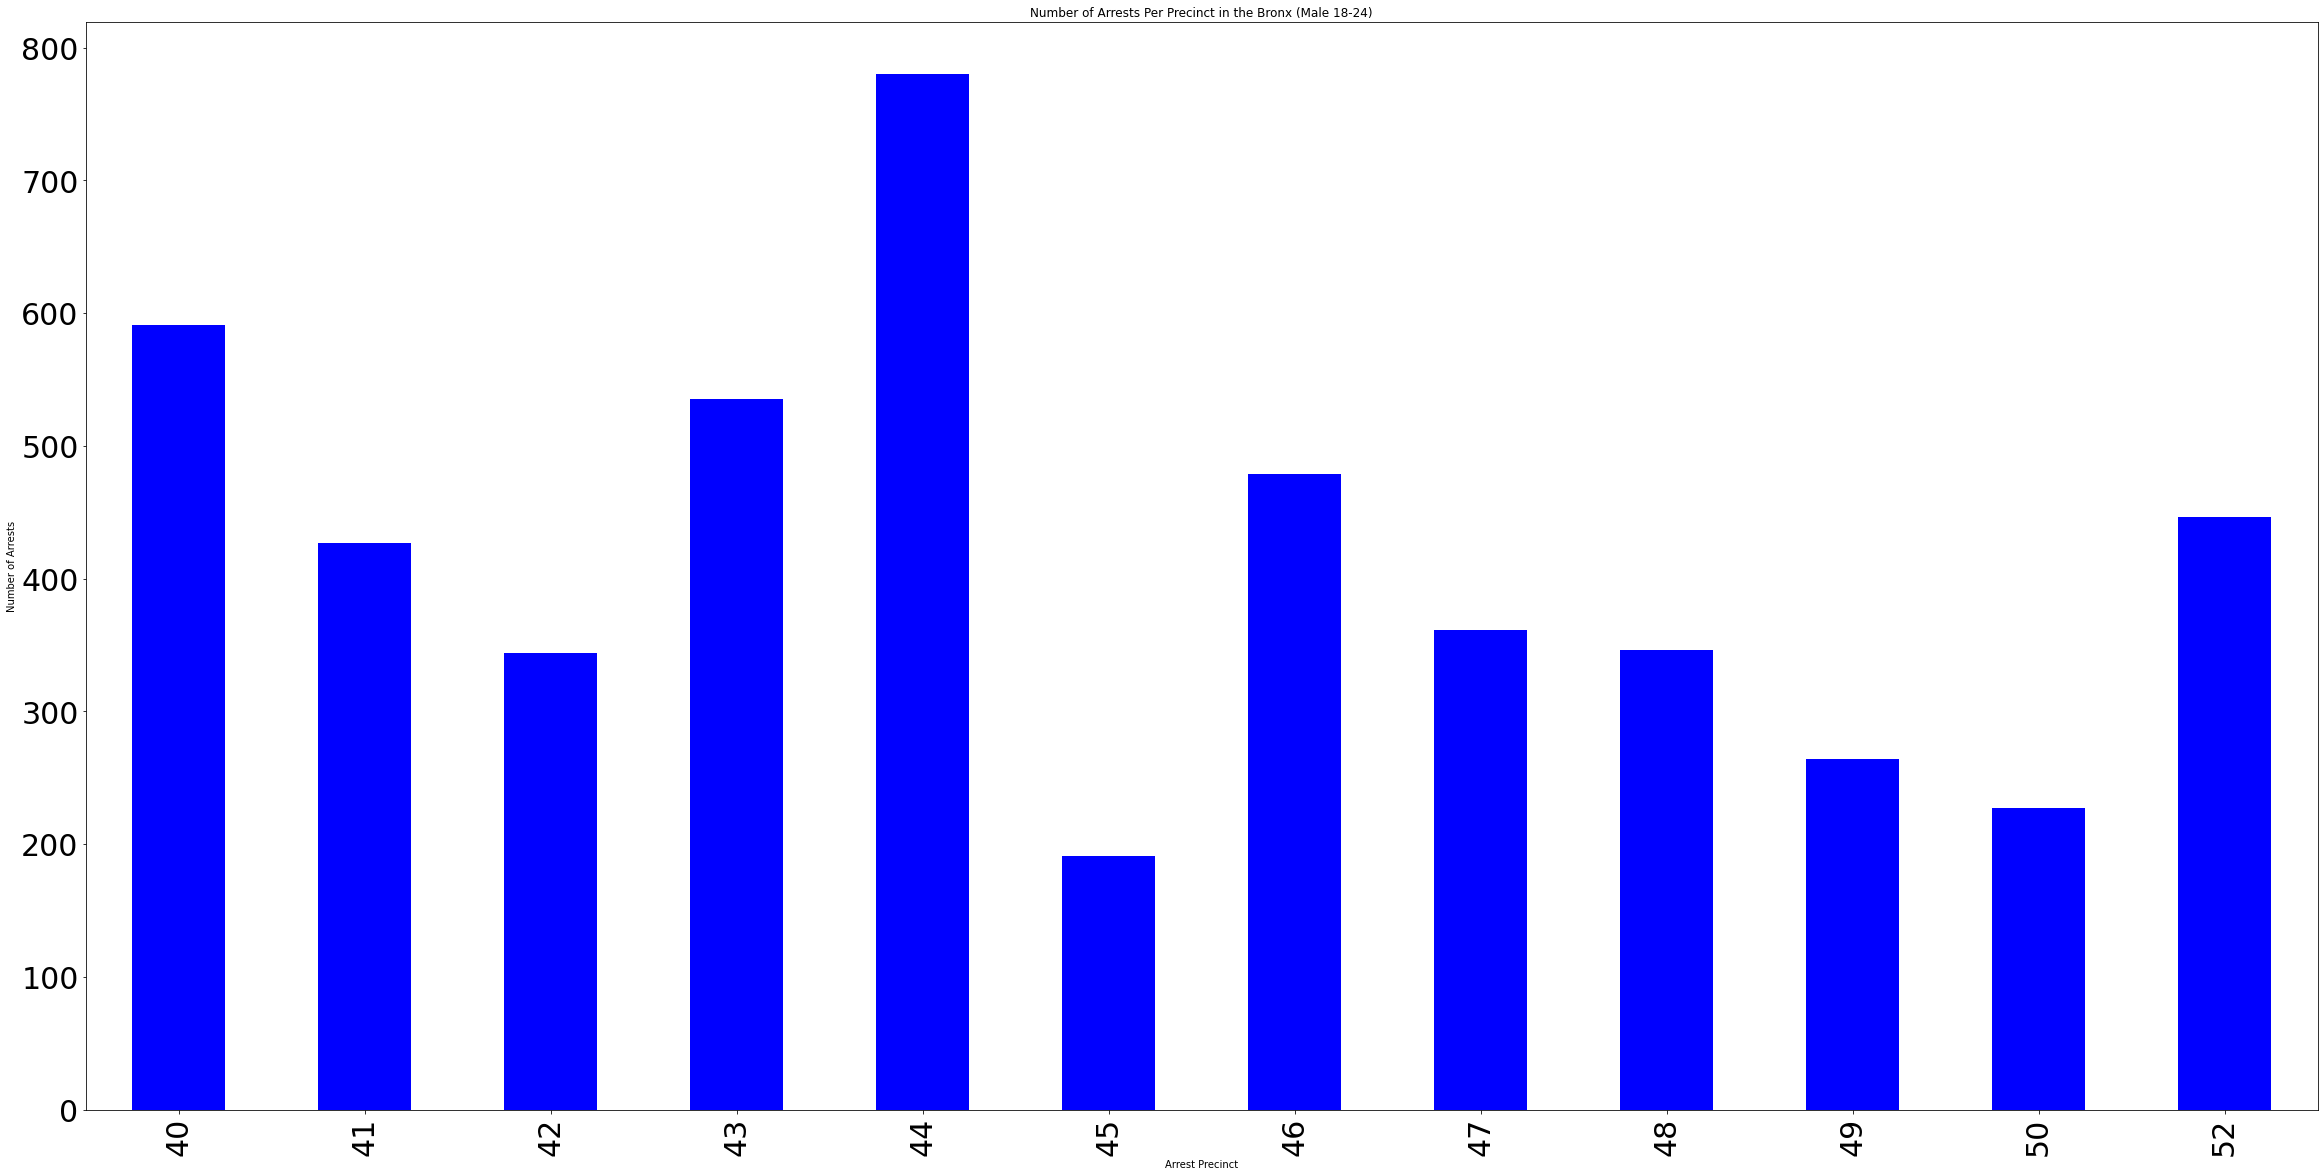

In [23]:
Y_A_M_BX_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in the Bronx (Male 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Brooklyn (Female 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

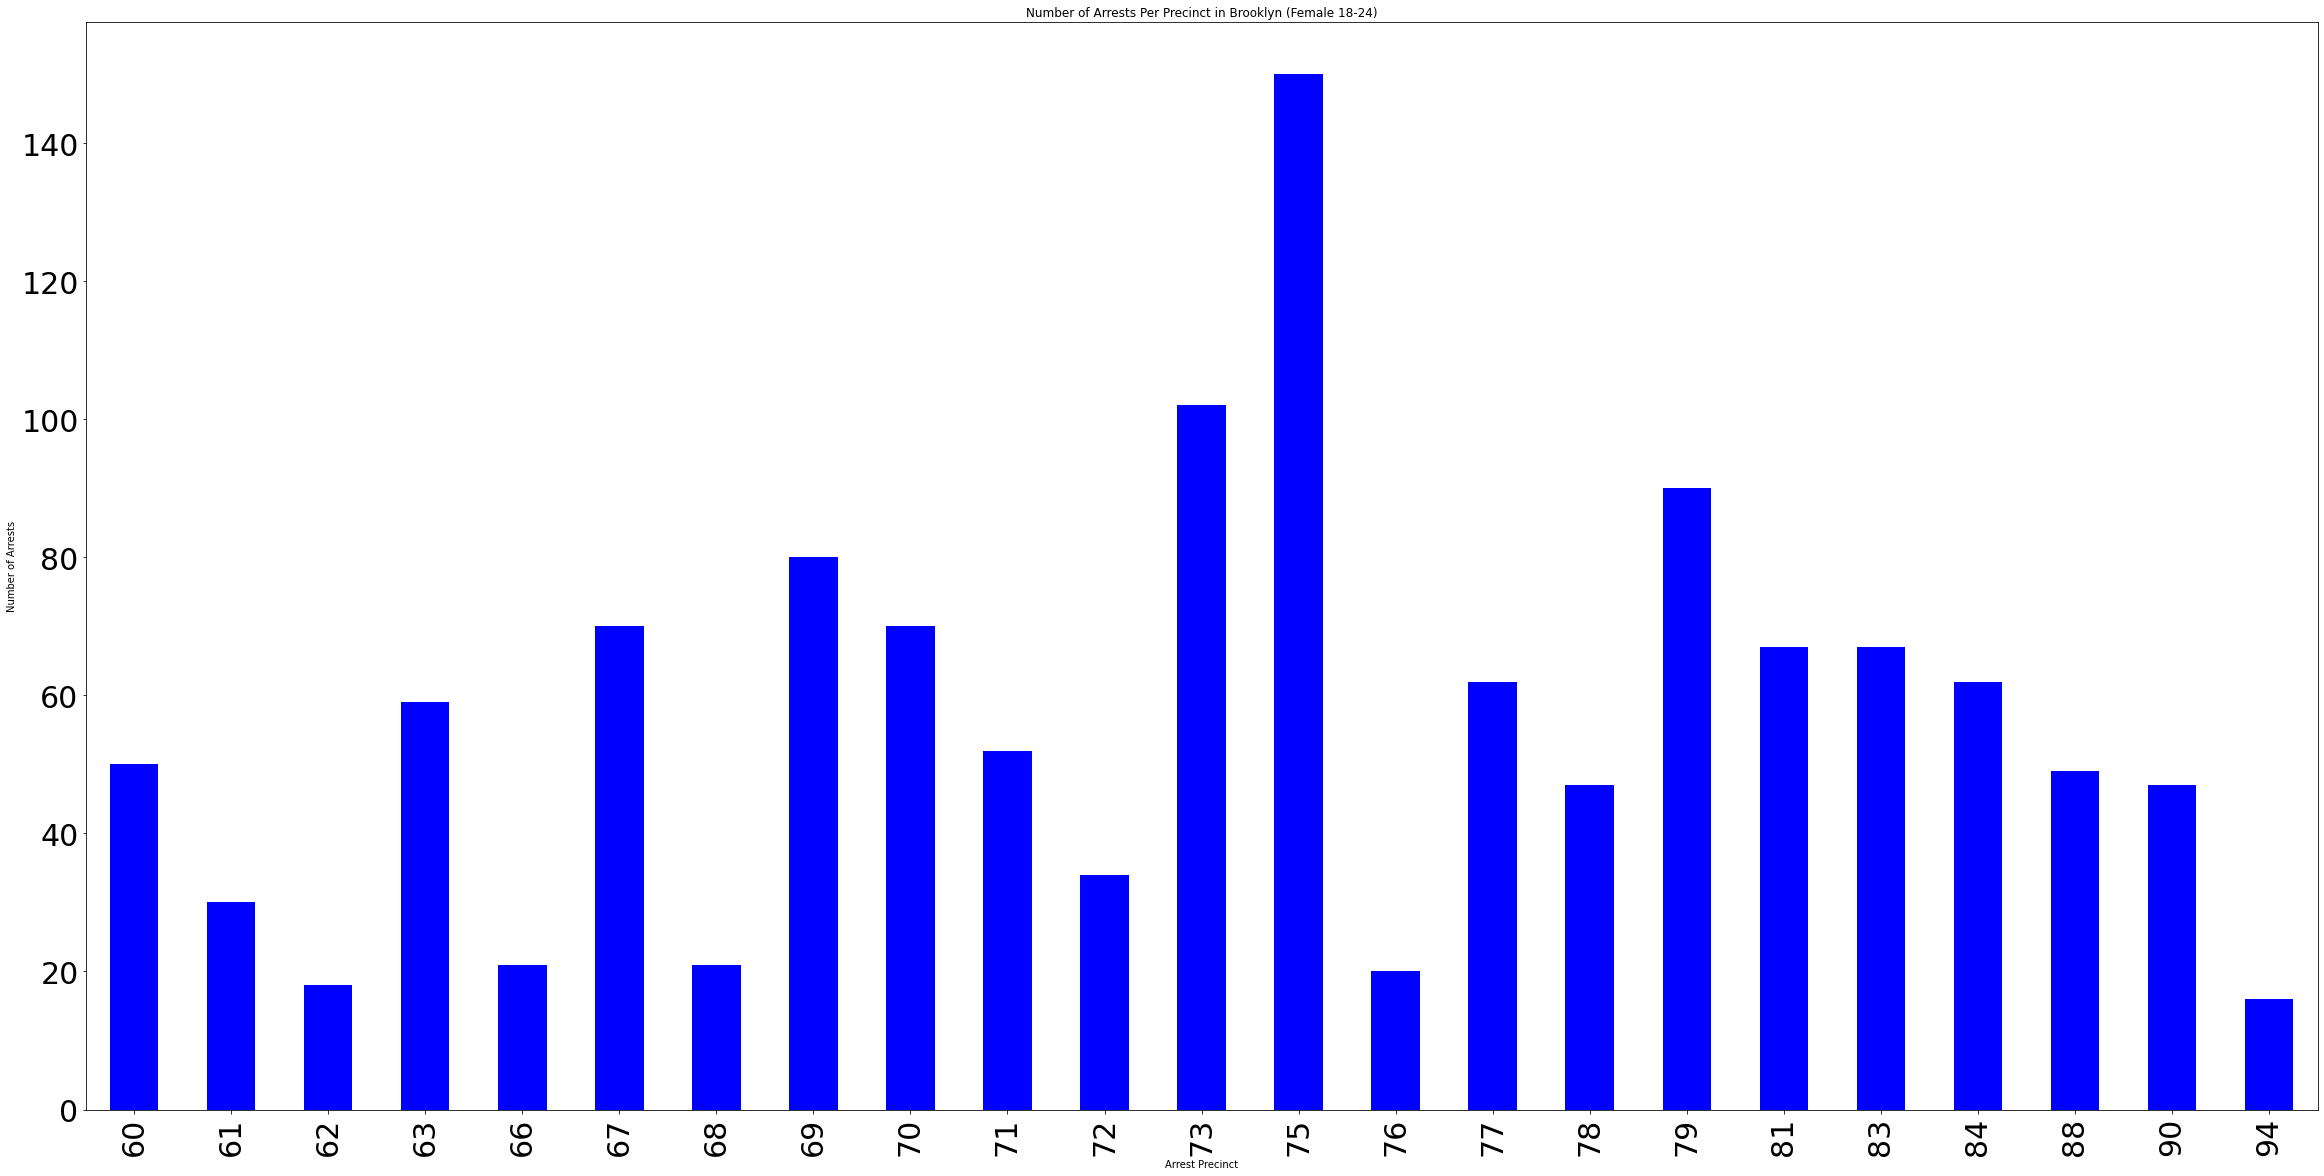

In [24]:
Y_A_F_BK_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Brooklyn (Female 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Brooklyn (Male 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

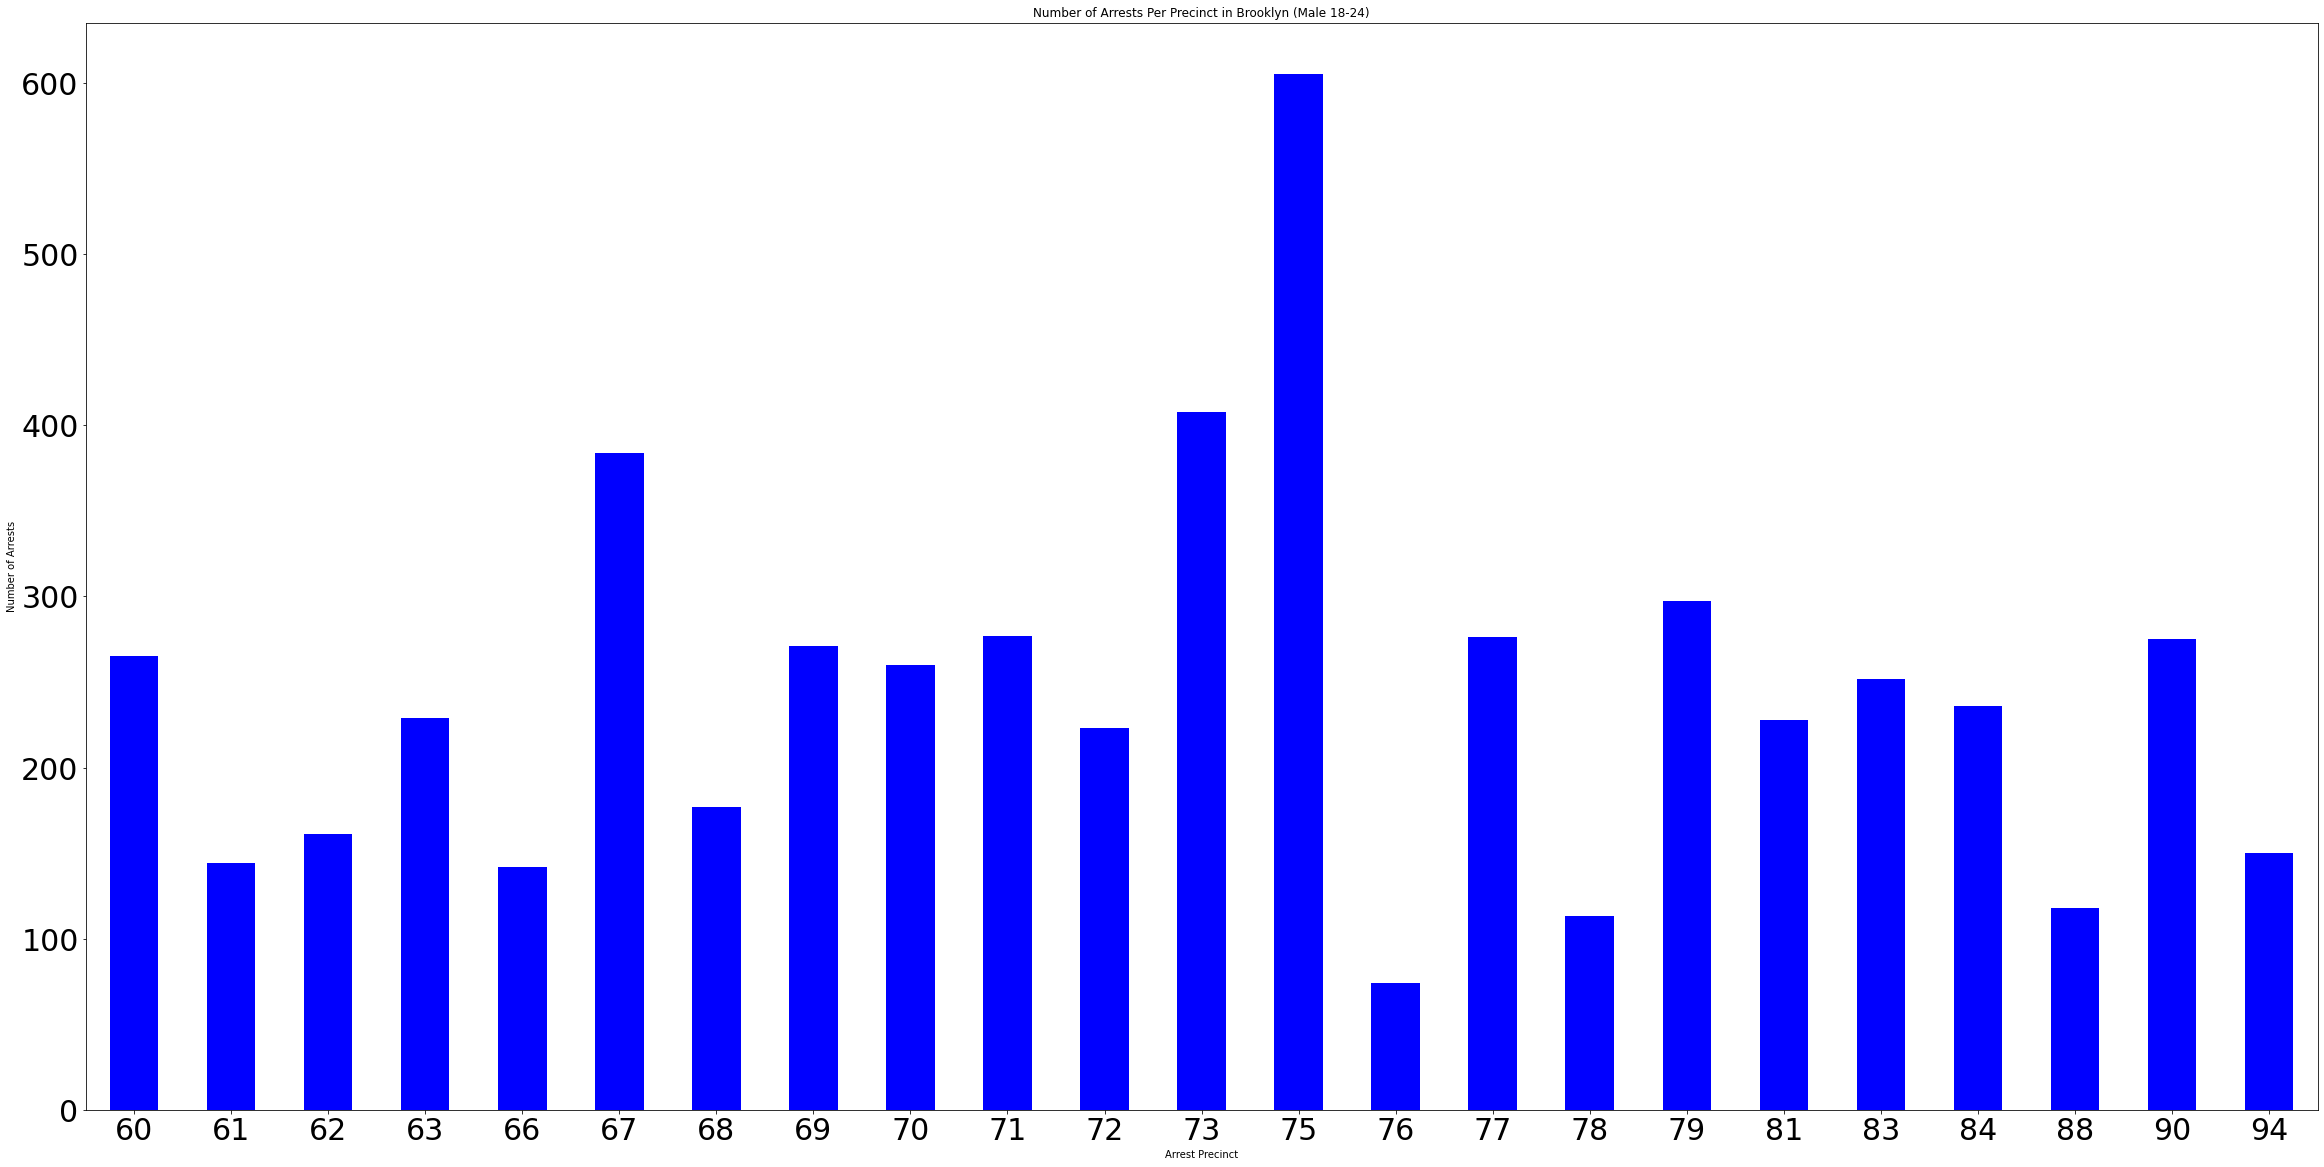

In [25]:
Y_A_M_BK_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Brooklyn (Male 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Queens (Female 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

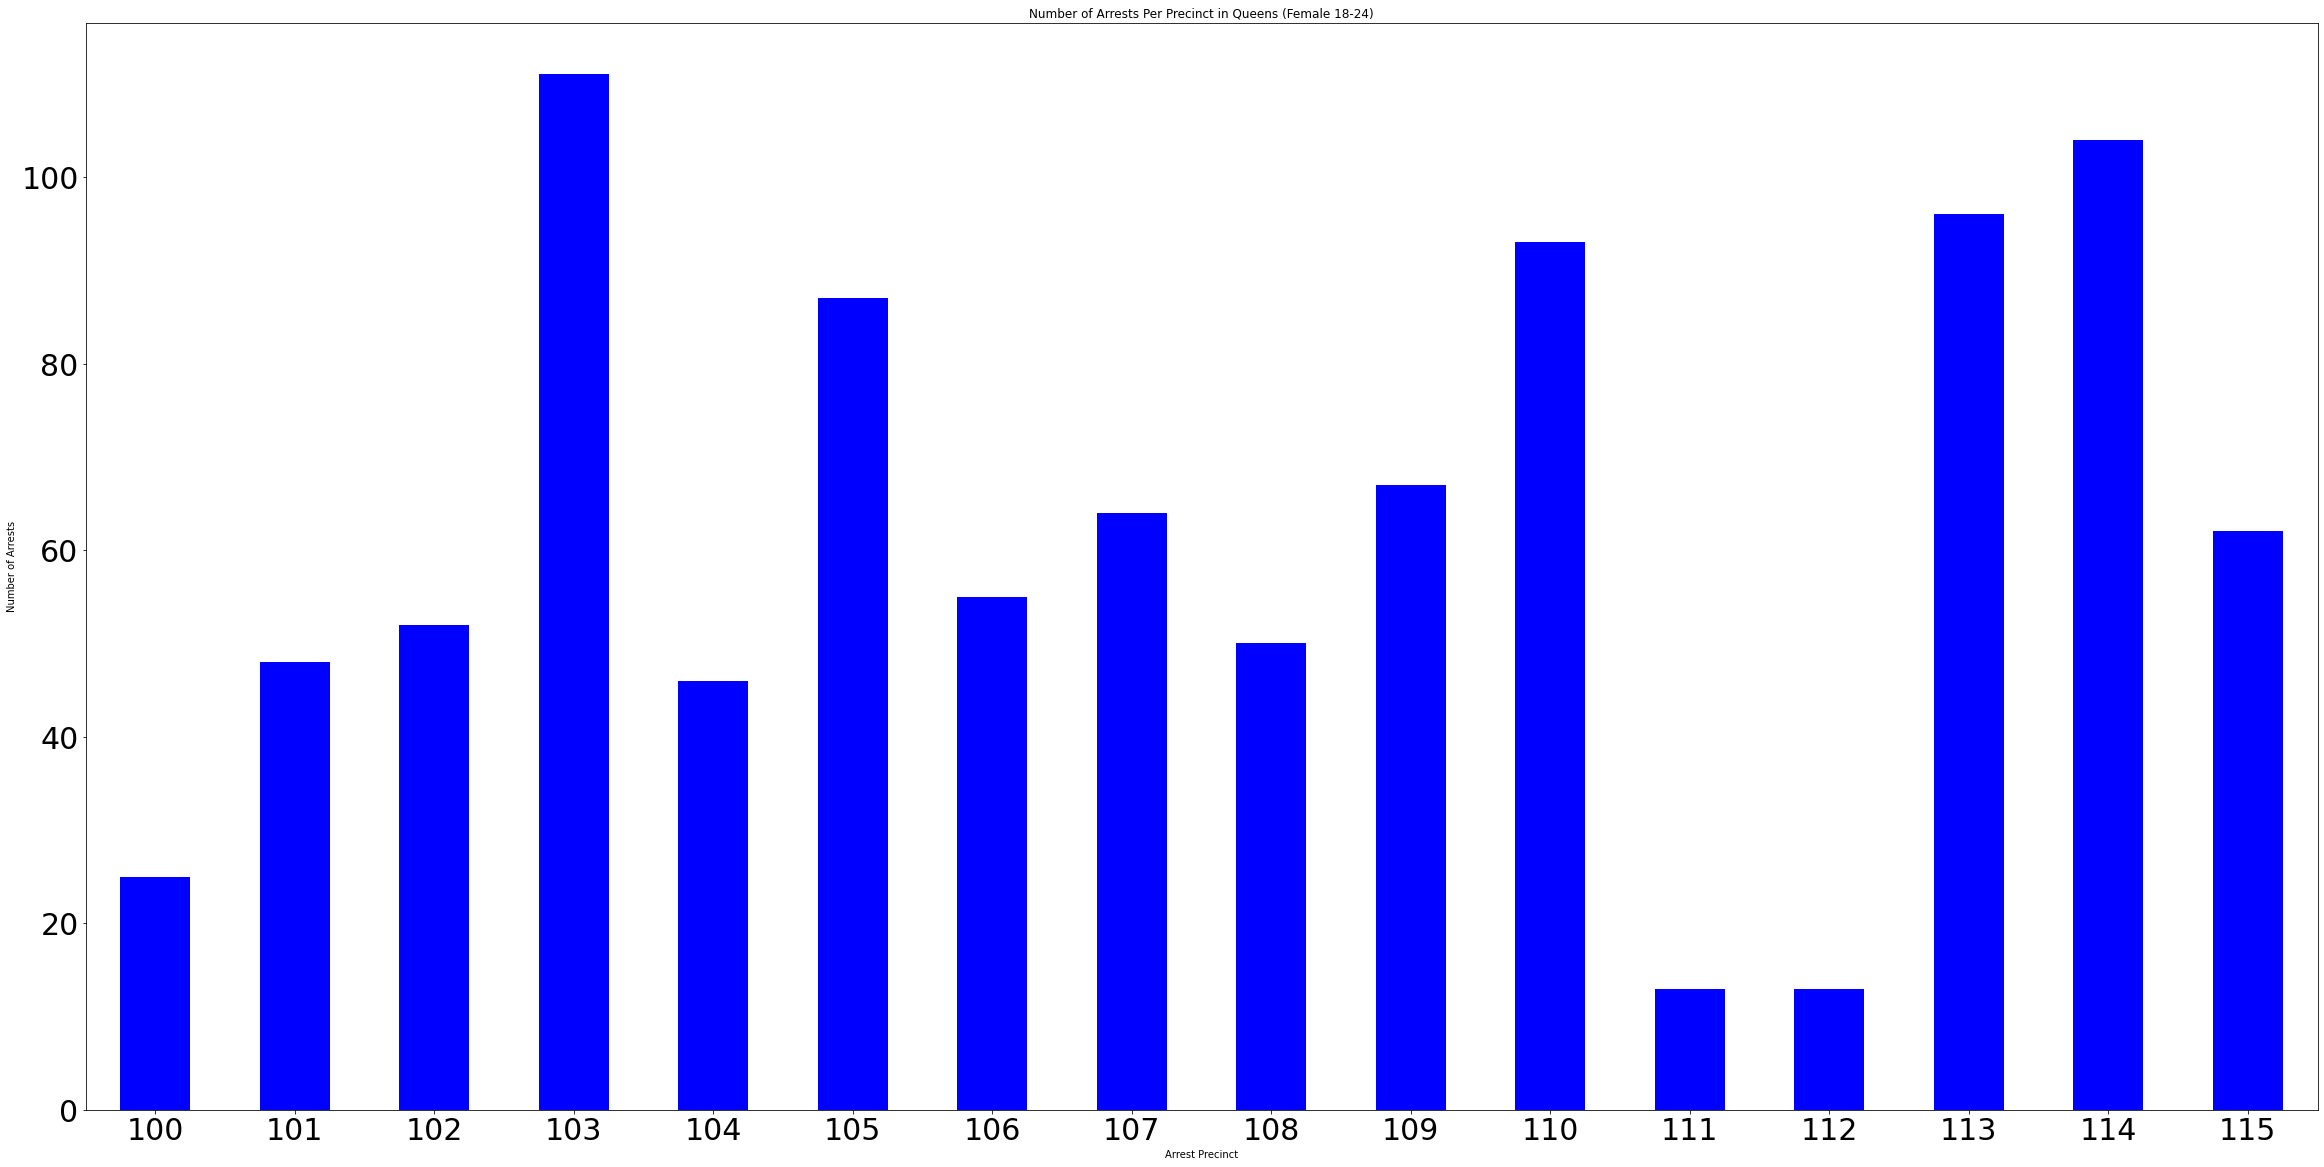

In [26]:
Y_A_F_Q_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Queens (Female 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Queens (Male 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

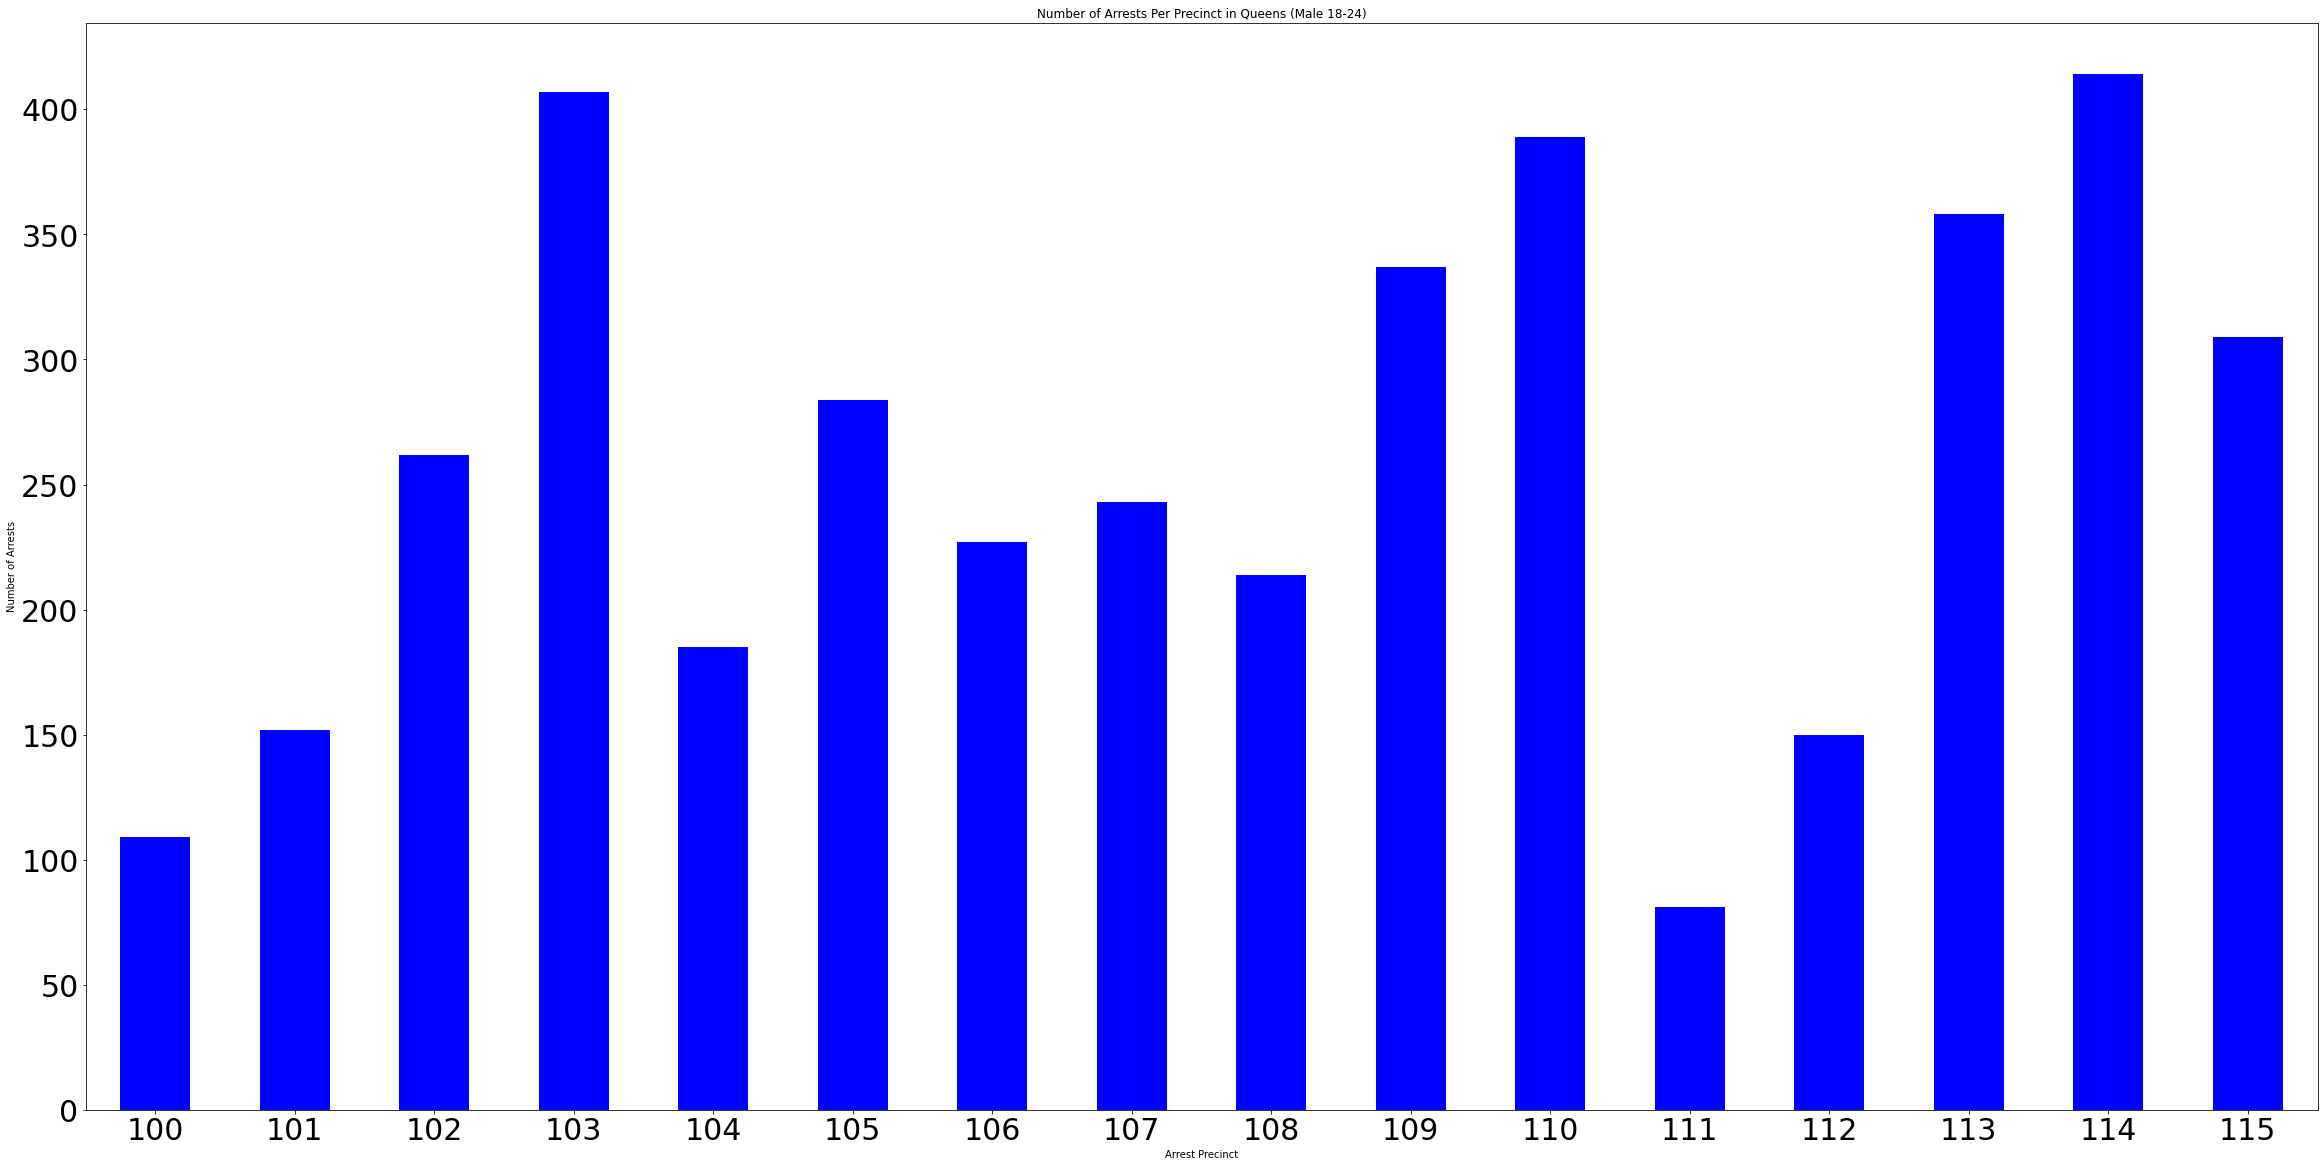

In [27]:
Y_A_M_Q_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Queens (Male 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                  rot=0
                            
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Staten Island (Female 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

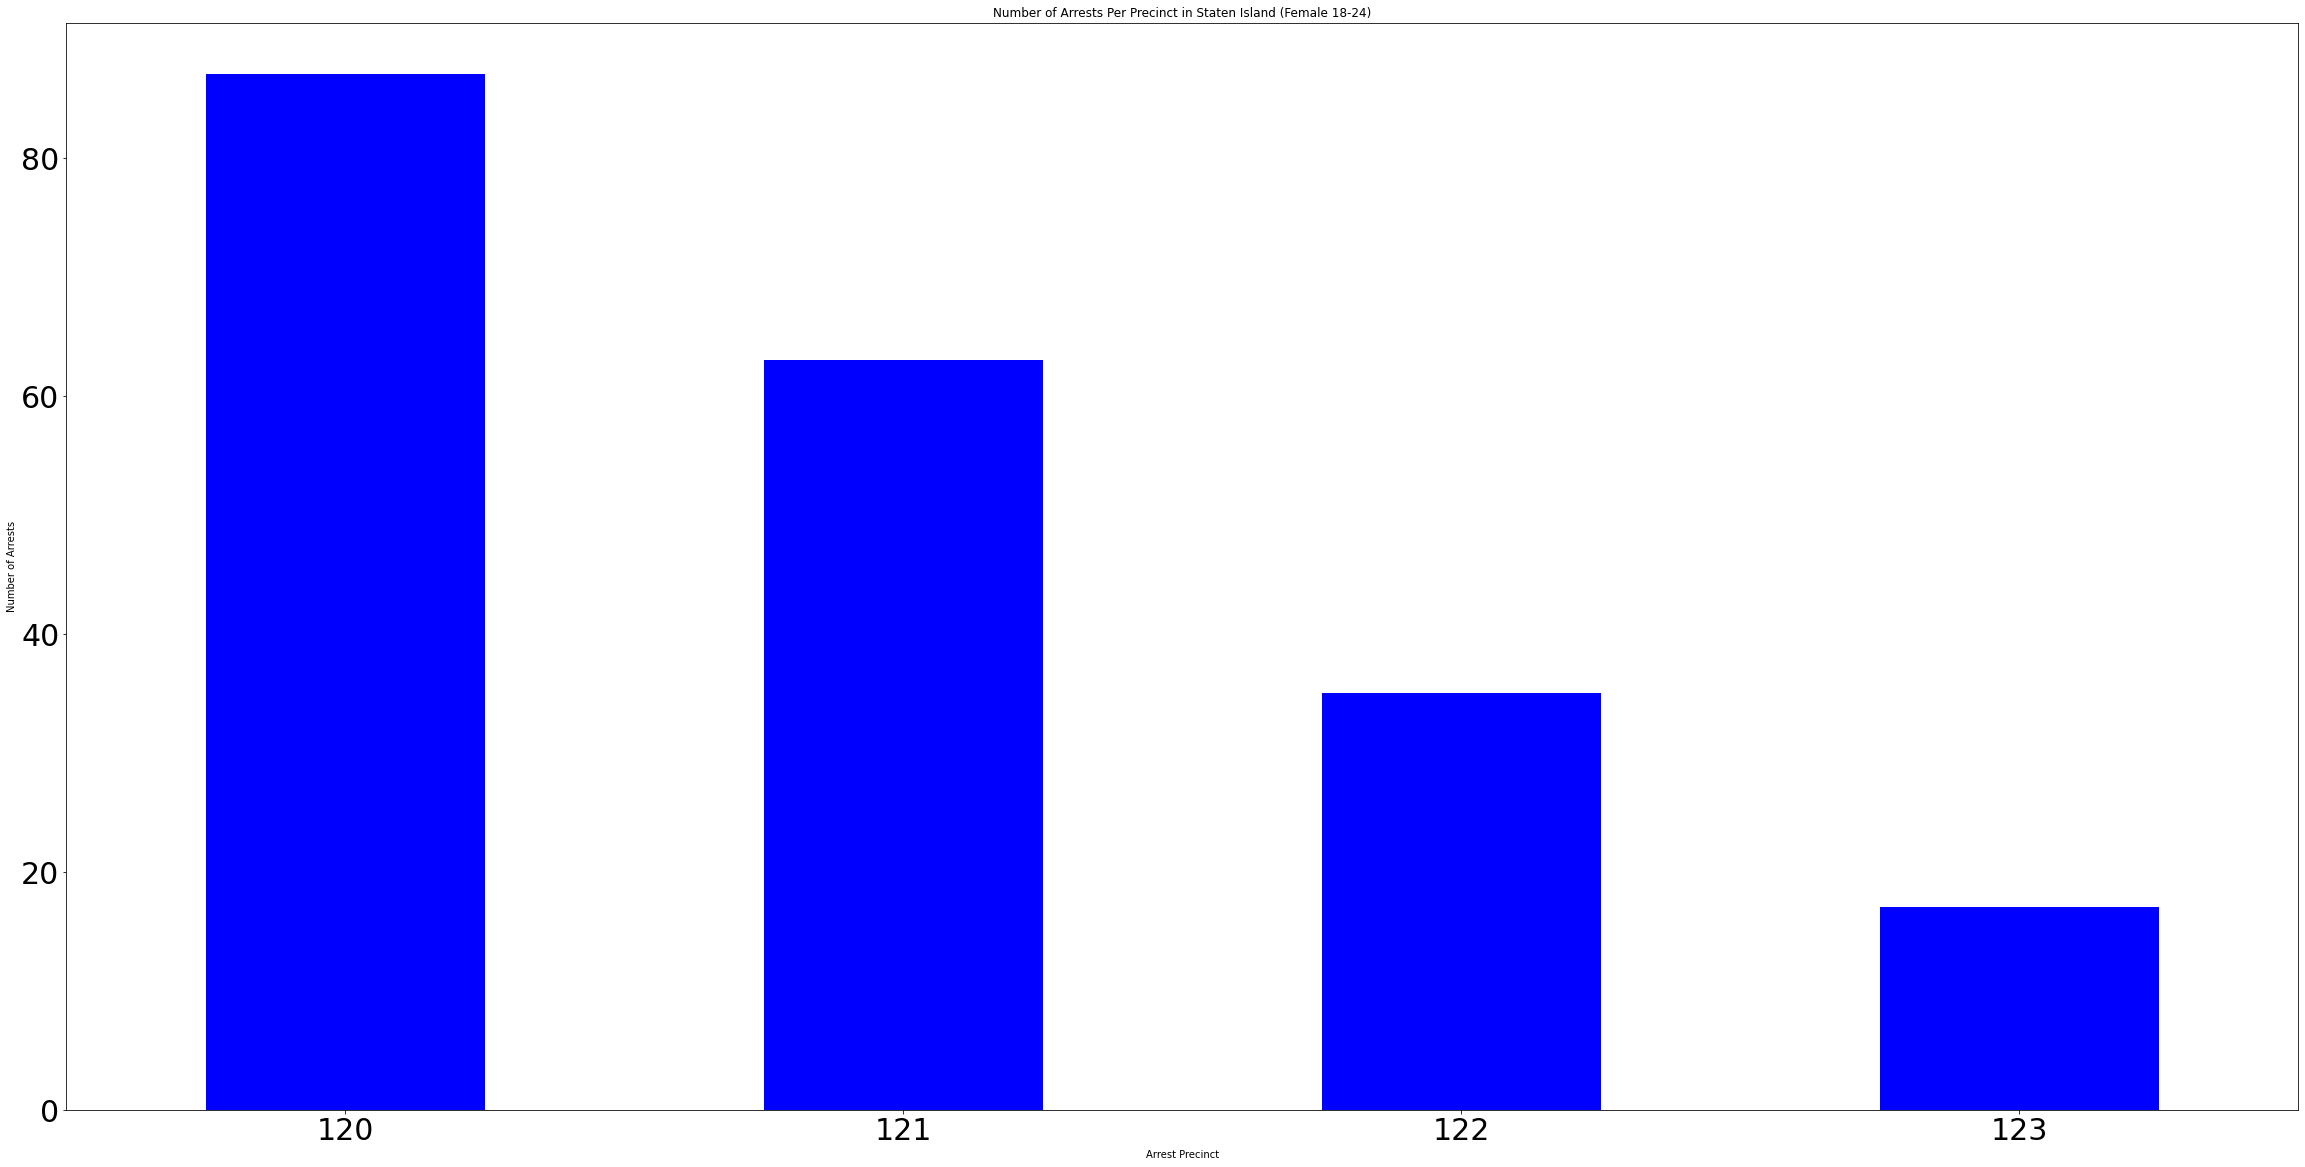

In [28]:
Y_A_F_S_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Staten Island (Female 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Staten Island (Male 18-24)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

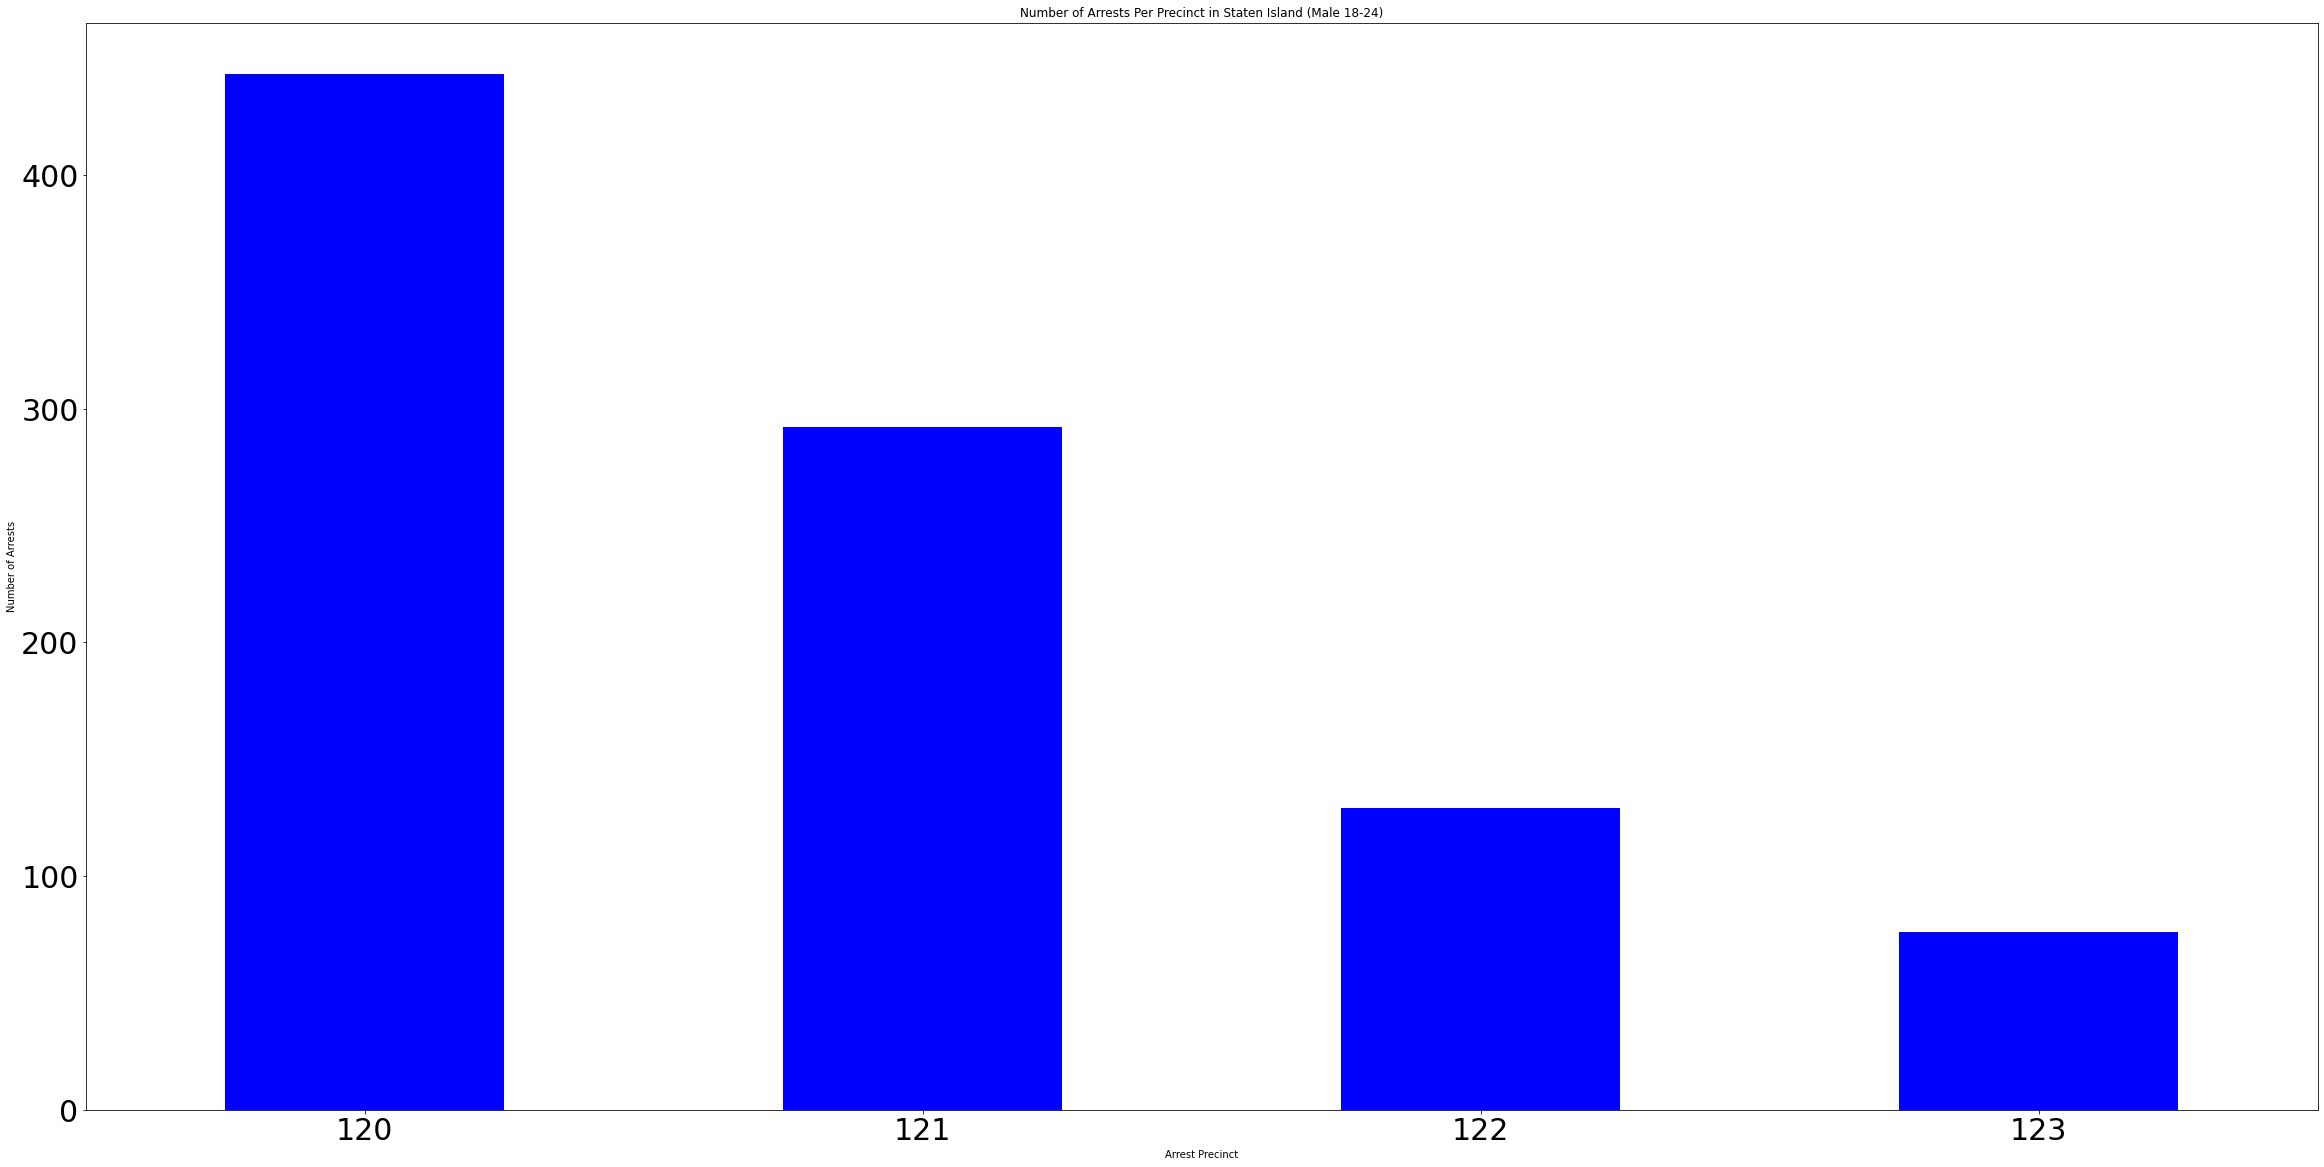

In [29]:
Y_A_M_S_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Staten Island (Male 18-24)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct (Female 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

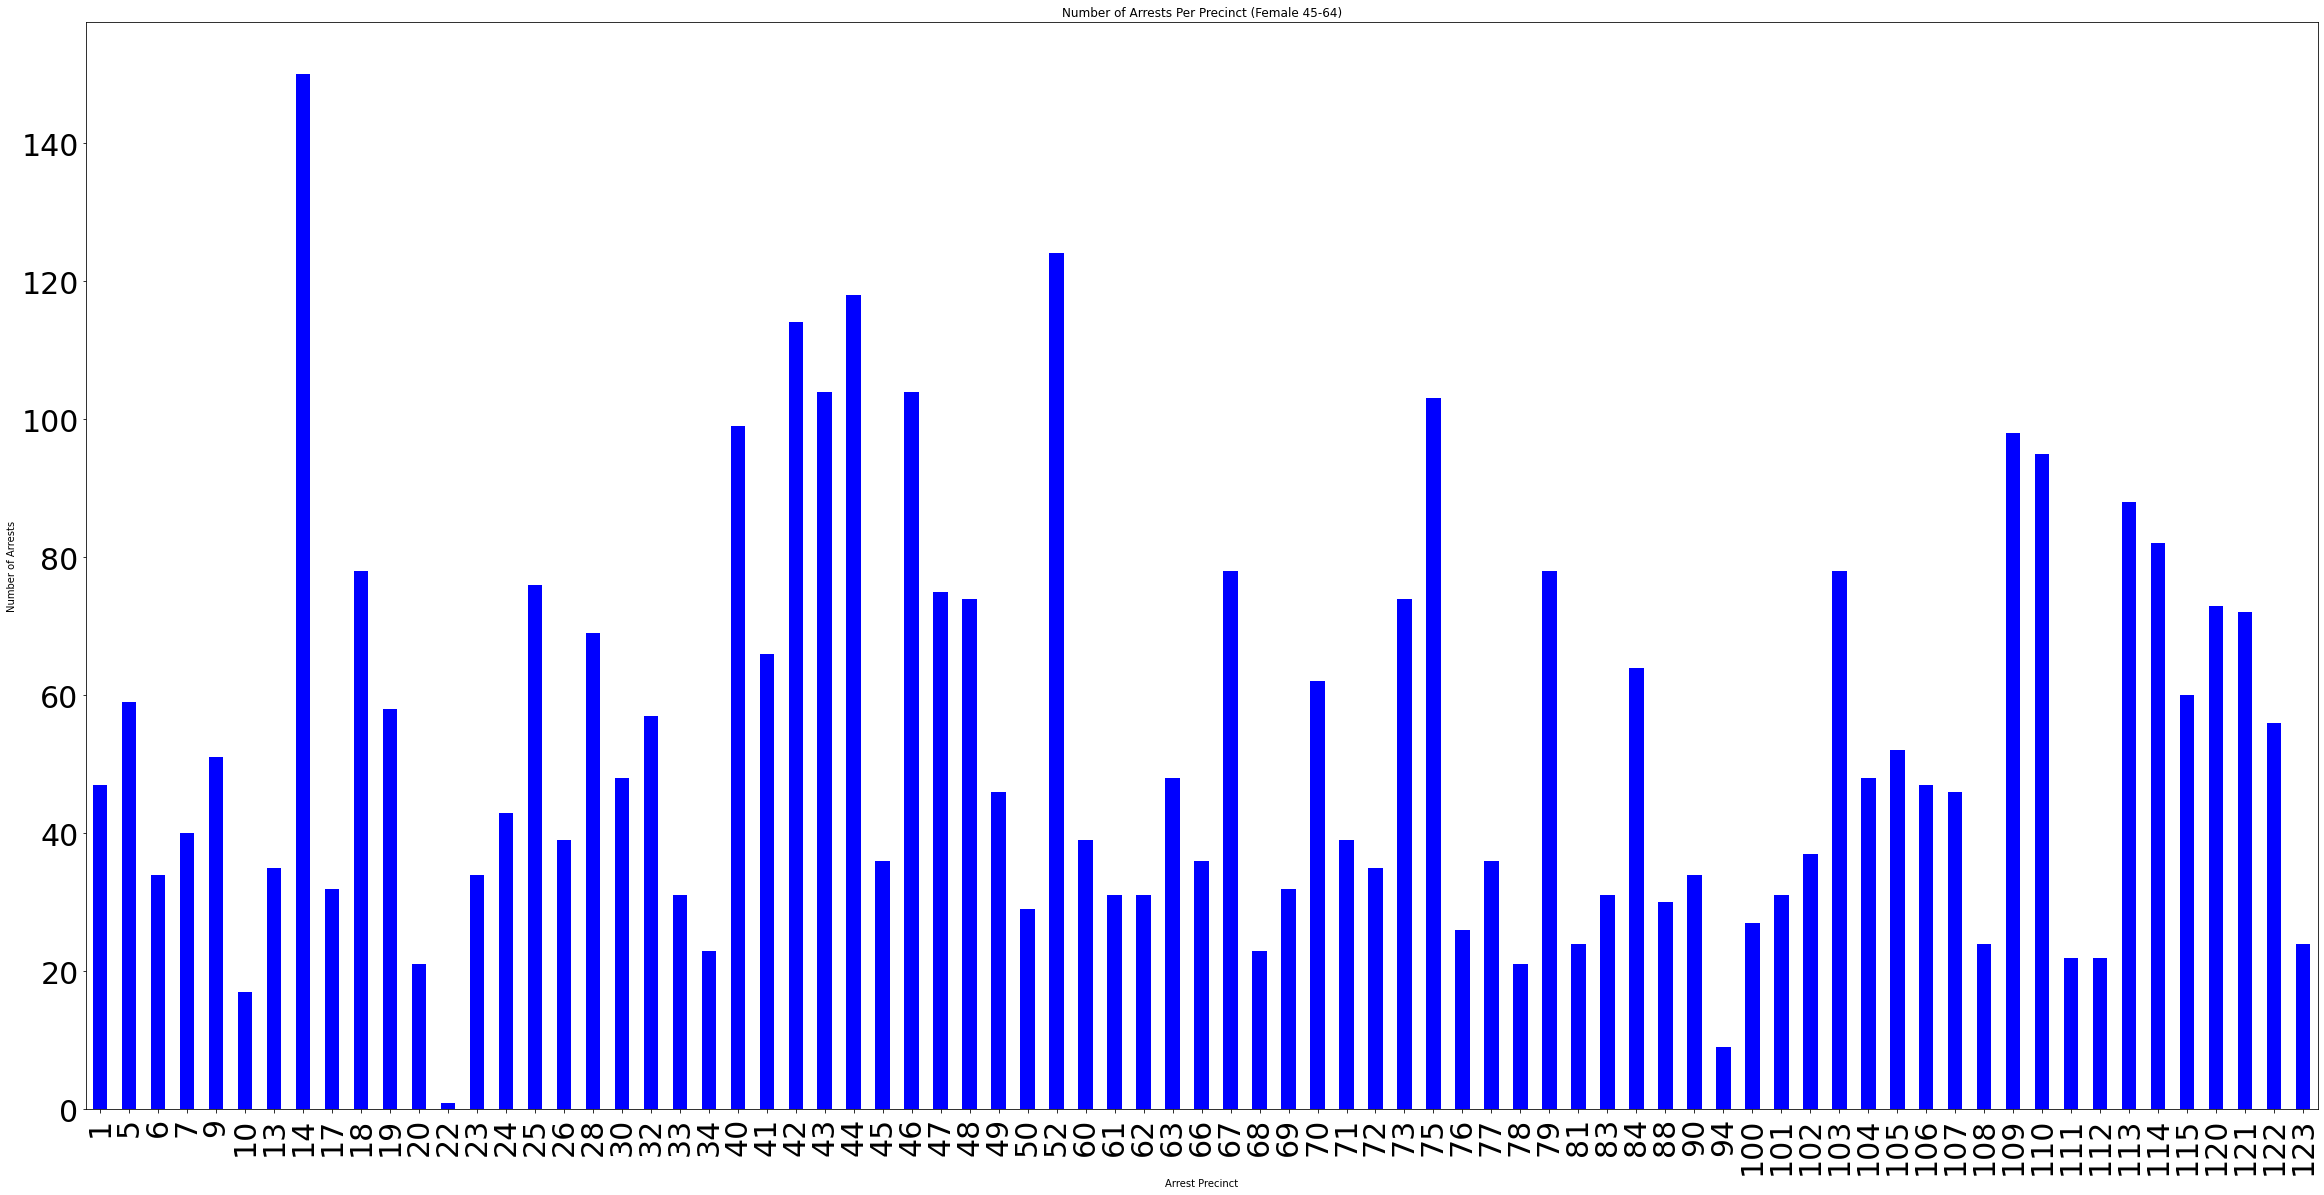

In [30]:
O_A_F_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct (Female 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct (Male 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

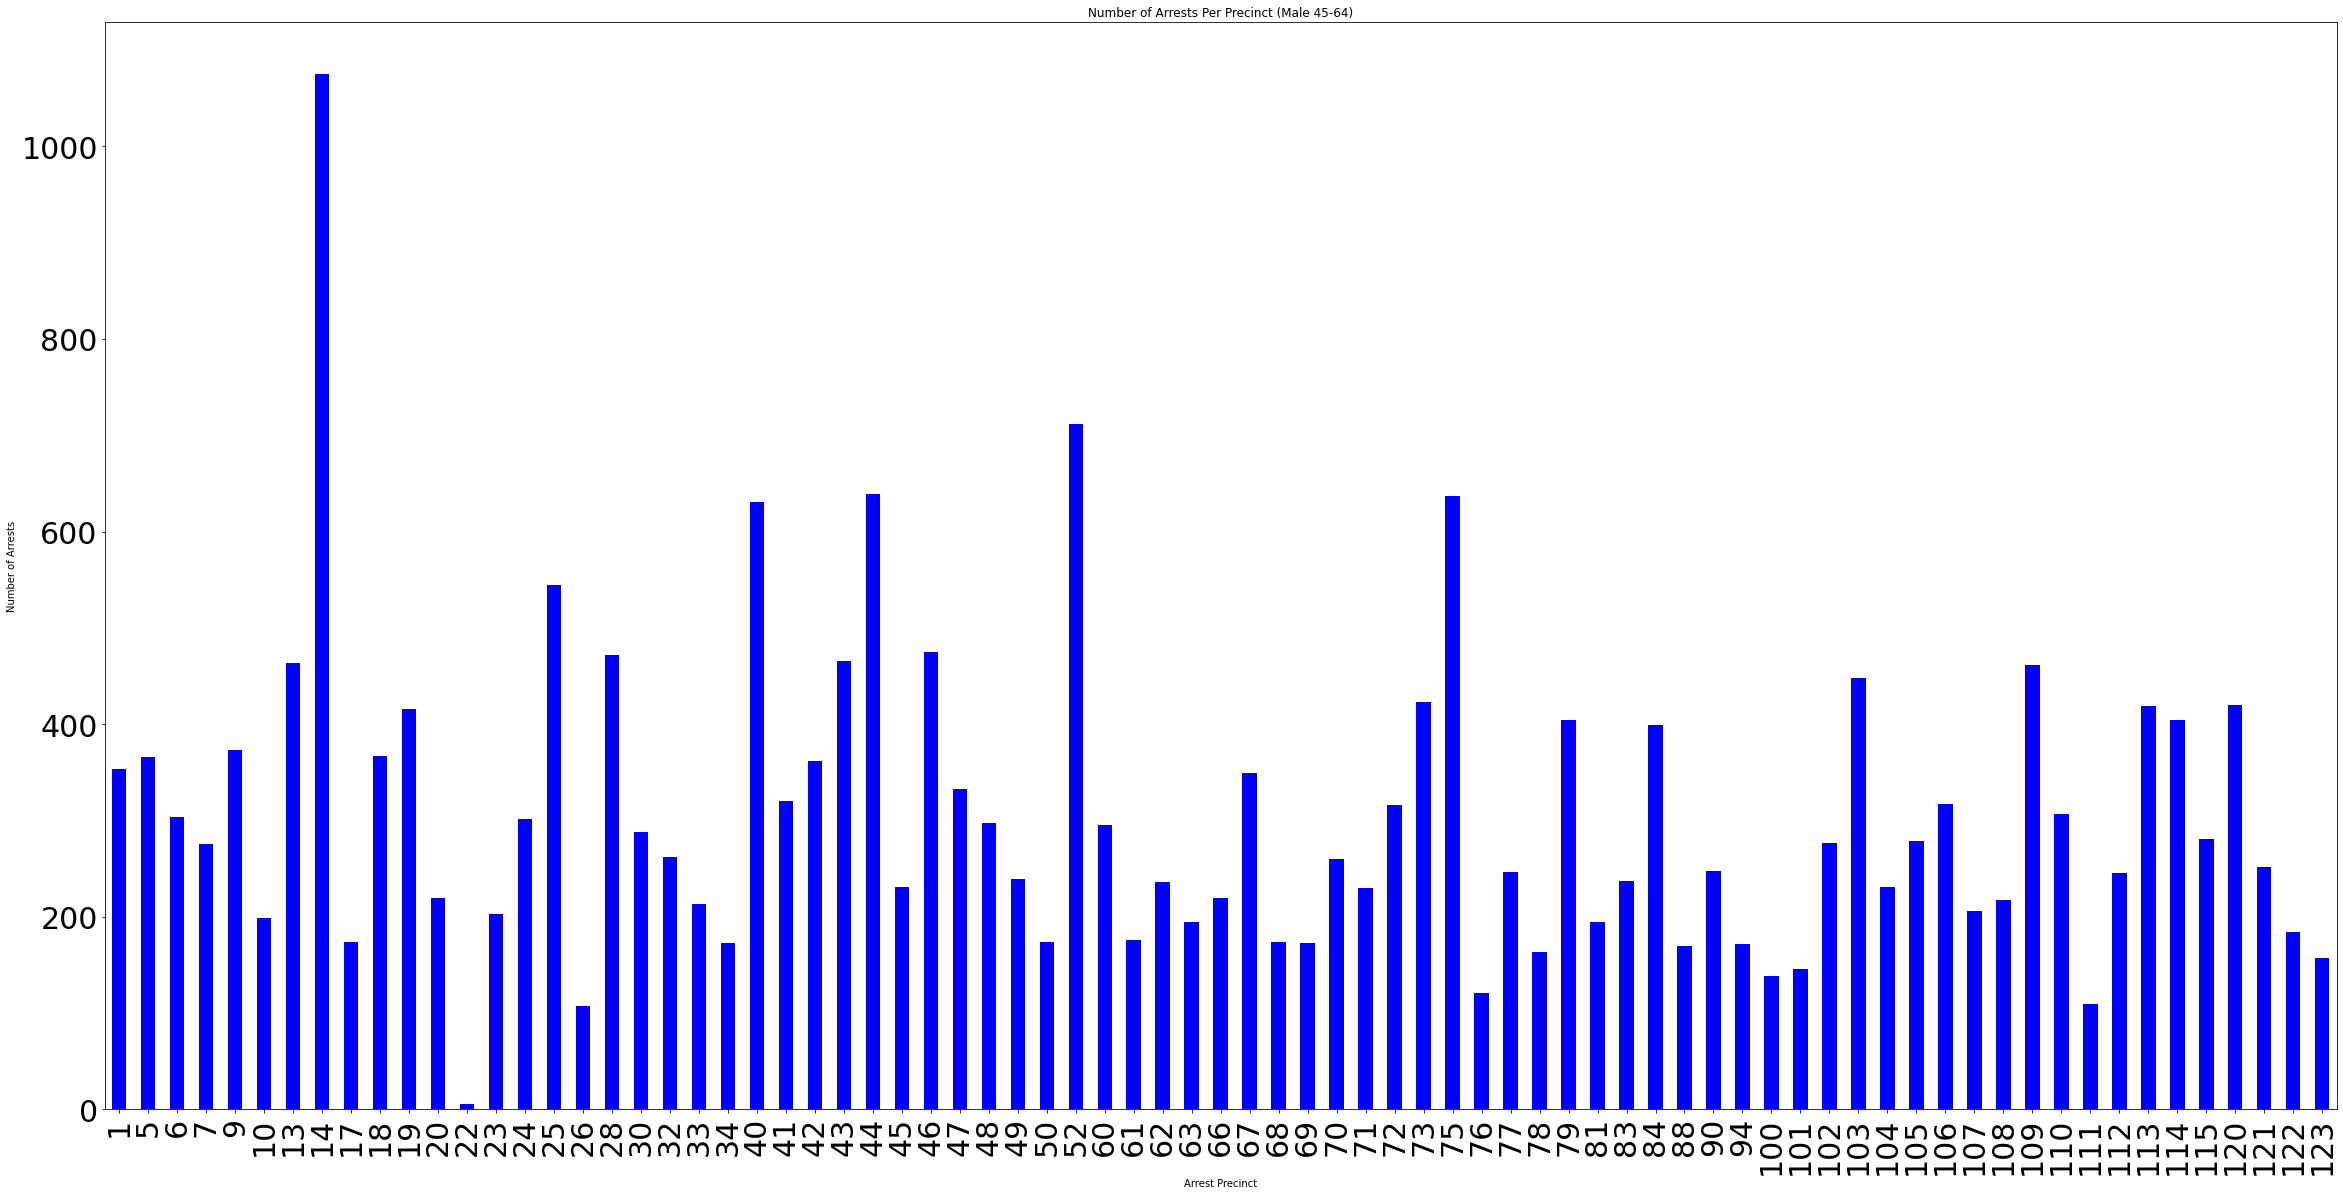

In [31]:
O_A_M_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct (Male 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in the Bronx (Female 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

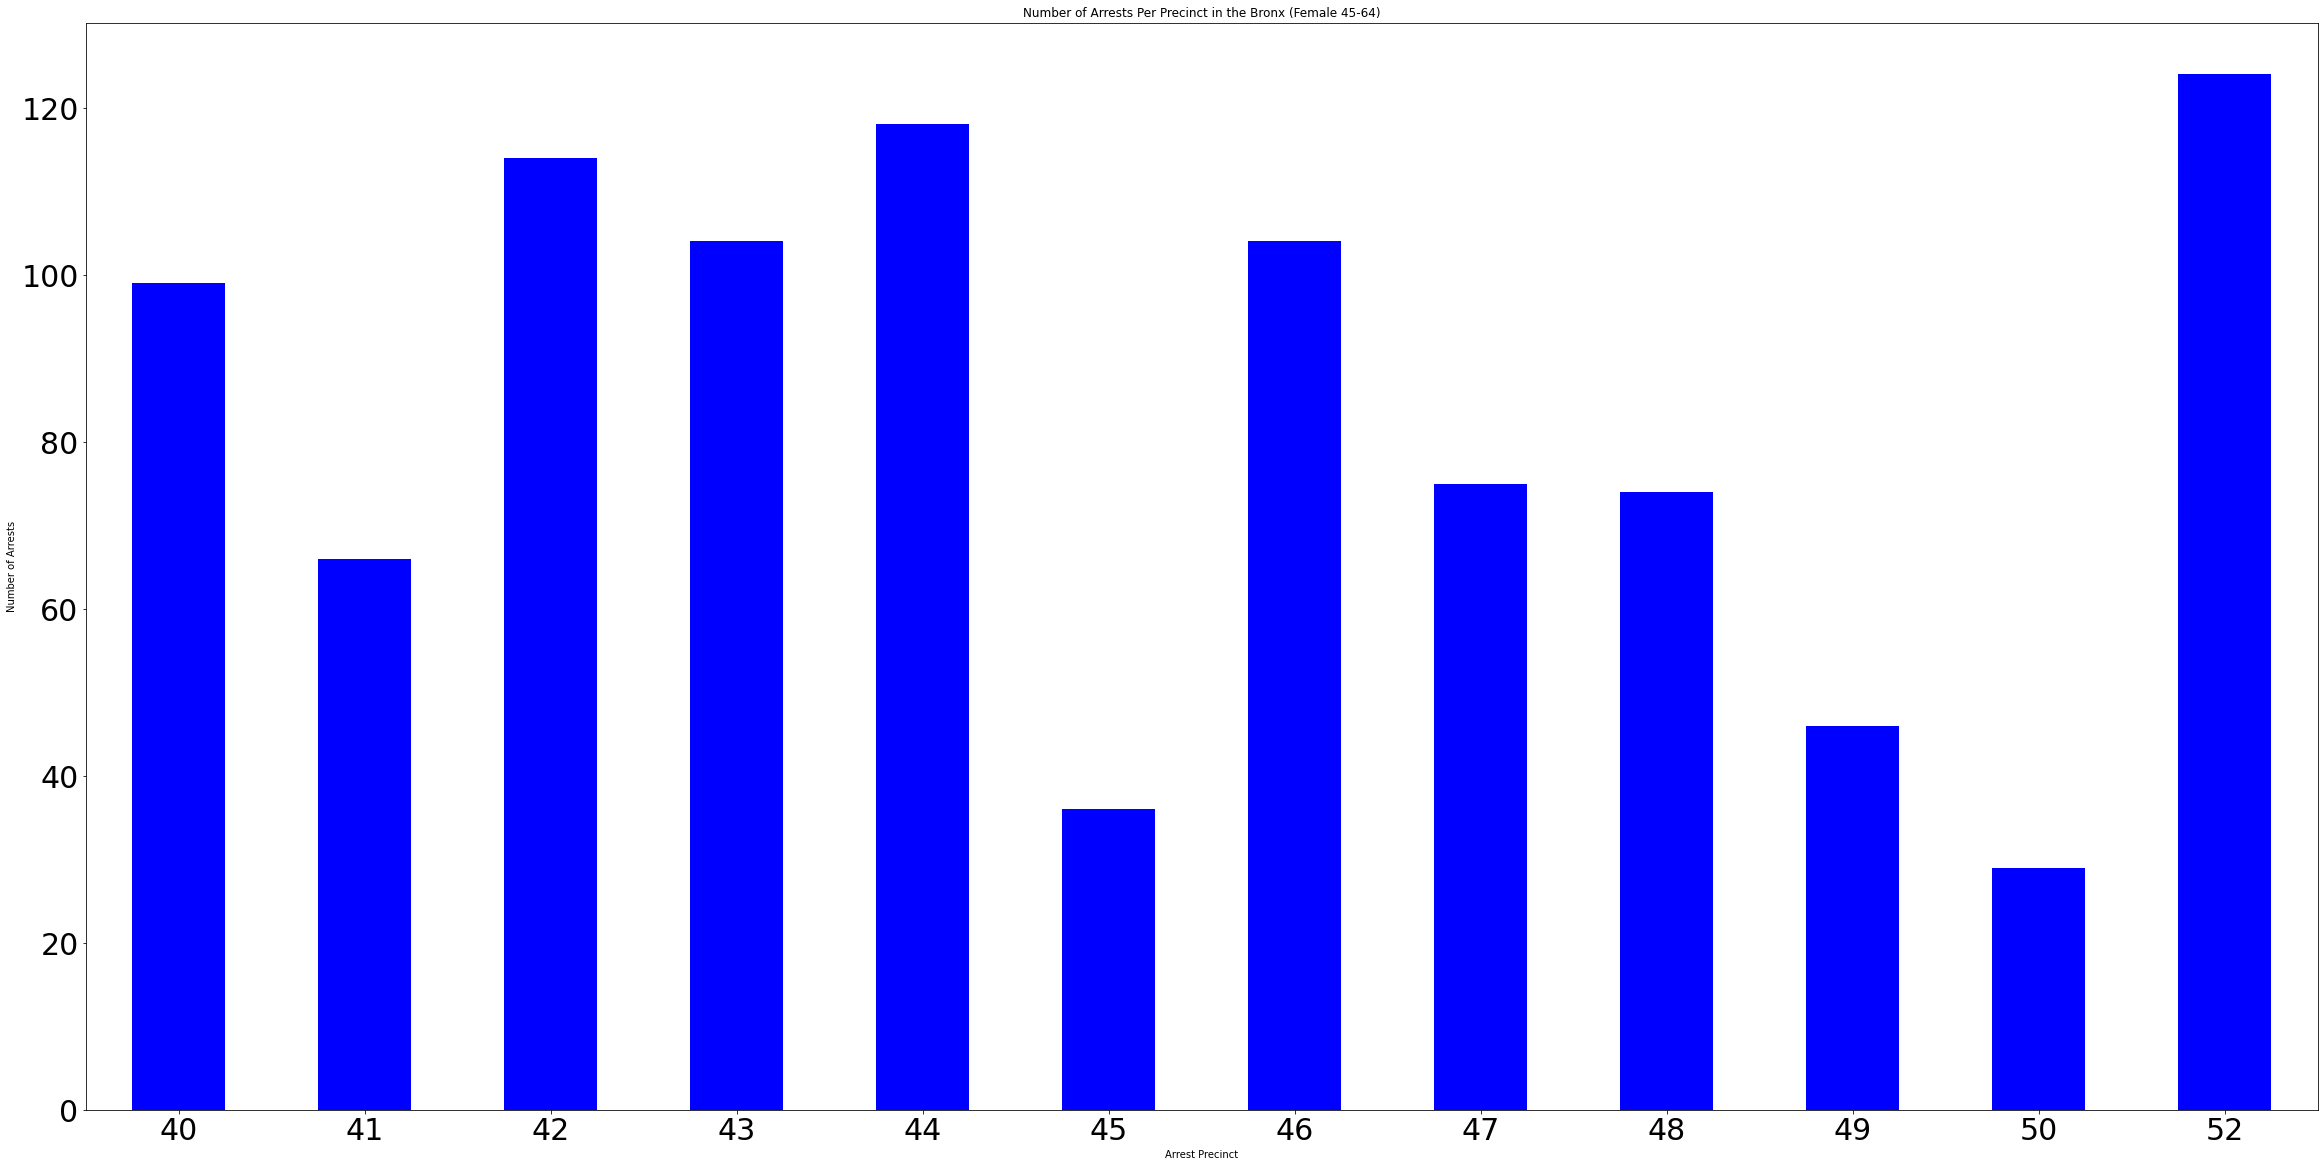

In [32]:
O_A_F_BX_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in the Bronx (Female 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Brooklyn (Female 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

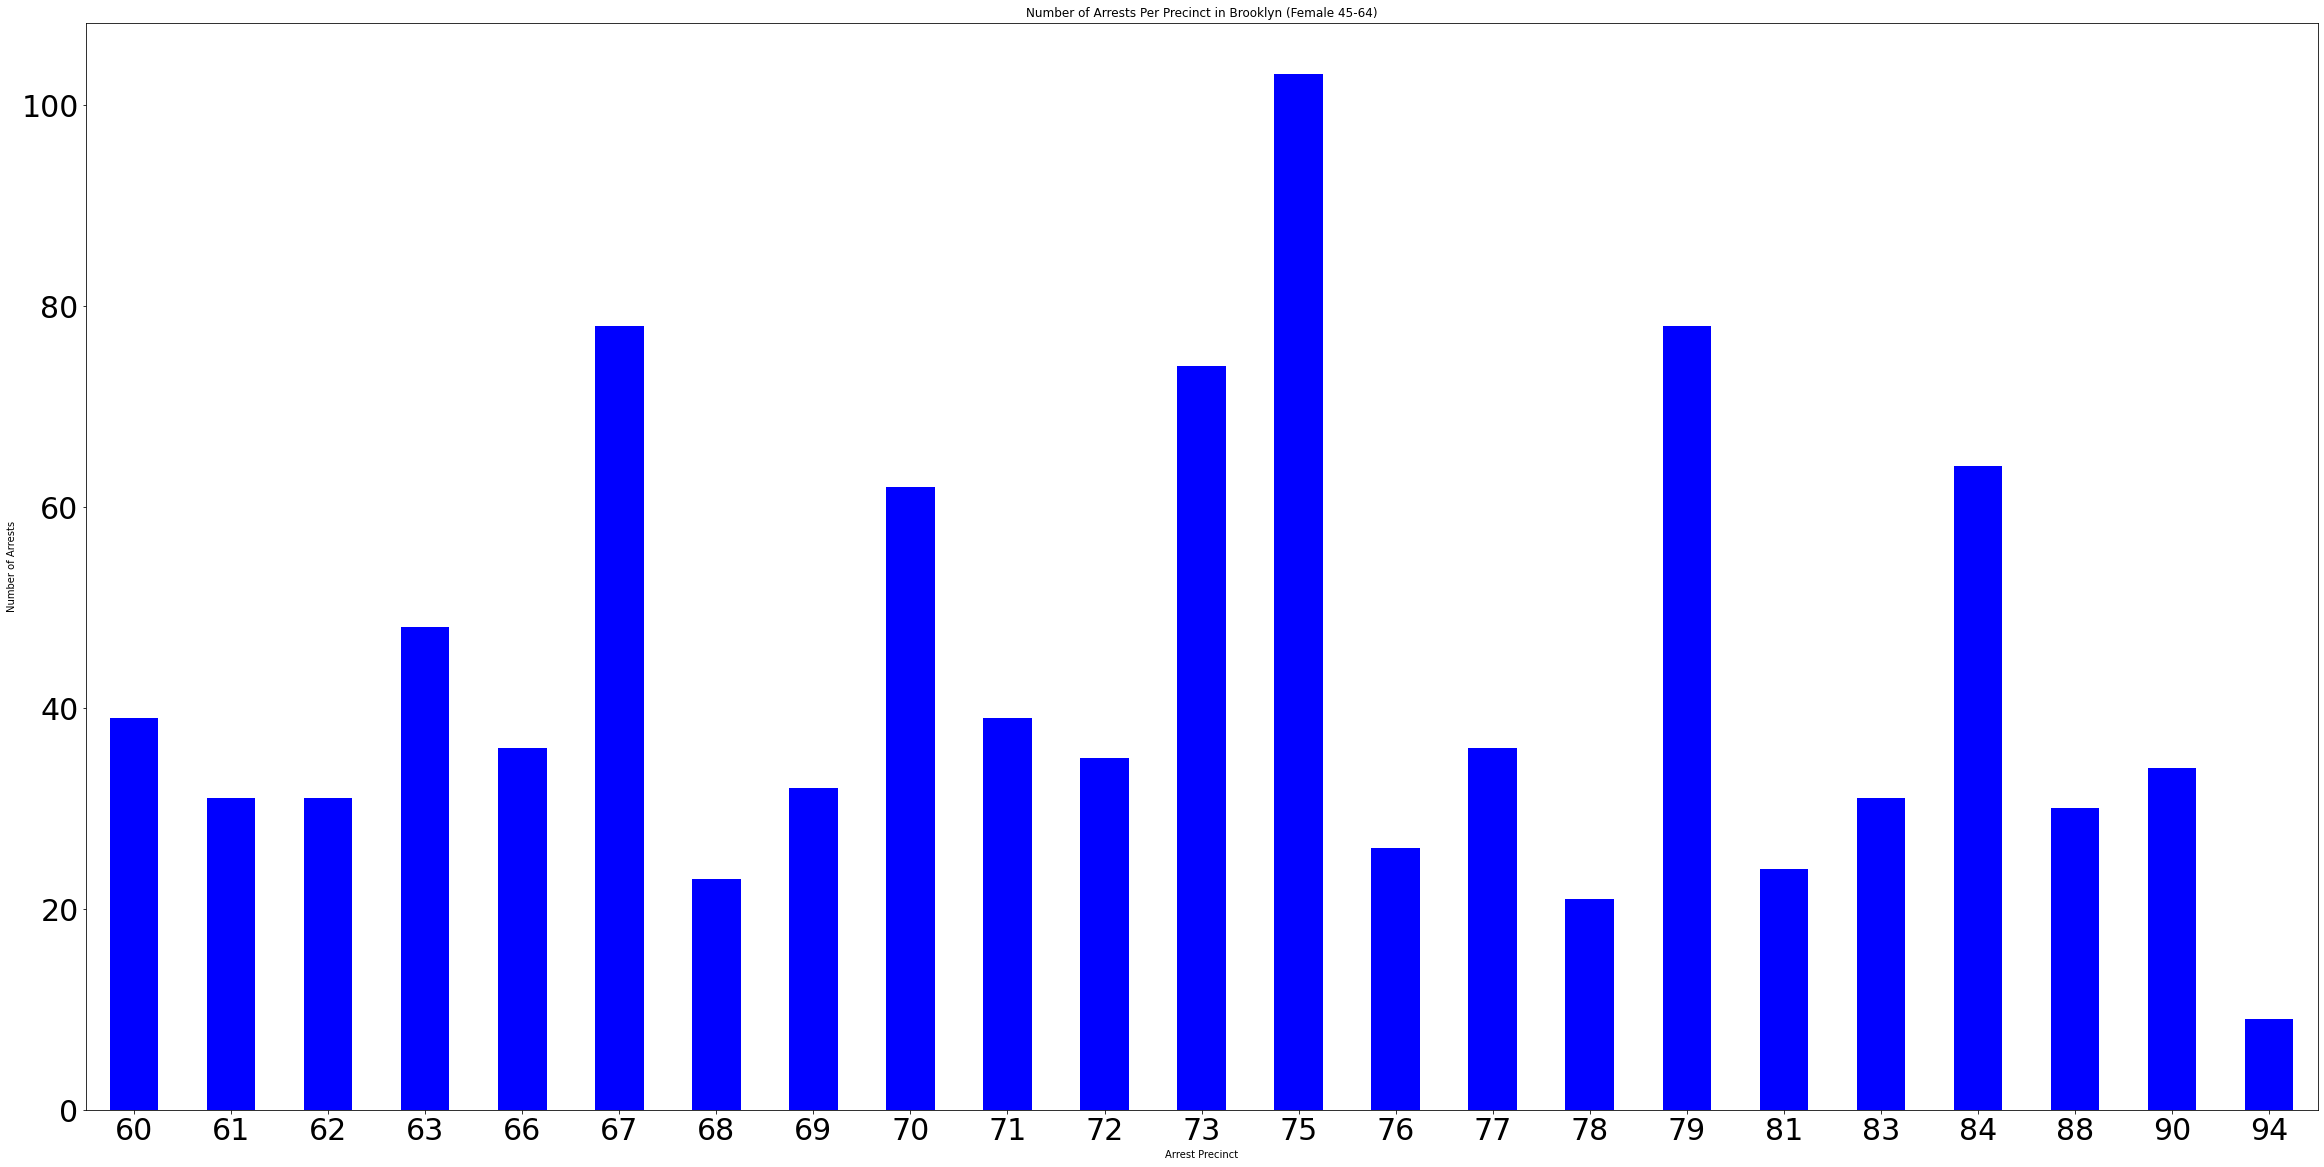

In [33]:
O_A_F_BK_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Brooklyn (Female 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Manhattan (Female 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

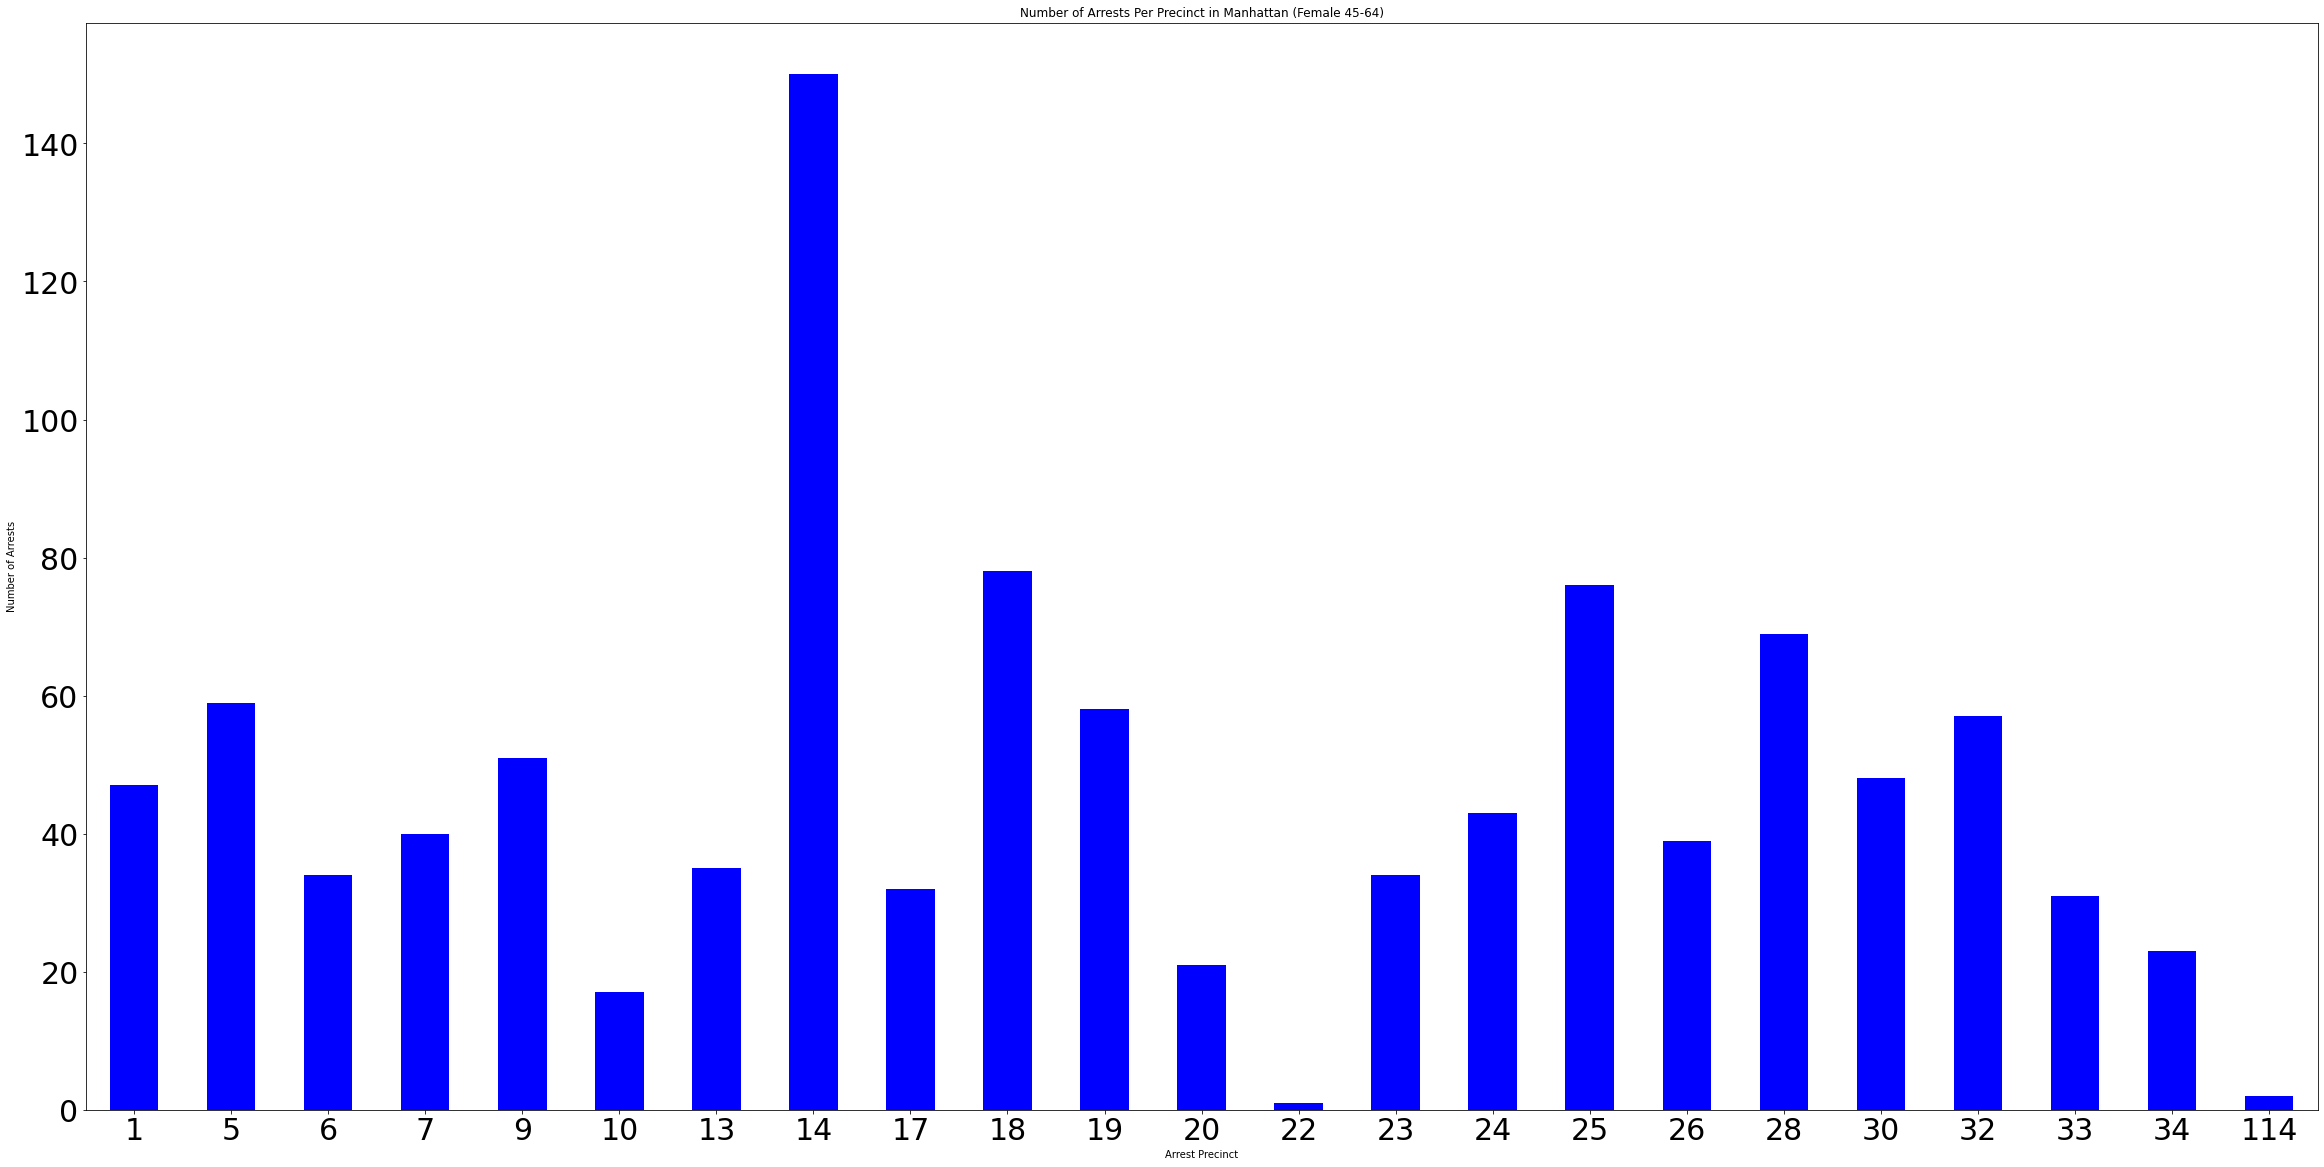

In [34]:
O_A_F_Ma_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Manhattan (Female 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Queens (Female 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

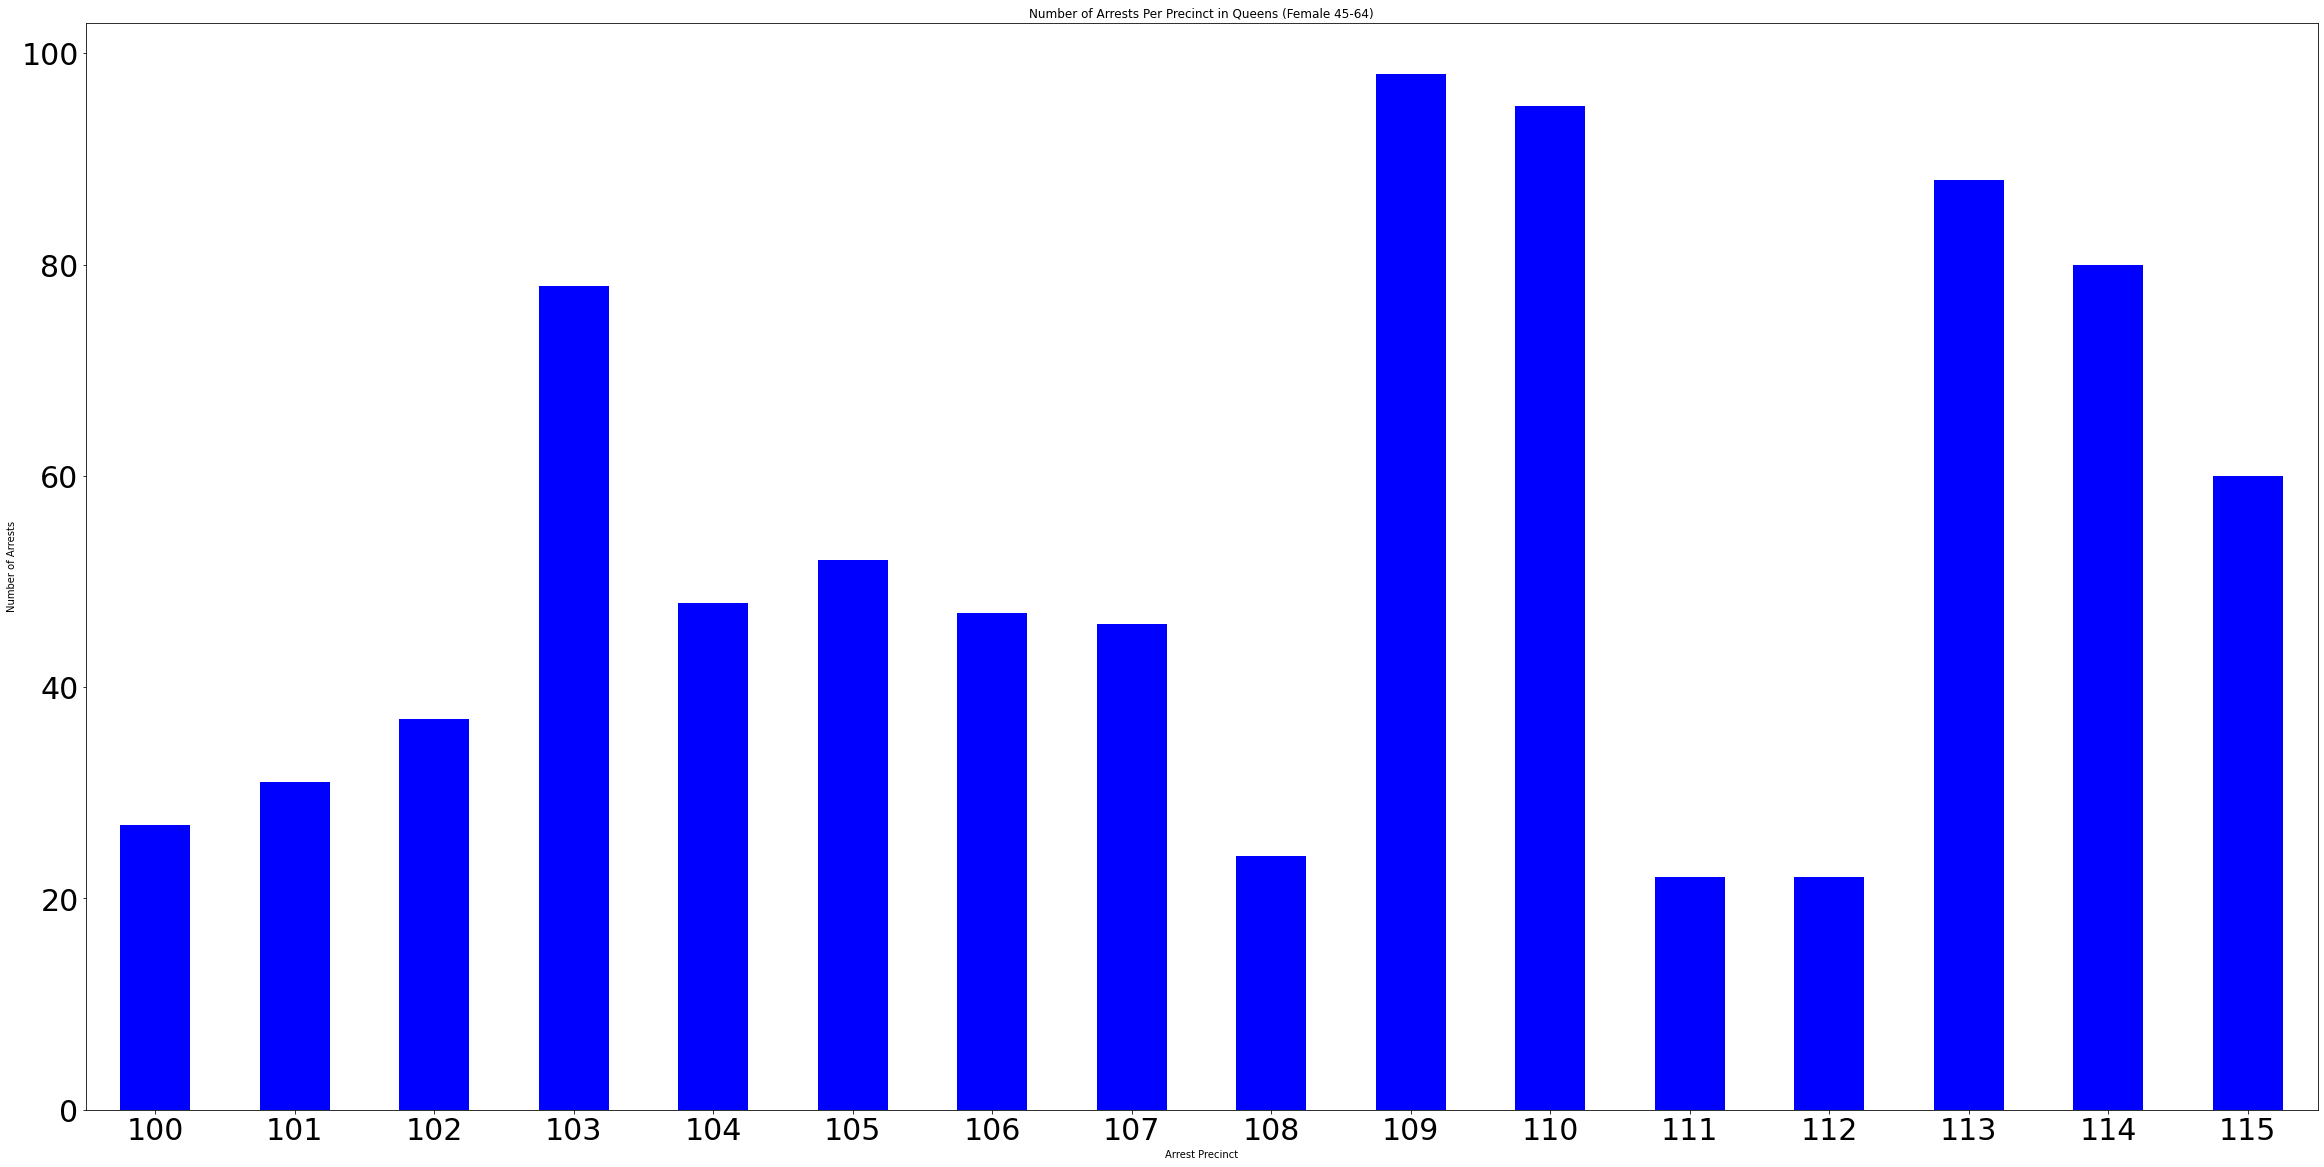

In [35]:
O_A_F_Q_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Queens (Female 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Staten Island (Female 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

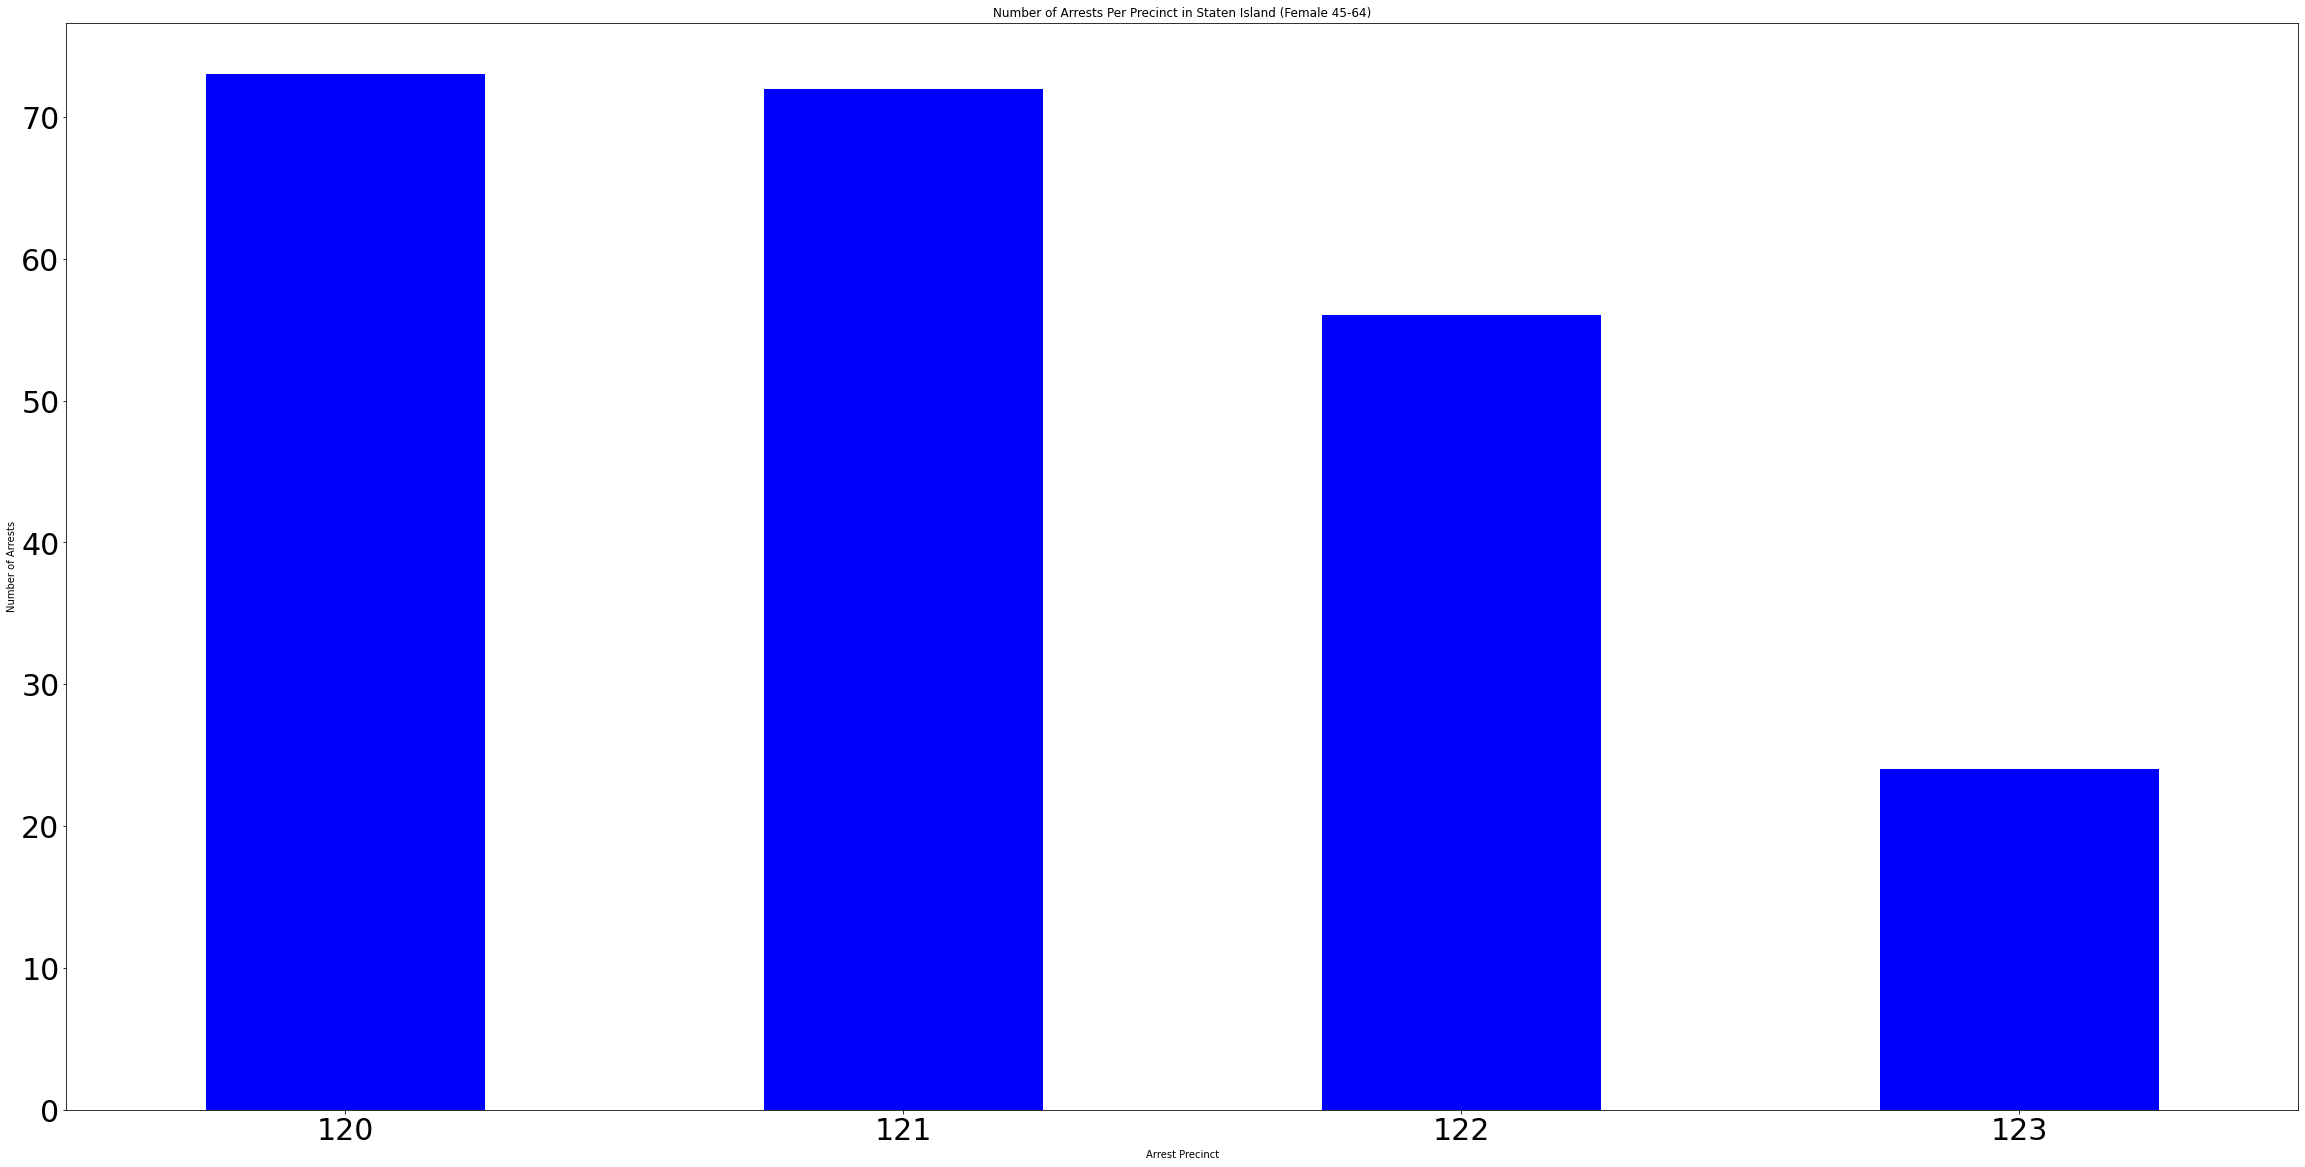

In [36]:
O_A_F_S_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Staten Island (Female 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Manhattan (Male 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

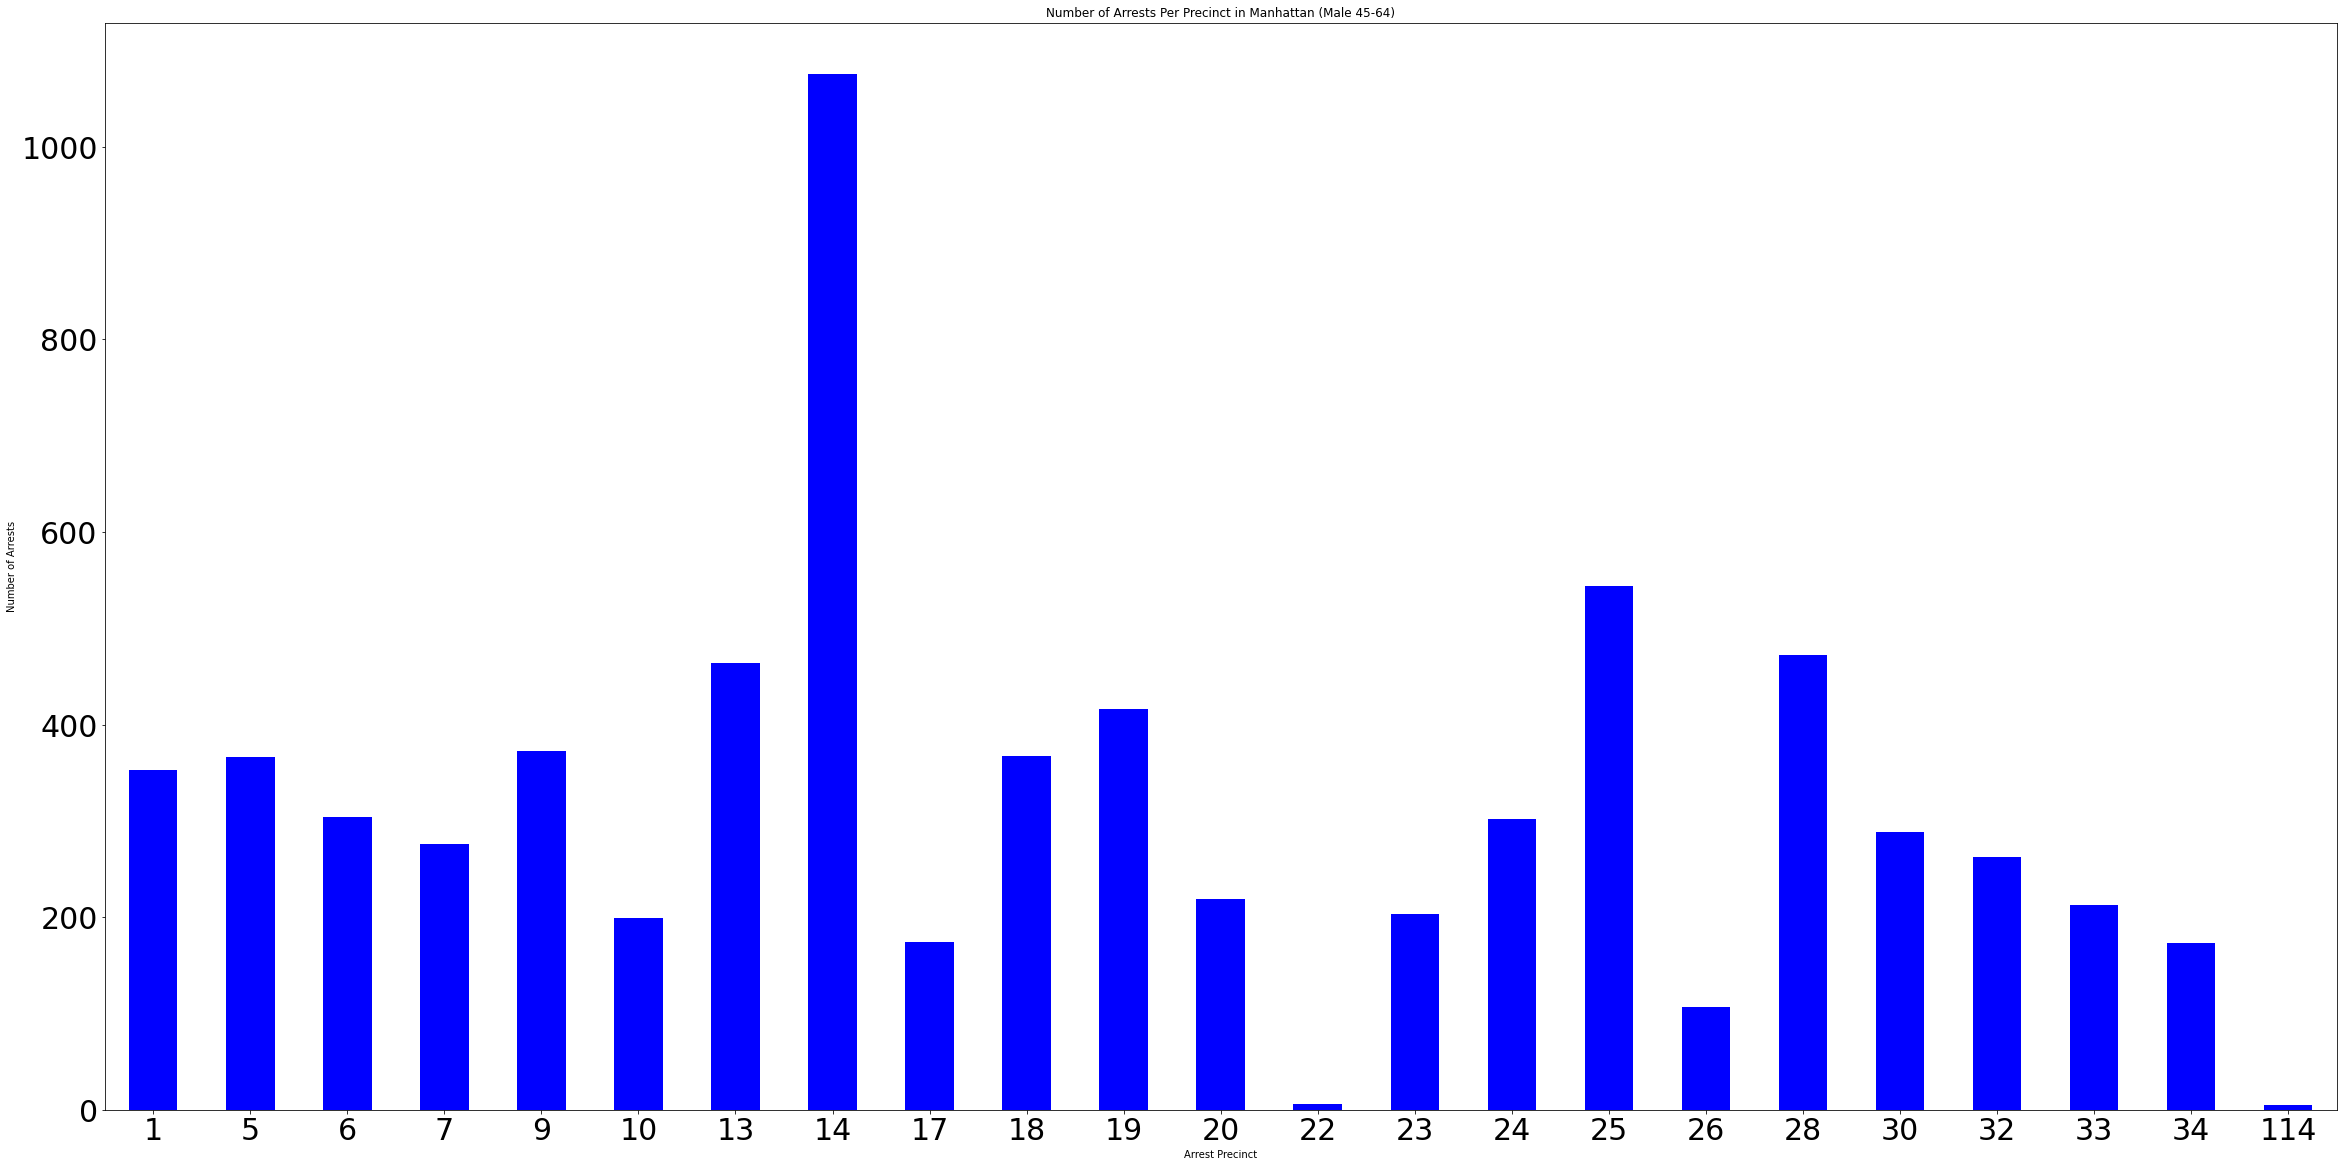

In [37]:
O_A_M_Ma_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Manhattan (Male 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in the Bronx (Male 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

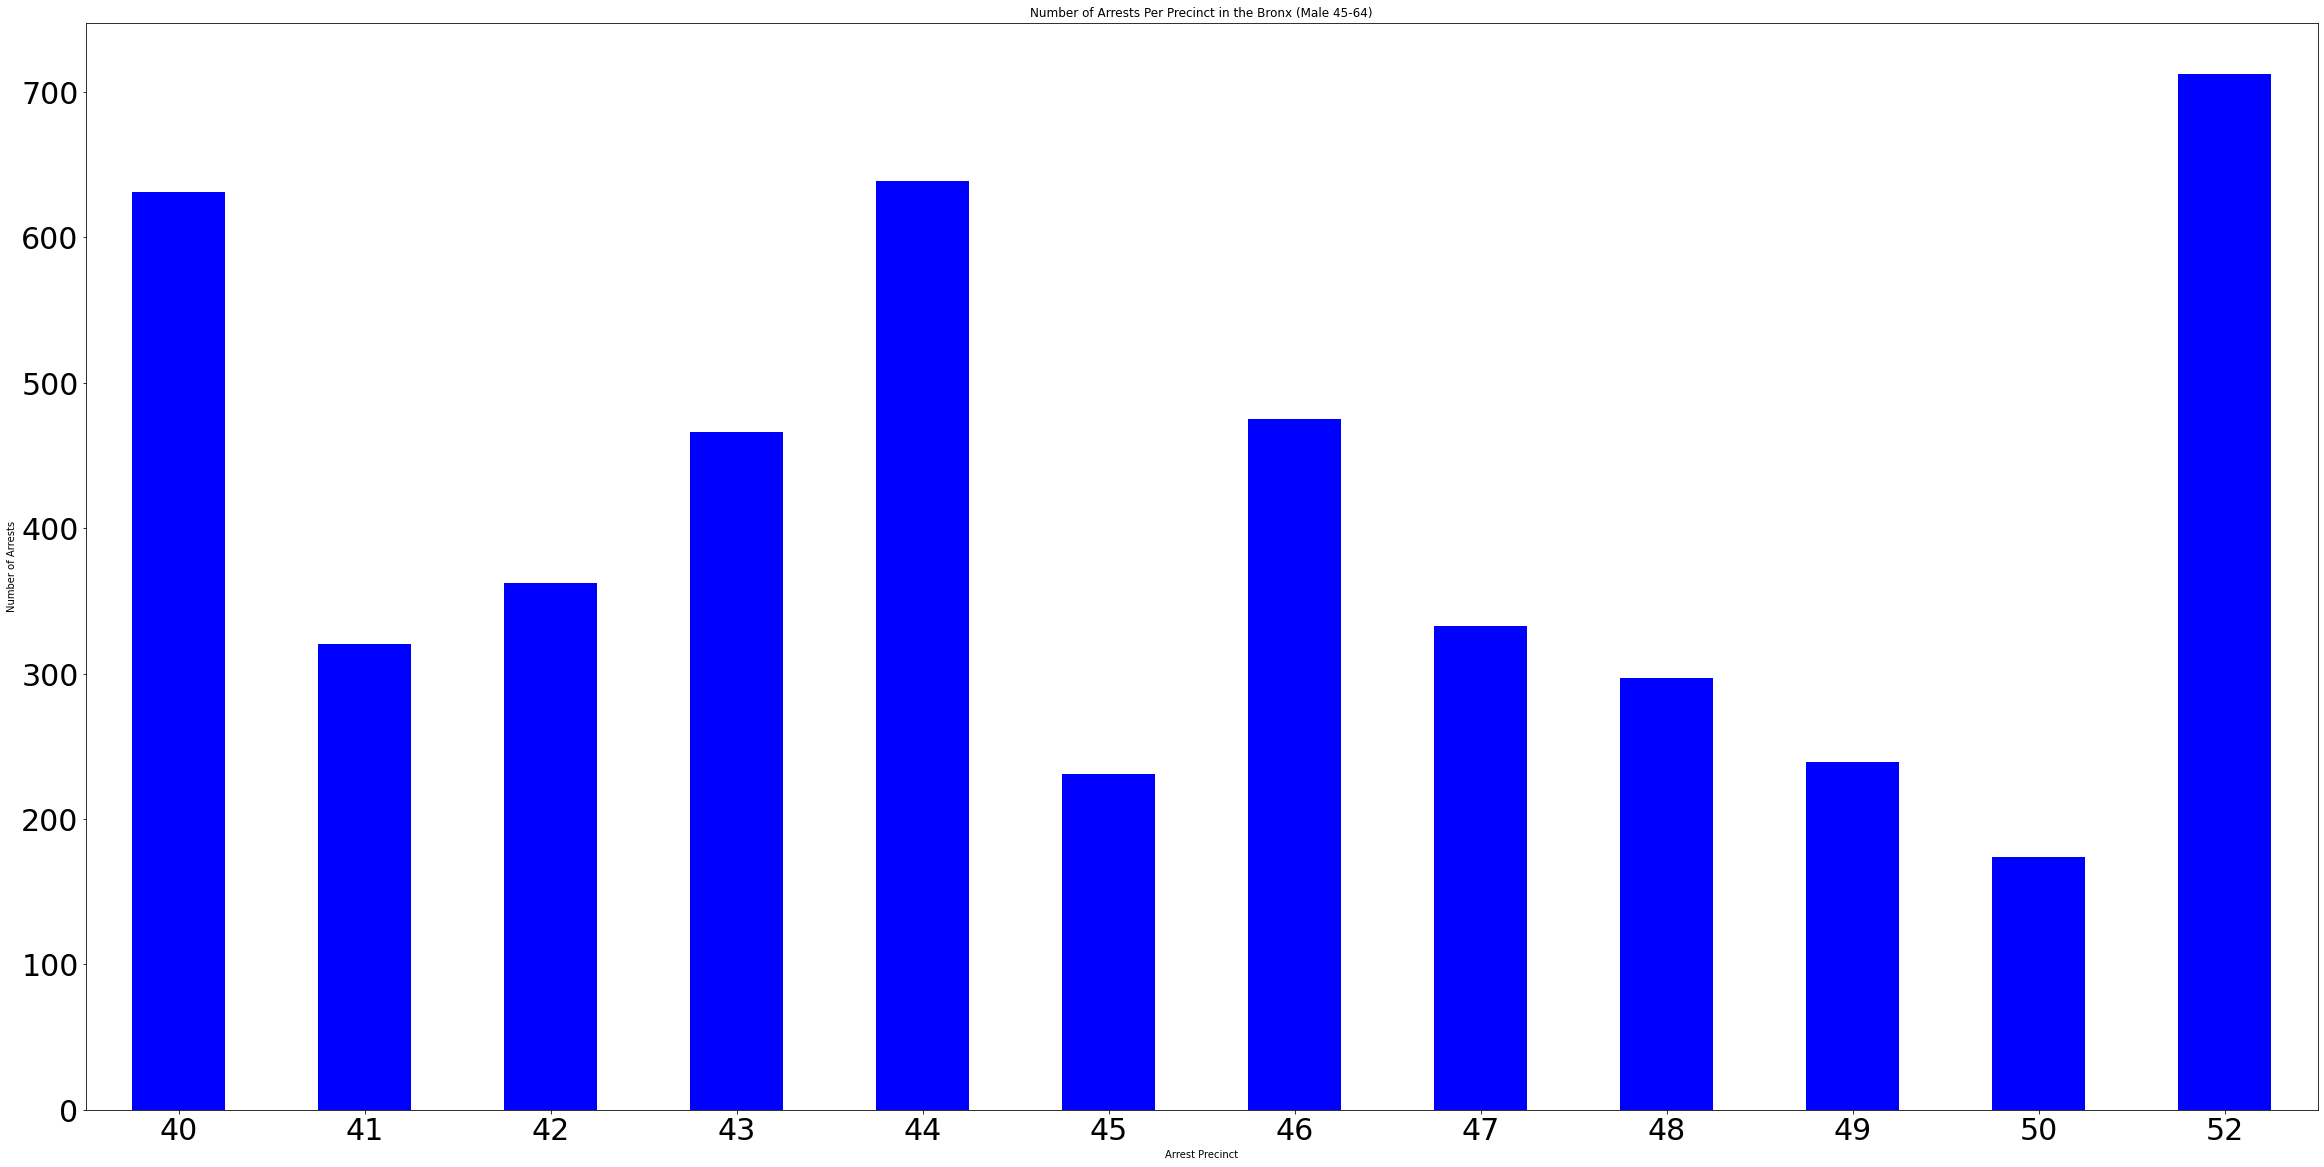

In [38]:
O_A_M_BX_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in the Bronx (Male 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Brooklyn (Male 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

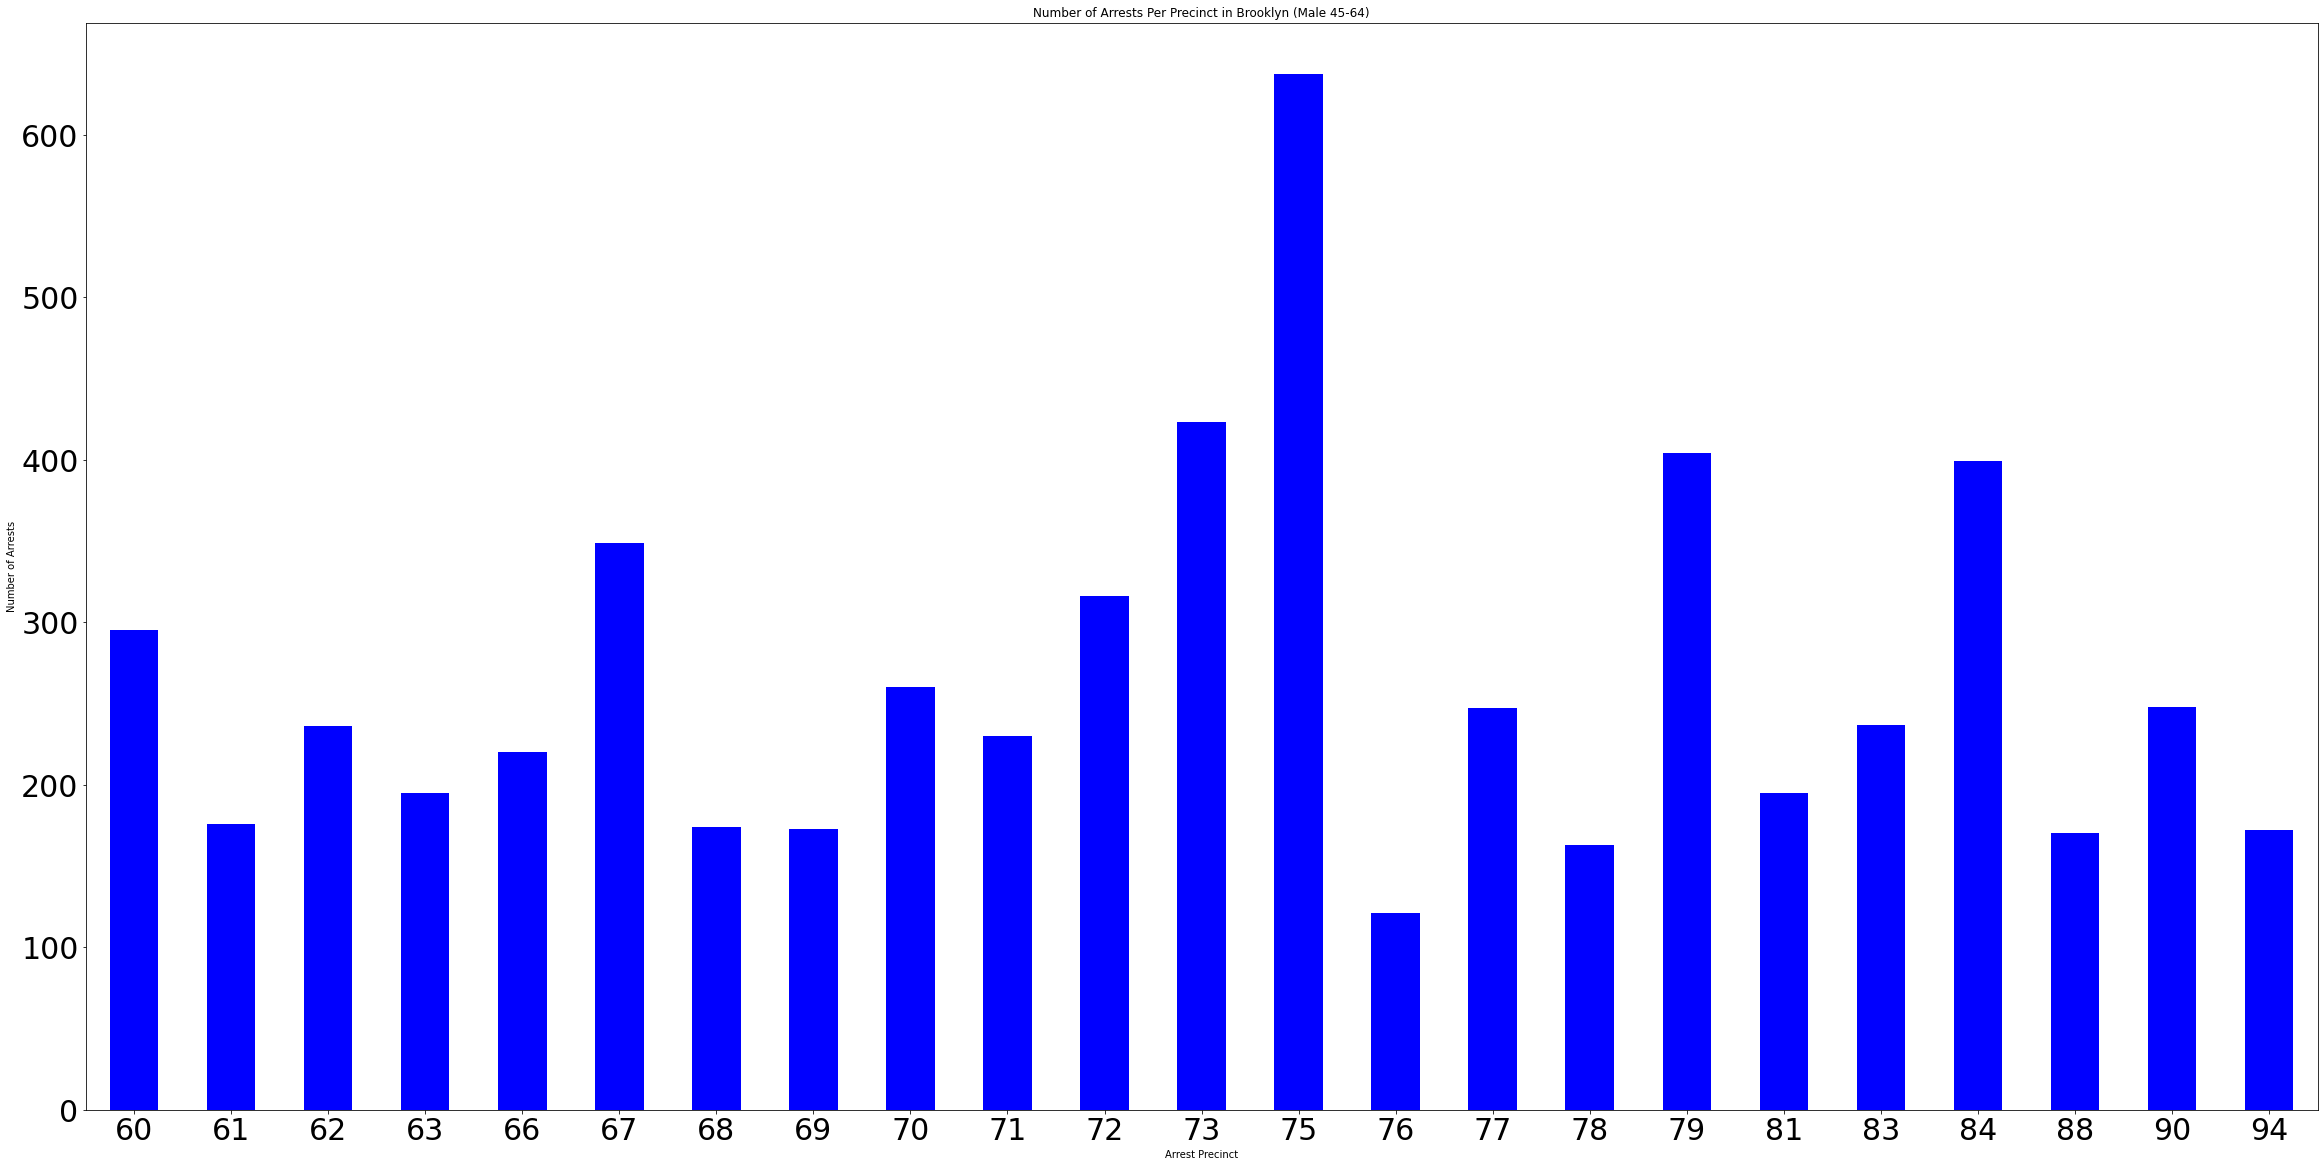

In [39]:
O_A_M_BK_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Brooklyn (Male 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Queens (Male 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

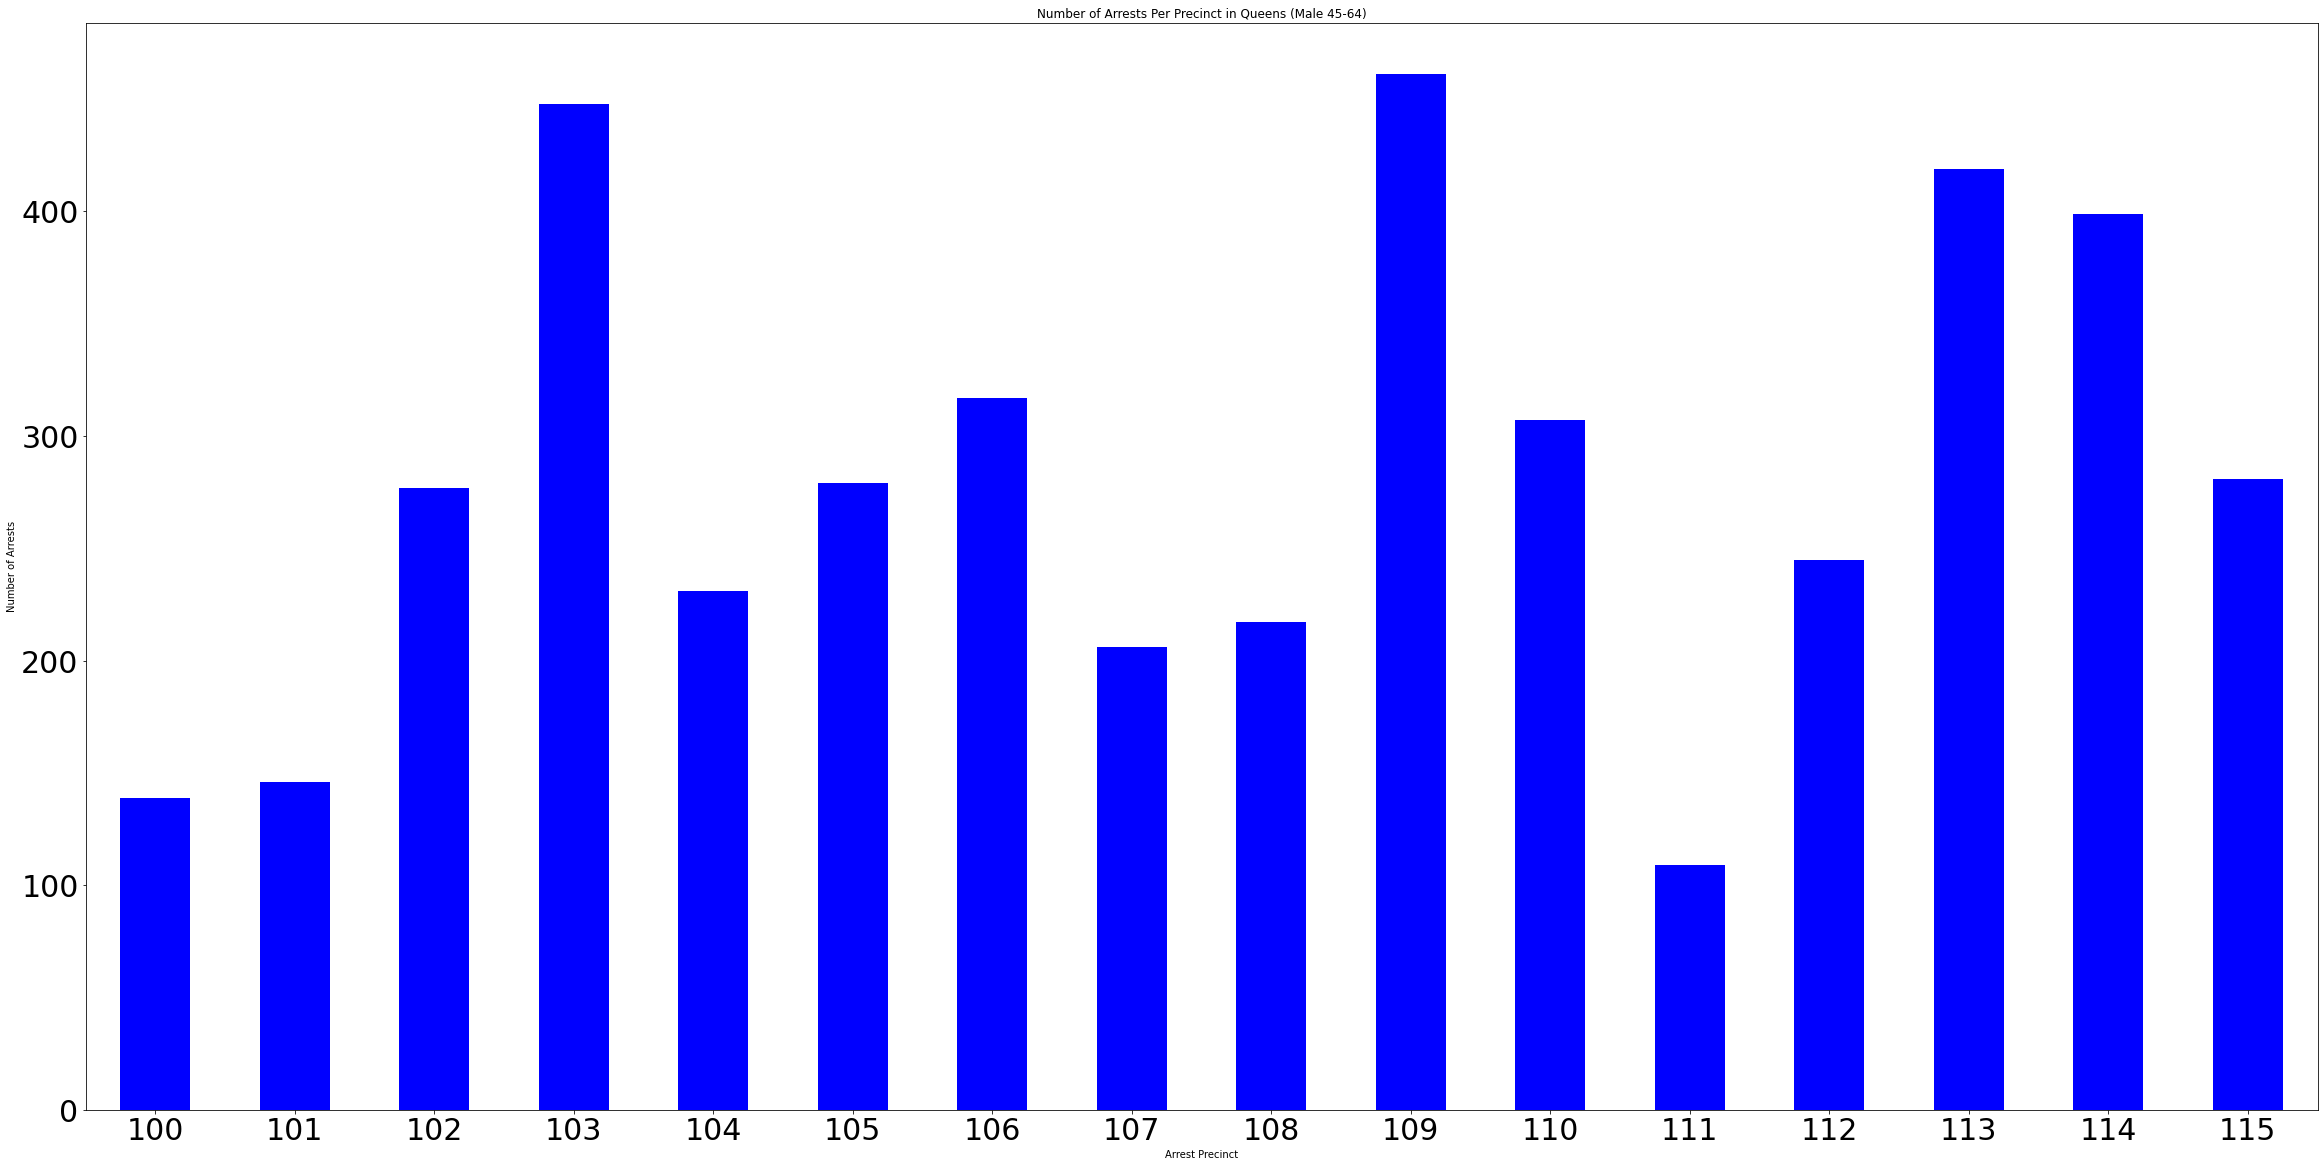

In [40]:
O_A_M_Q_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Queens (Male 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Staten Island (Male 45-64)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

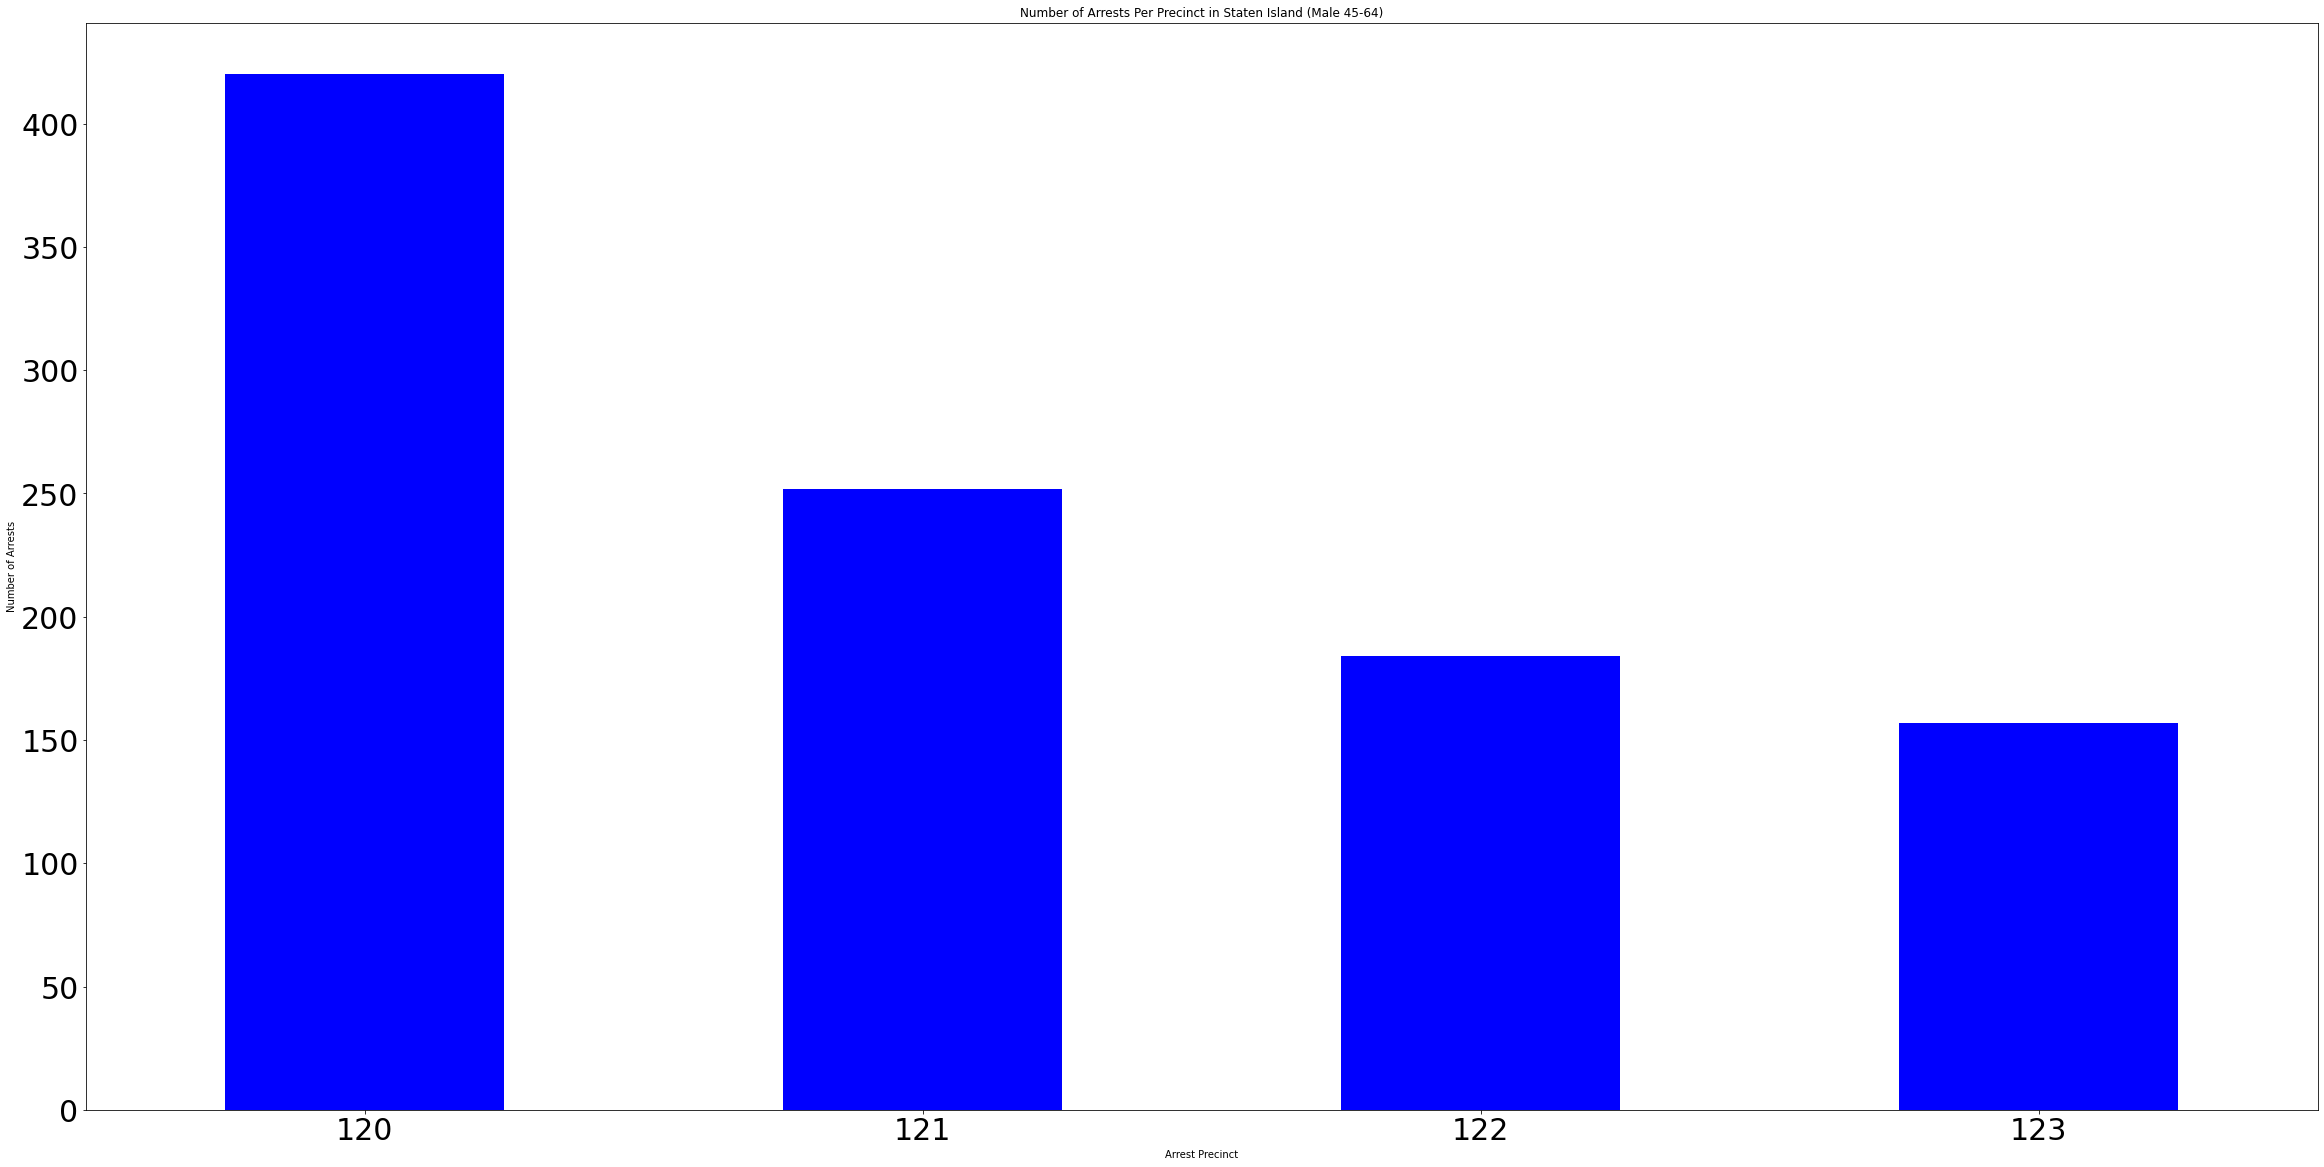

In [41]:
O_A_M_S_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Staten Island (Male 45-64)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct (Male 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

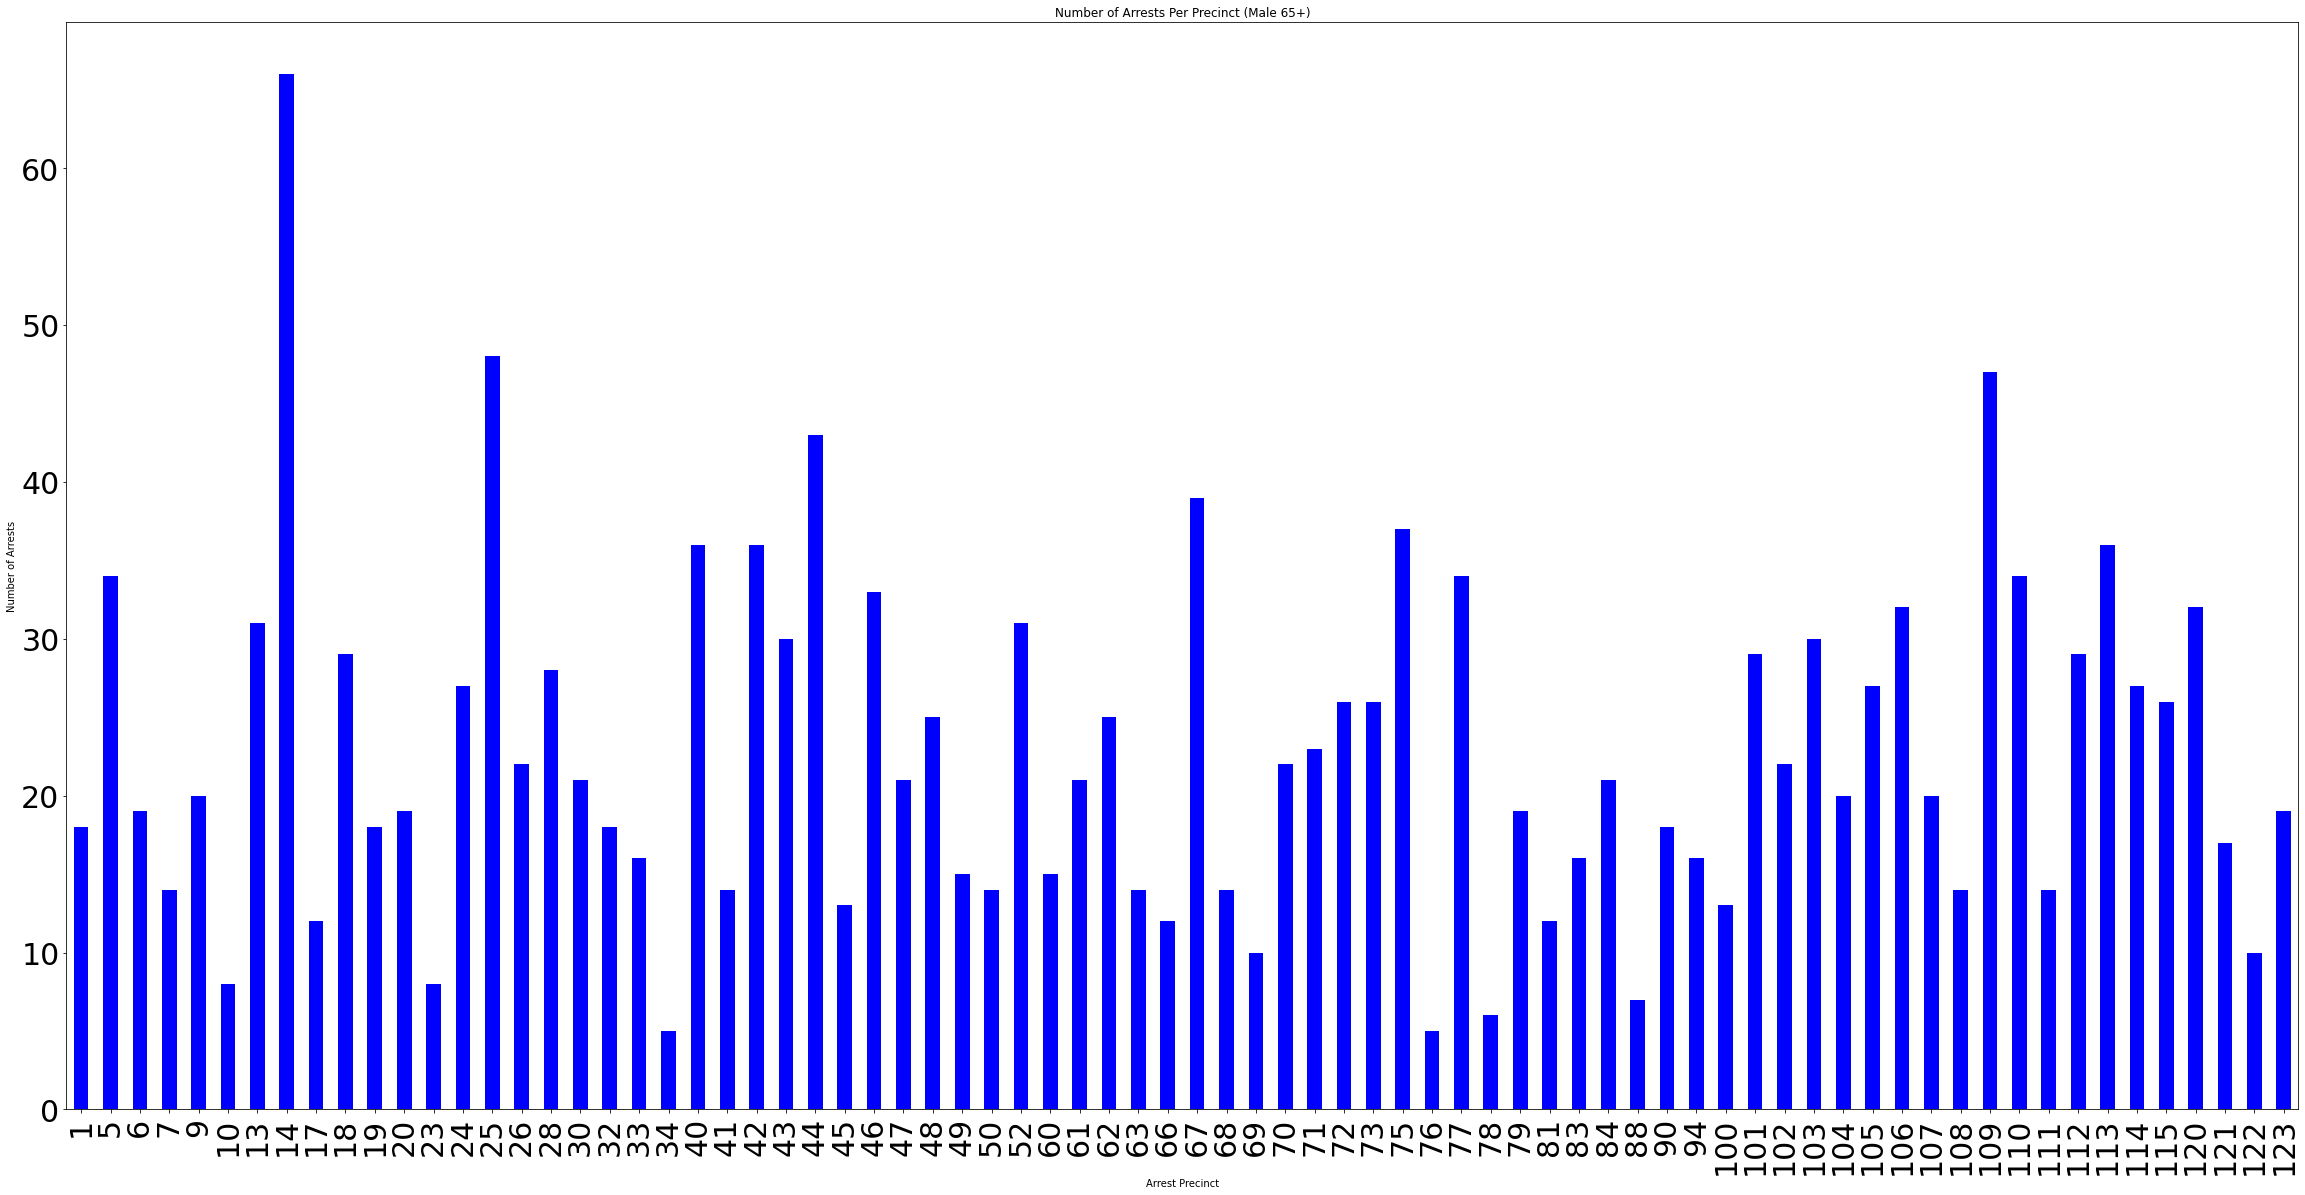

In [42]:
G_M_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct (Male 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Manhattan (Male 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

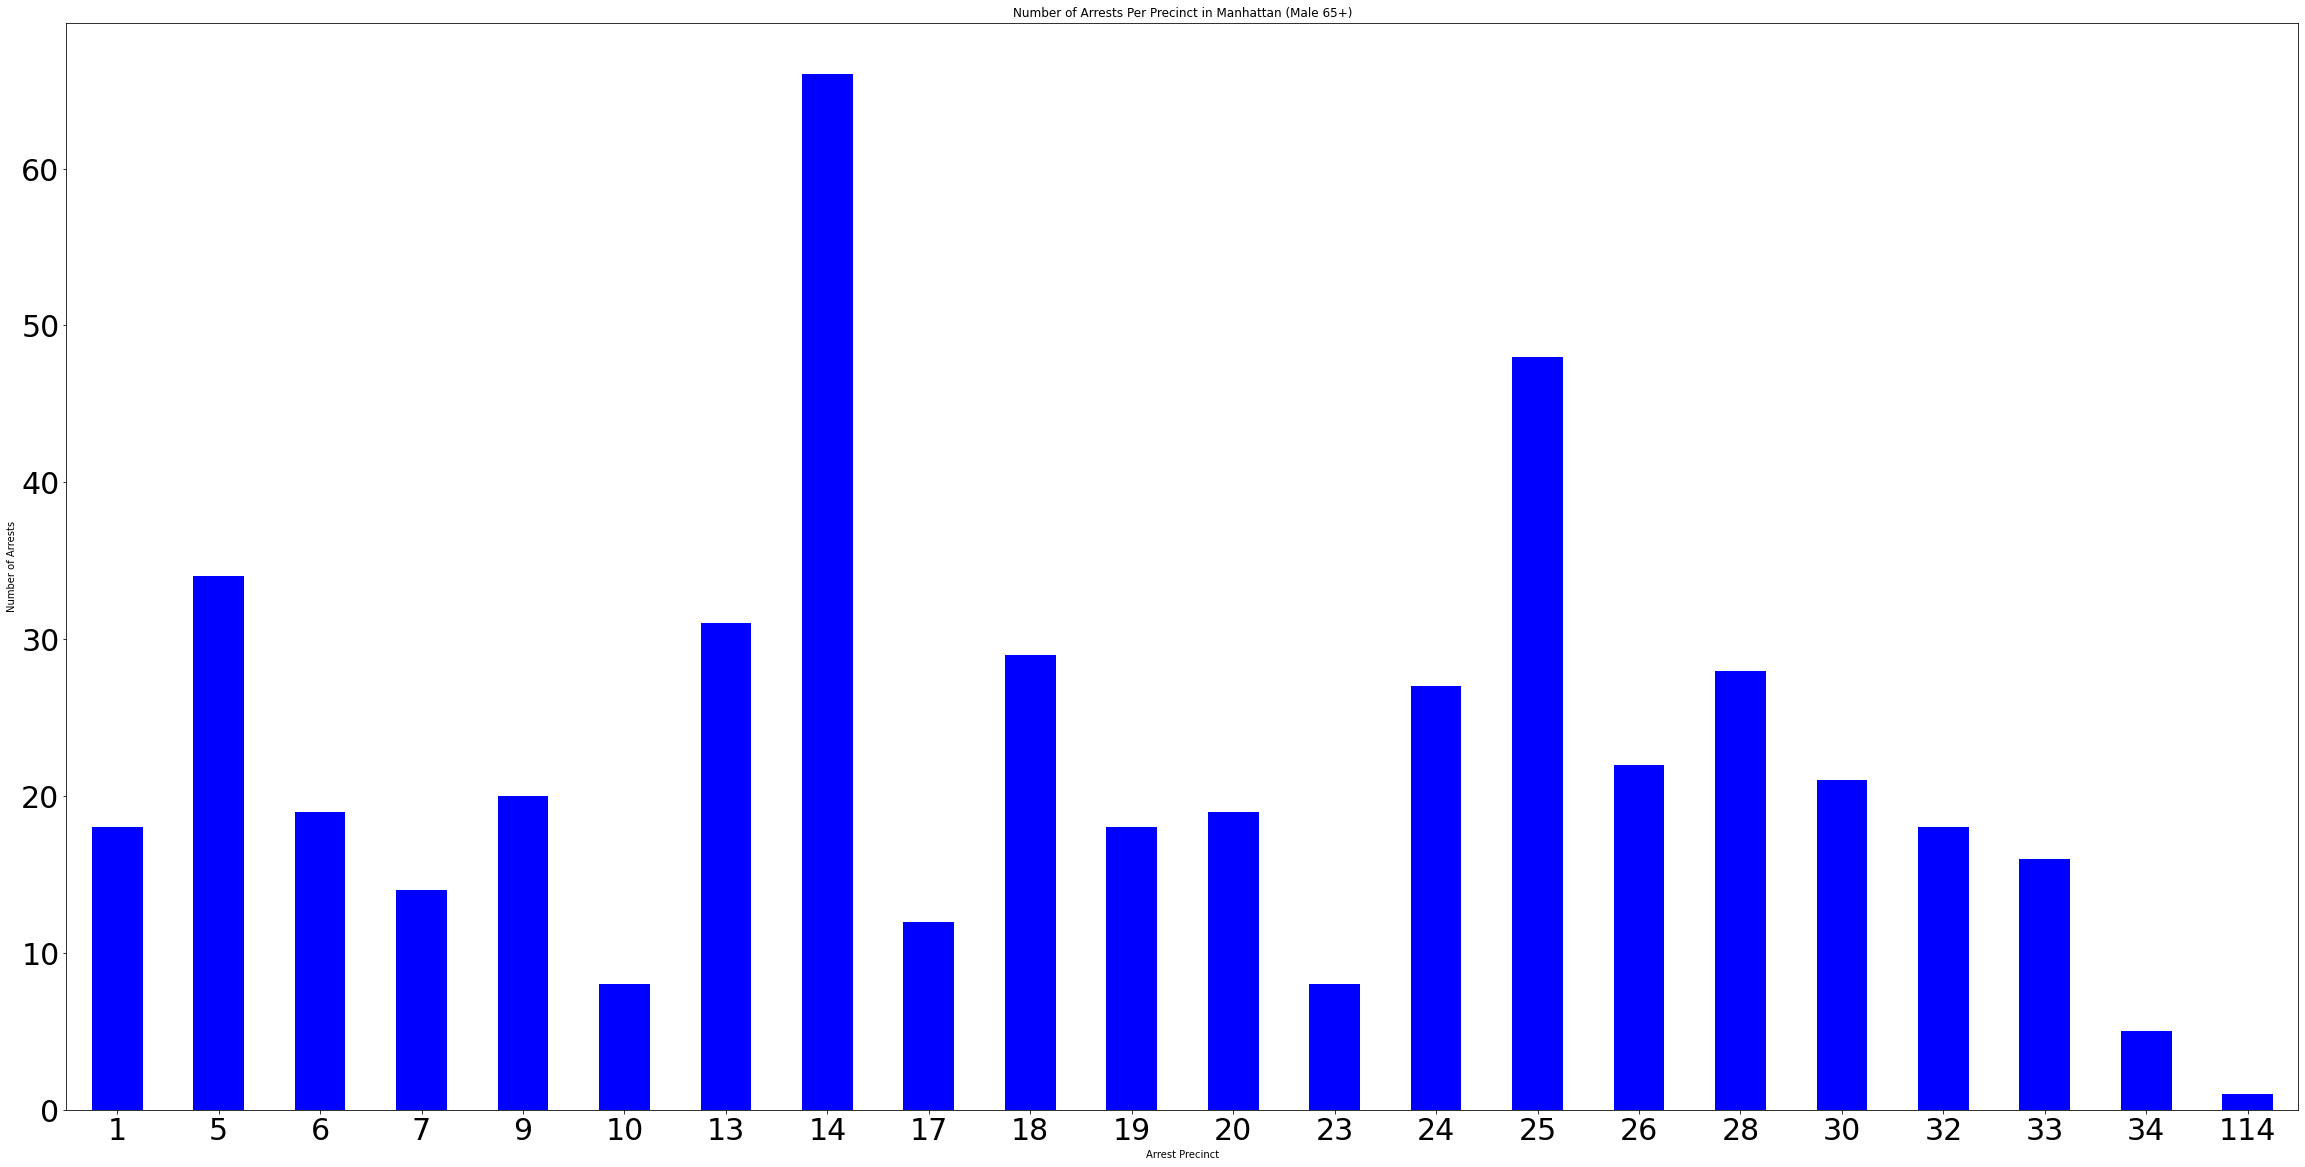

In [43]:
G_M_Ma_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Manhattan (Male 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in the Bronx (Male 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

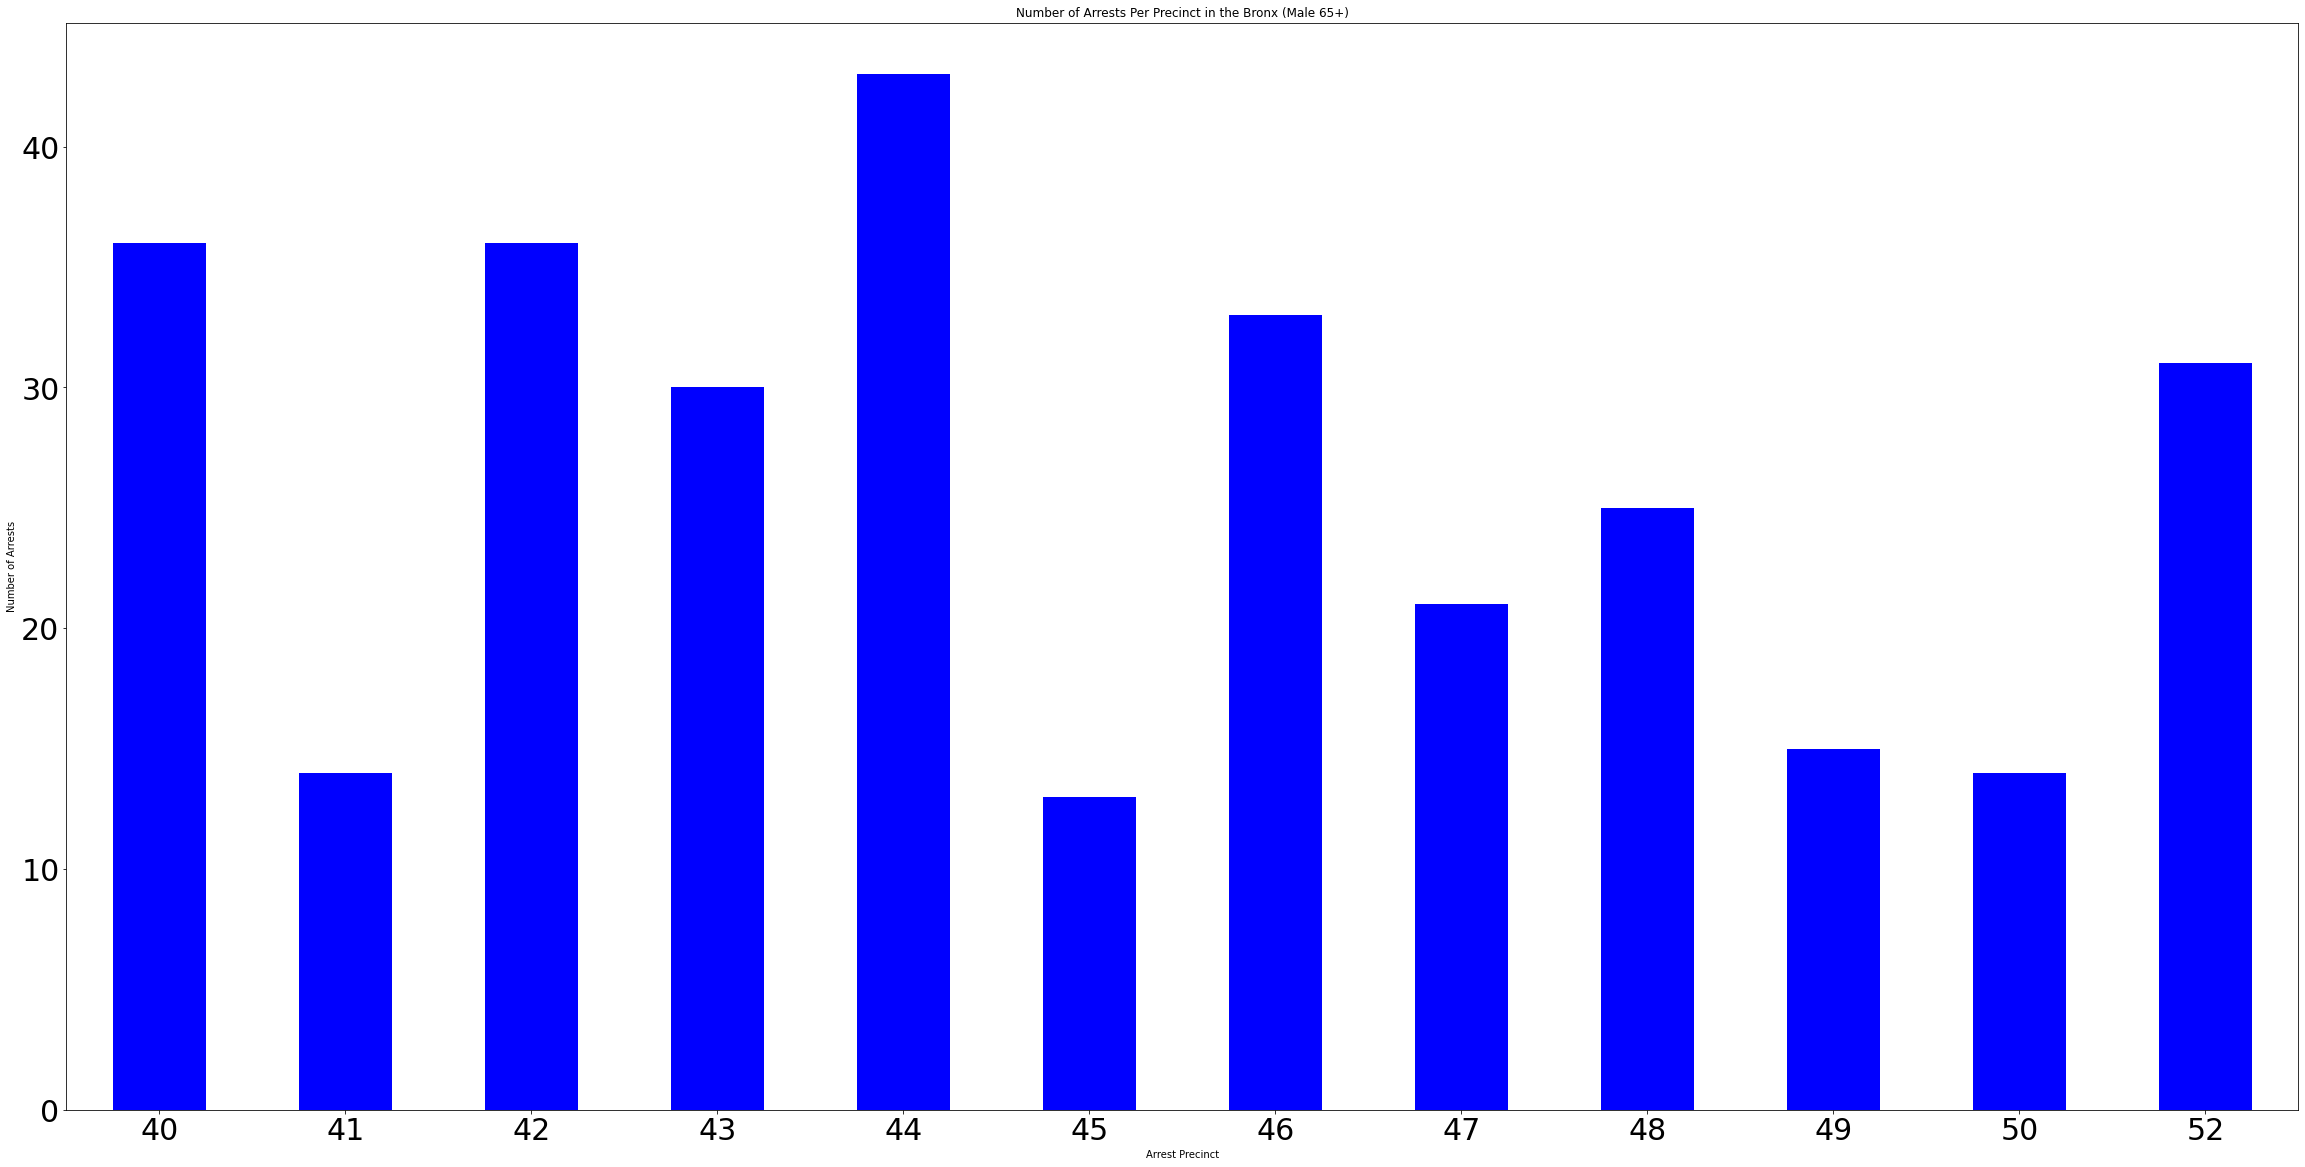

In [44]:
G_M_BX_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in the Bronx (Male 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Booklyn (Male 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

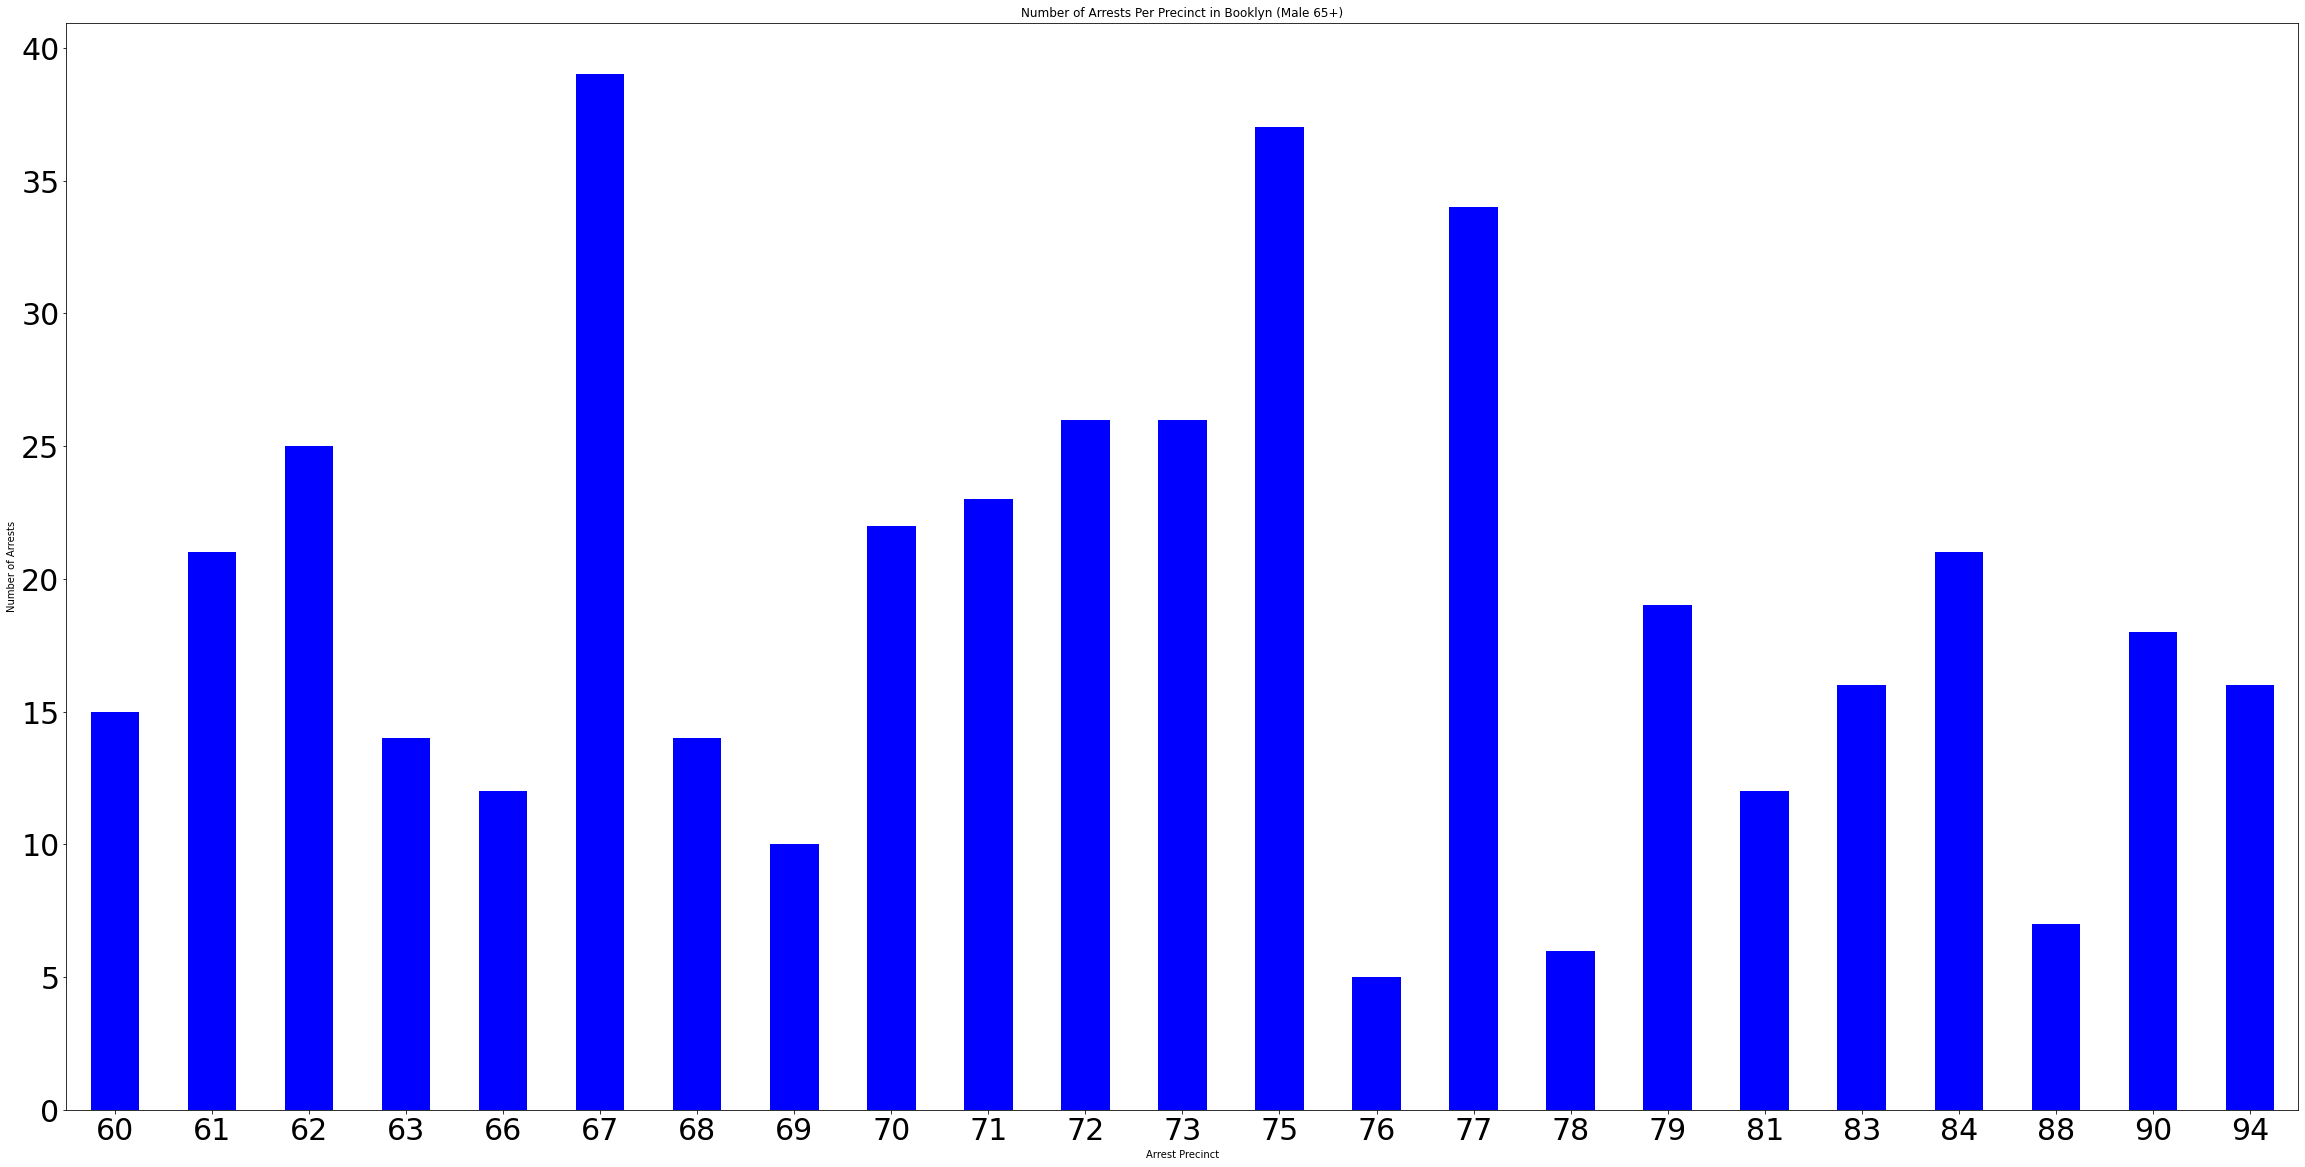

In [45]:
G_M_BK_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Booklyn (Male 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Queens (Male 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

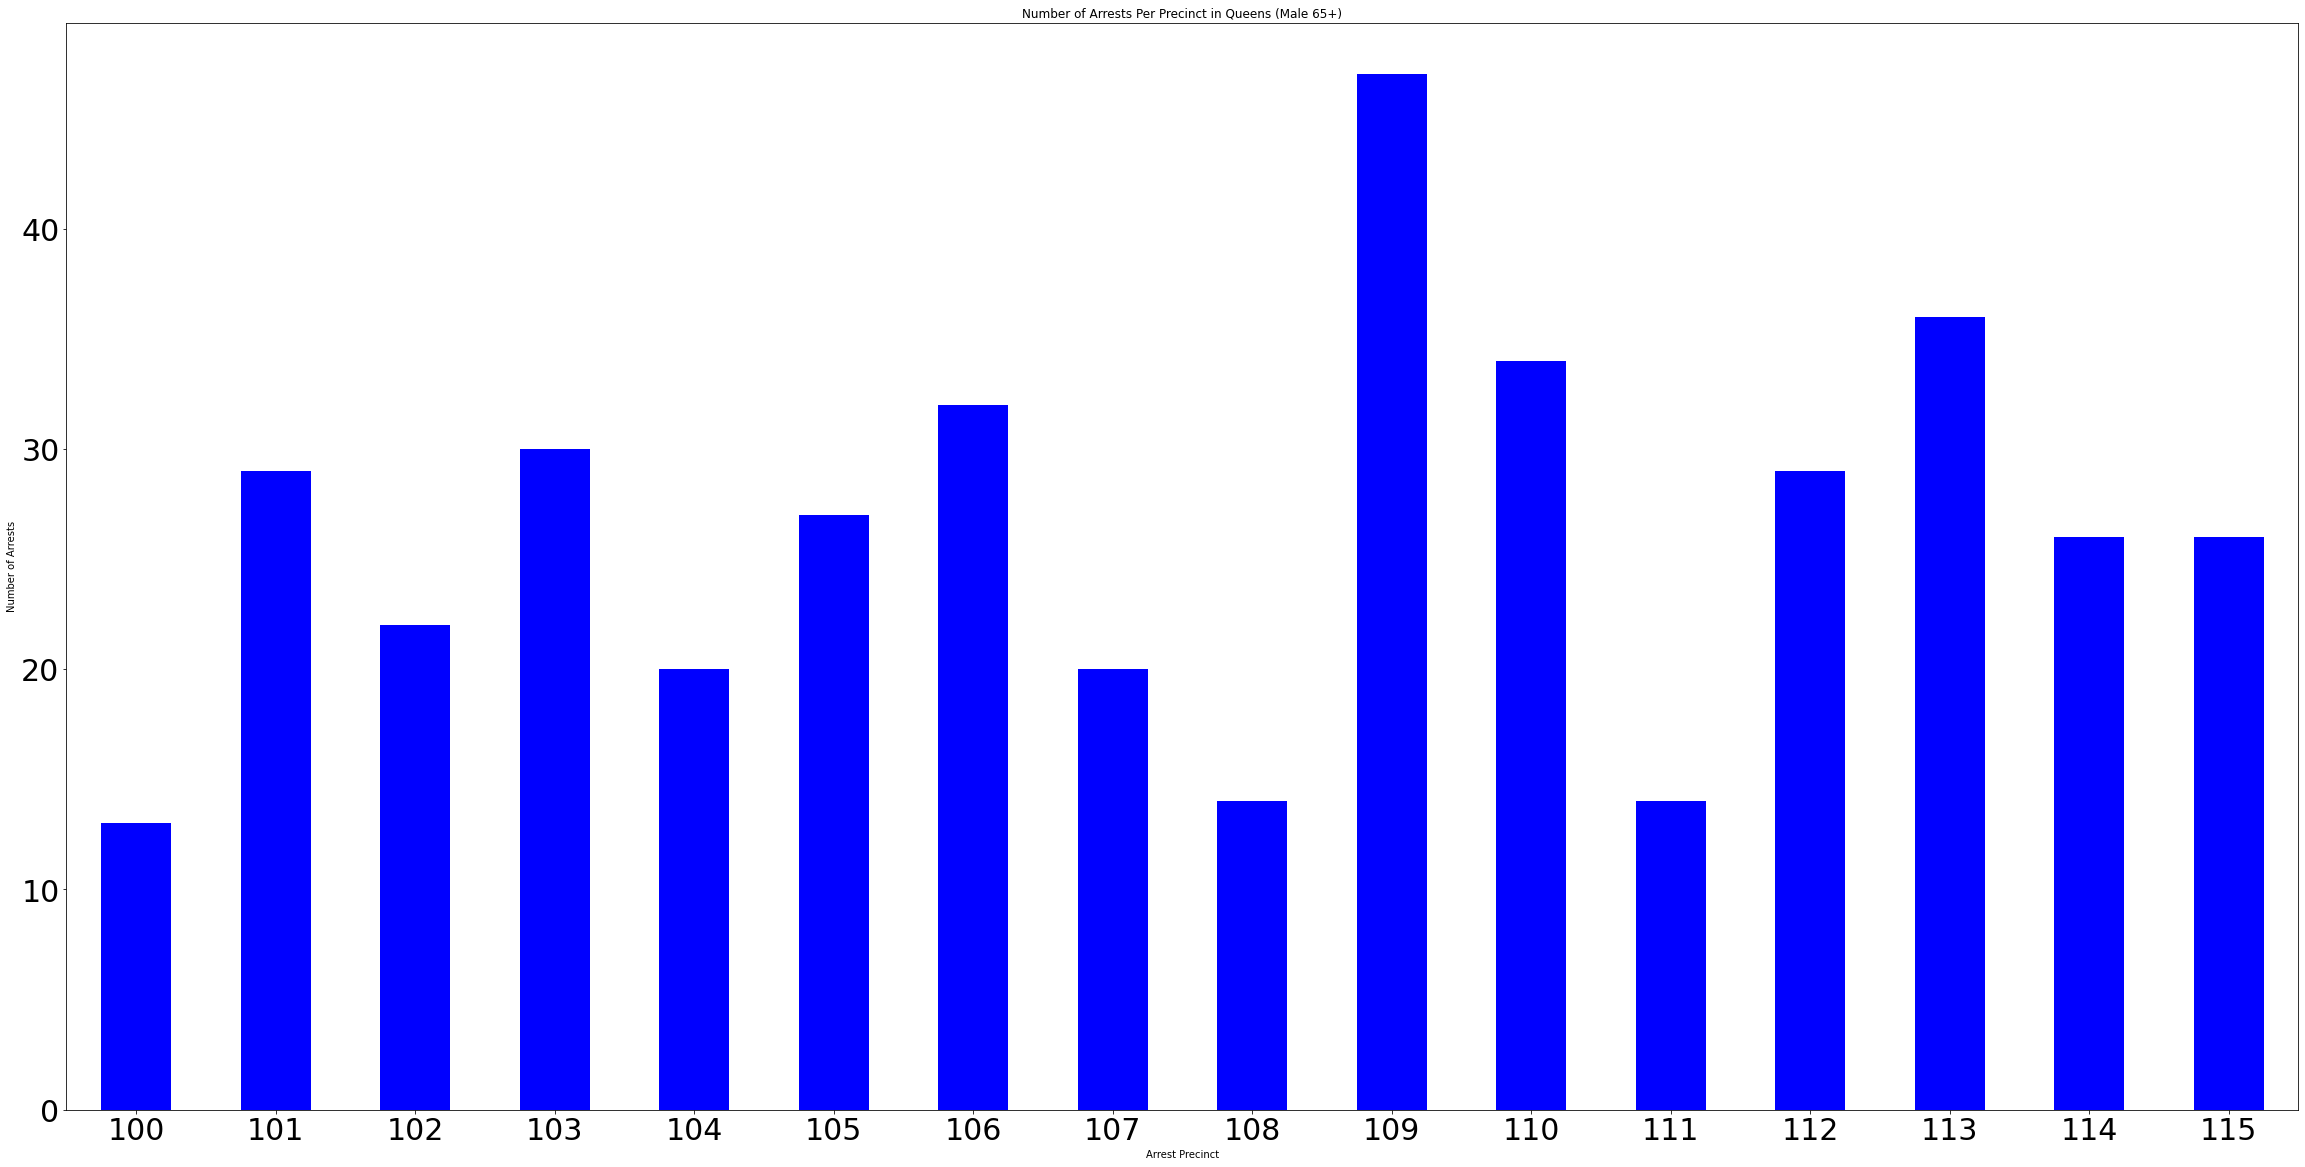

In [46]:
G_M_Q_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Queens (Male 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Staten Island (Male 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

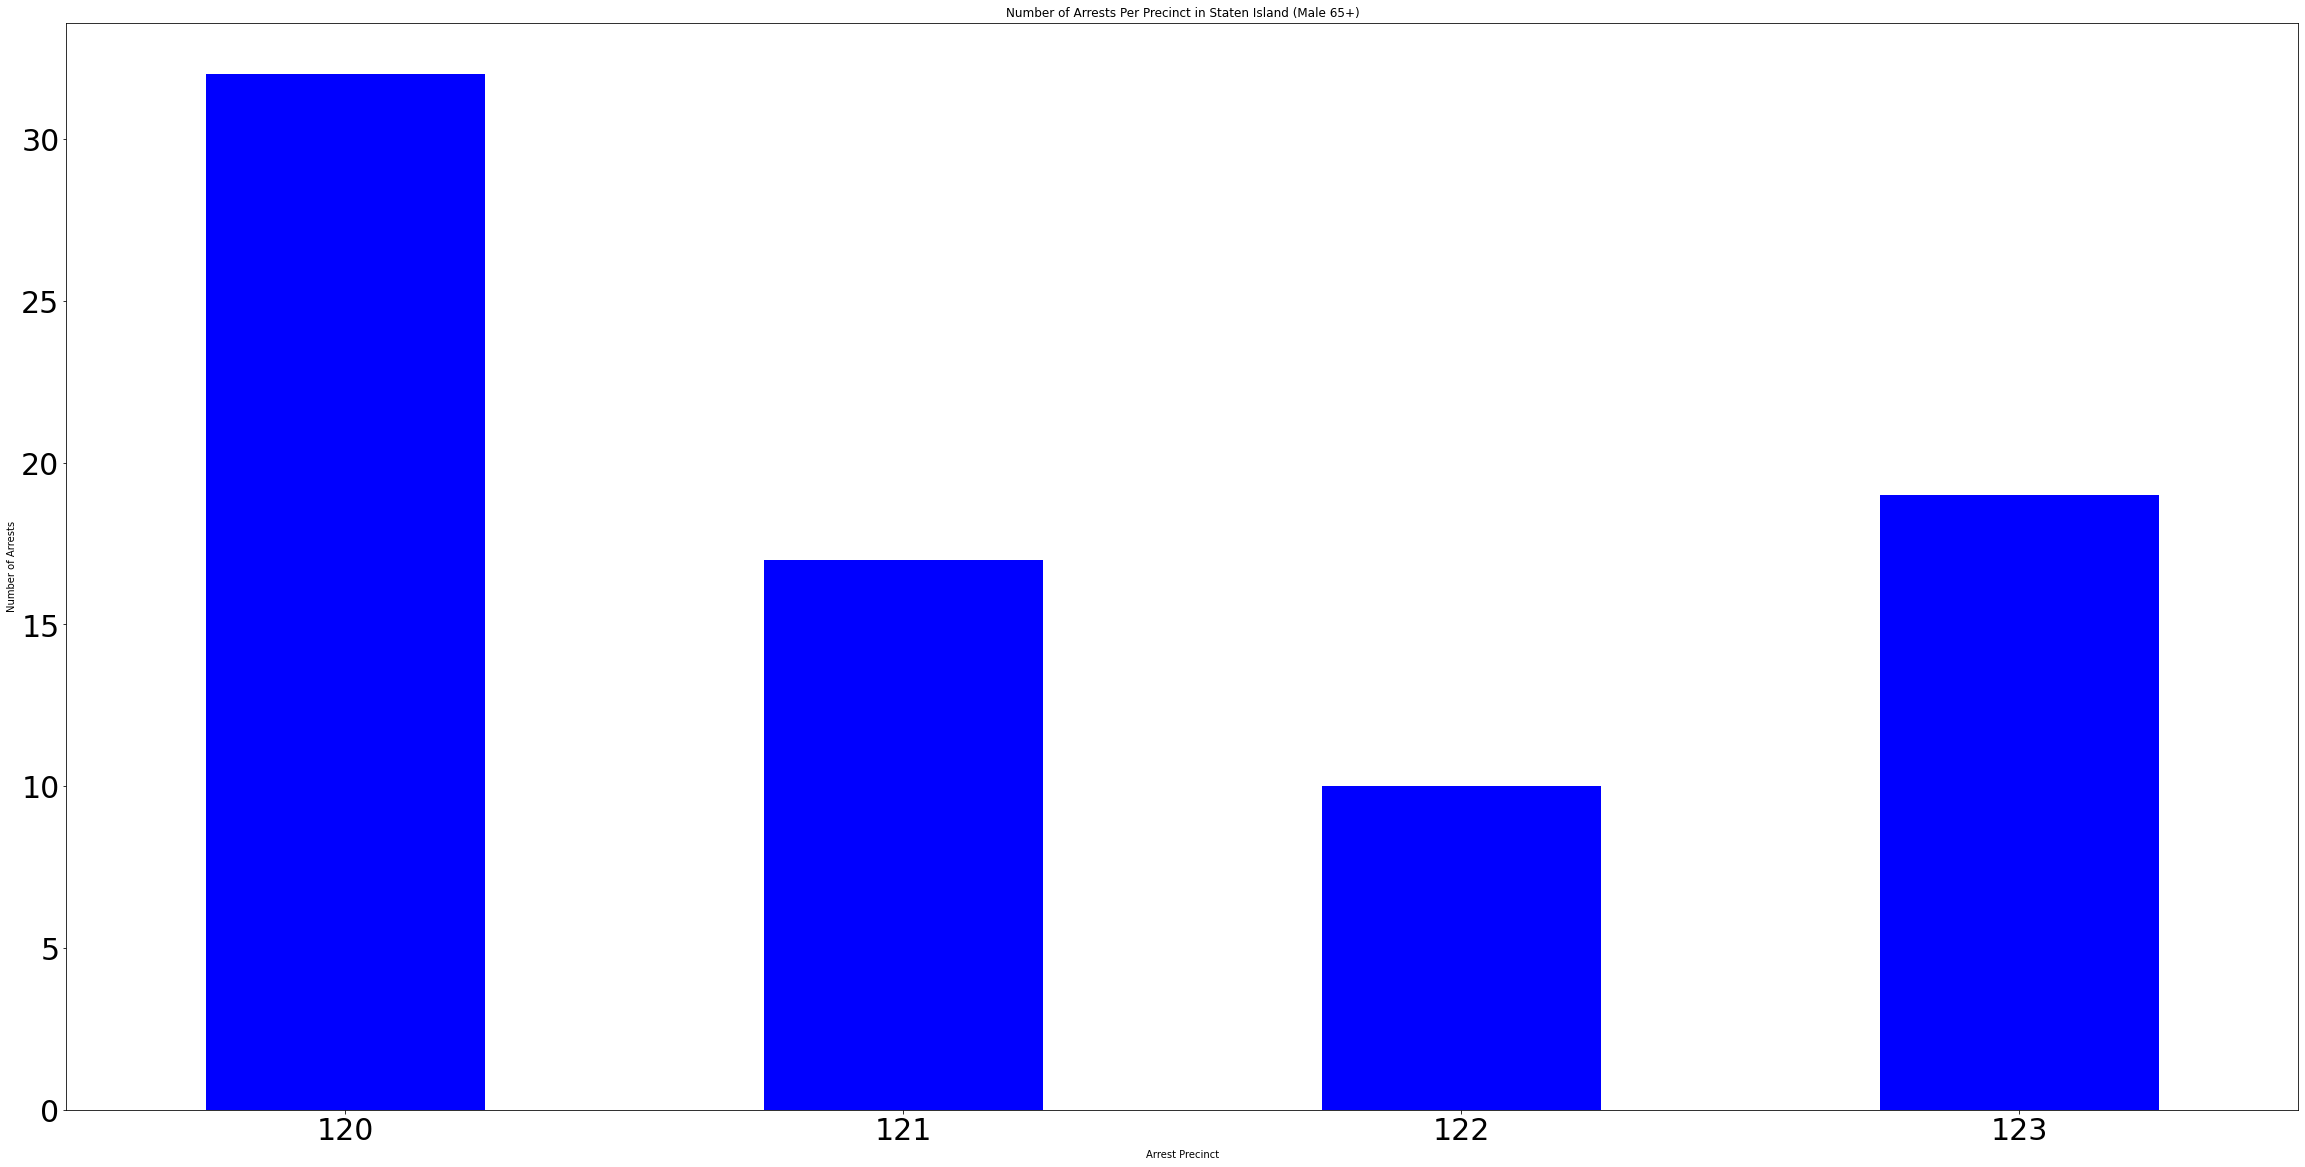

In [47]:
G_M_S_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Staten Island (Male 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct (Female 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

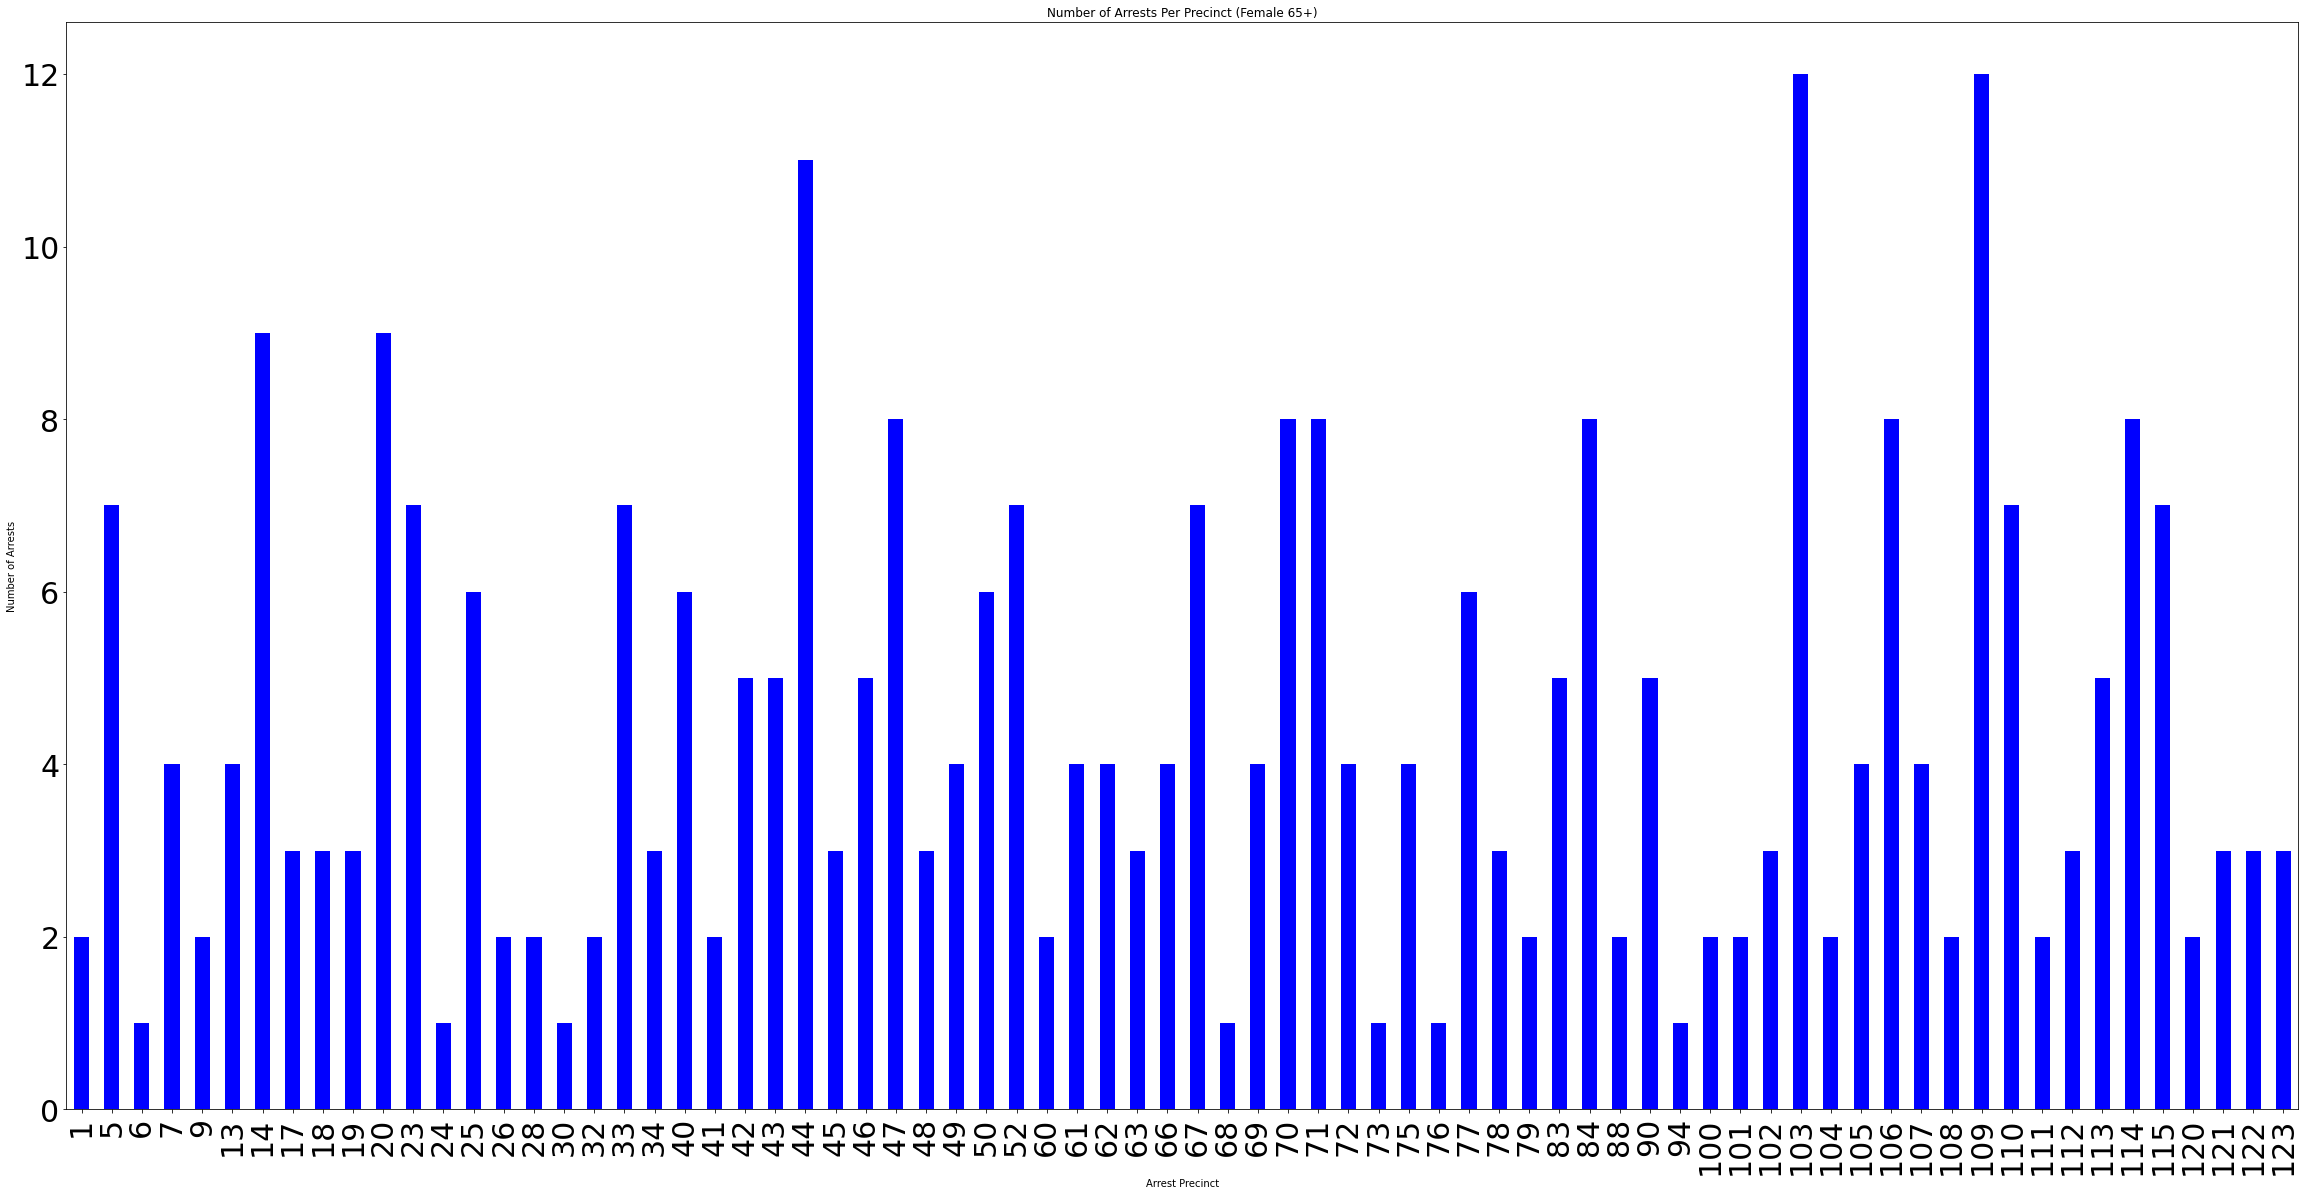

In [48]:
G_F_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct (Female 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 90
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Manhattan (Female 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

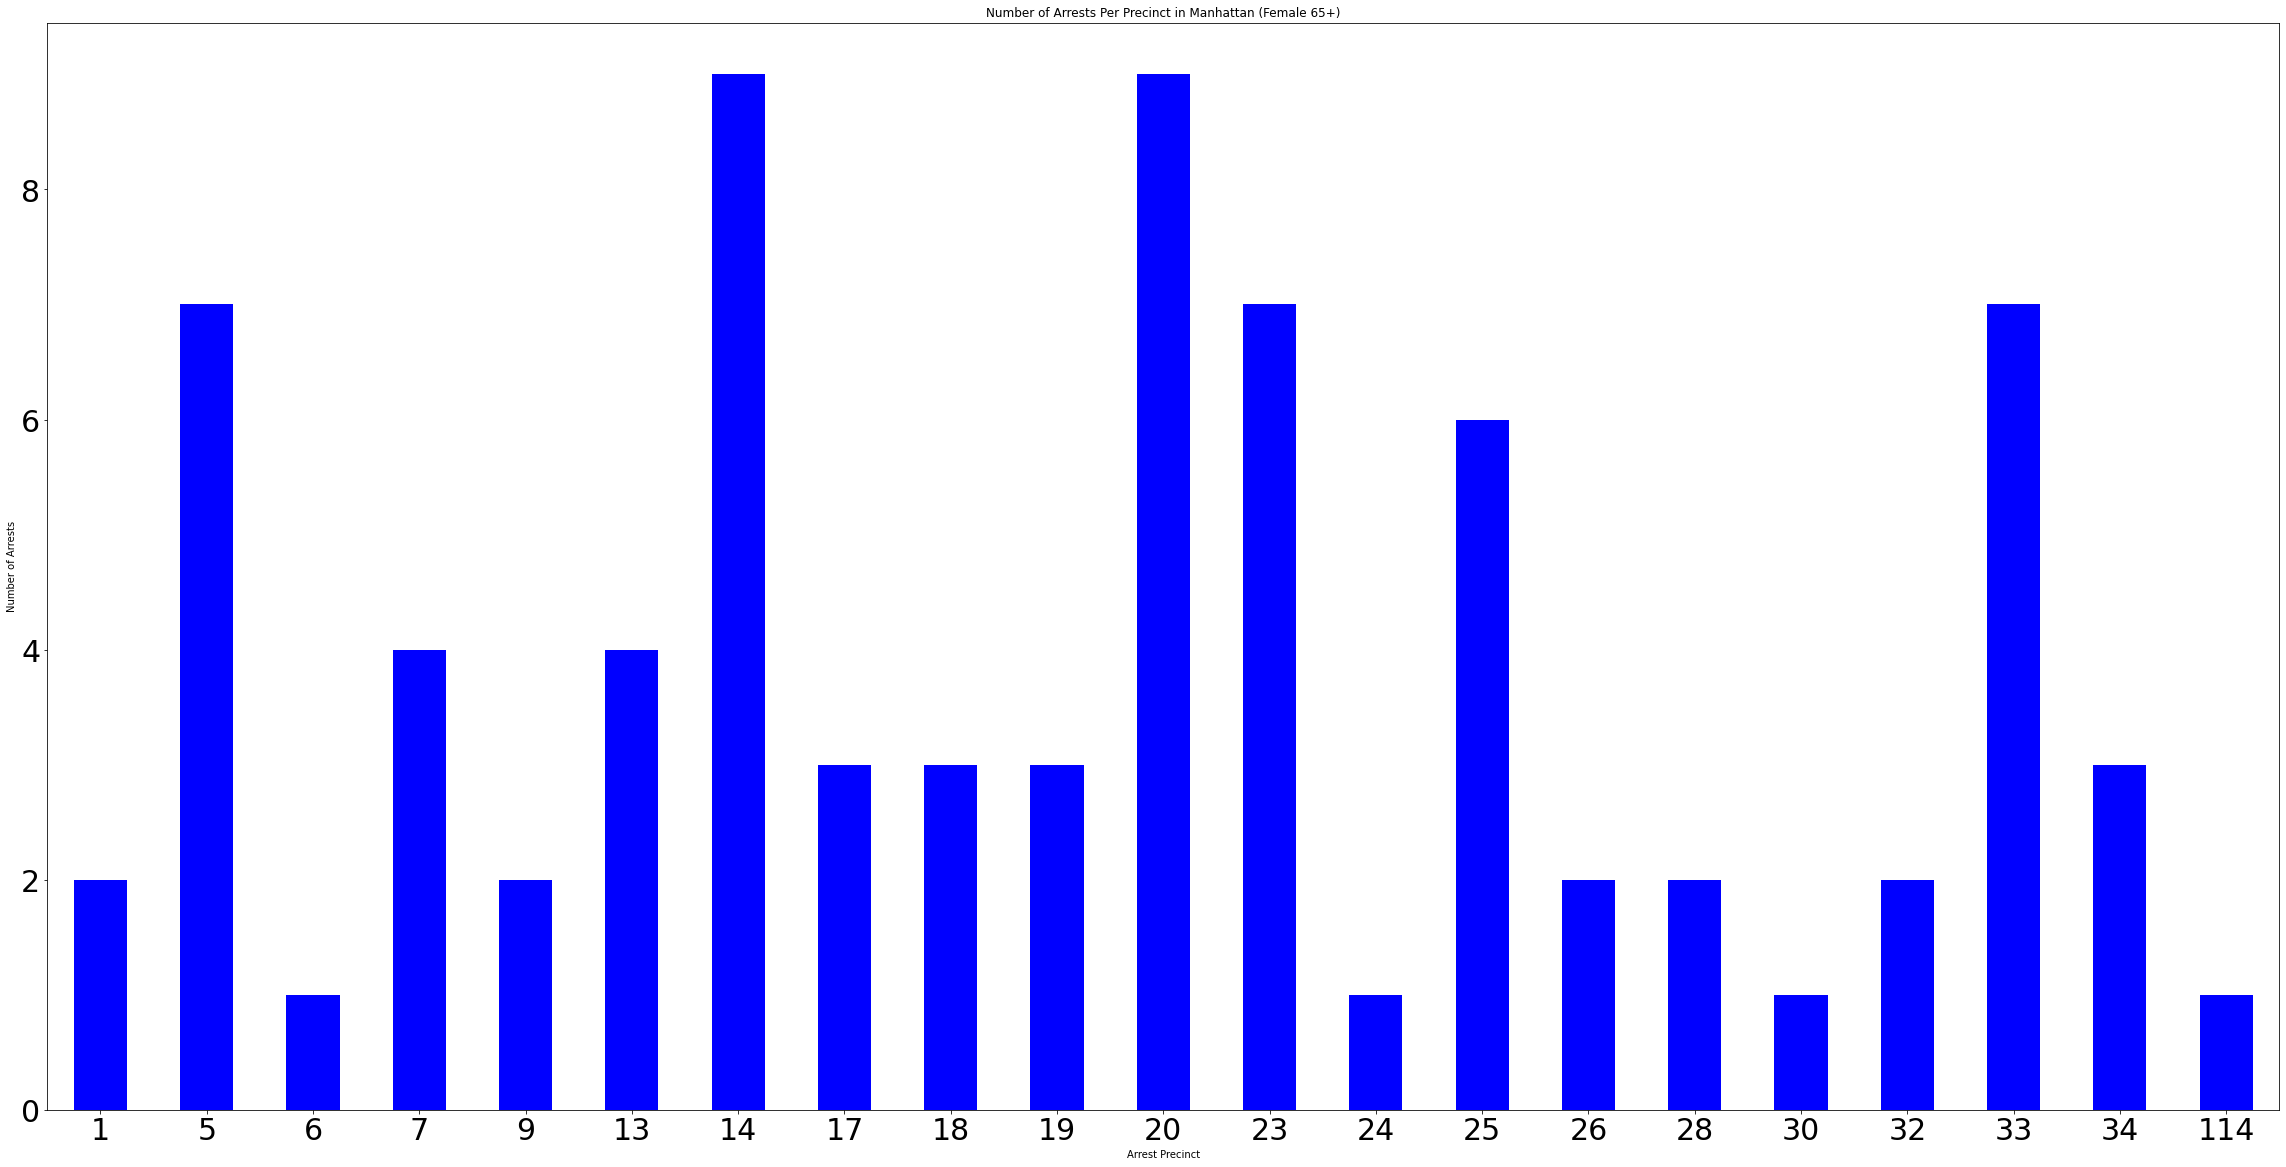

In [49]:
G_F_Ma_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Manhattan (Female 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in the Bronx (Female 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

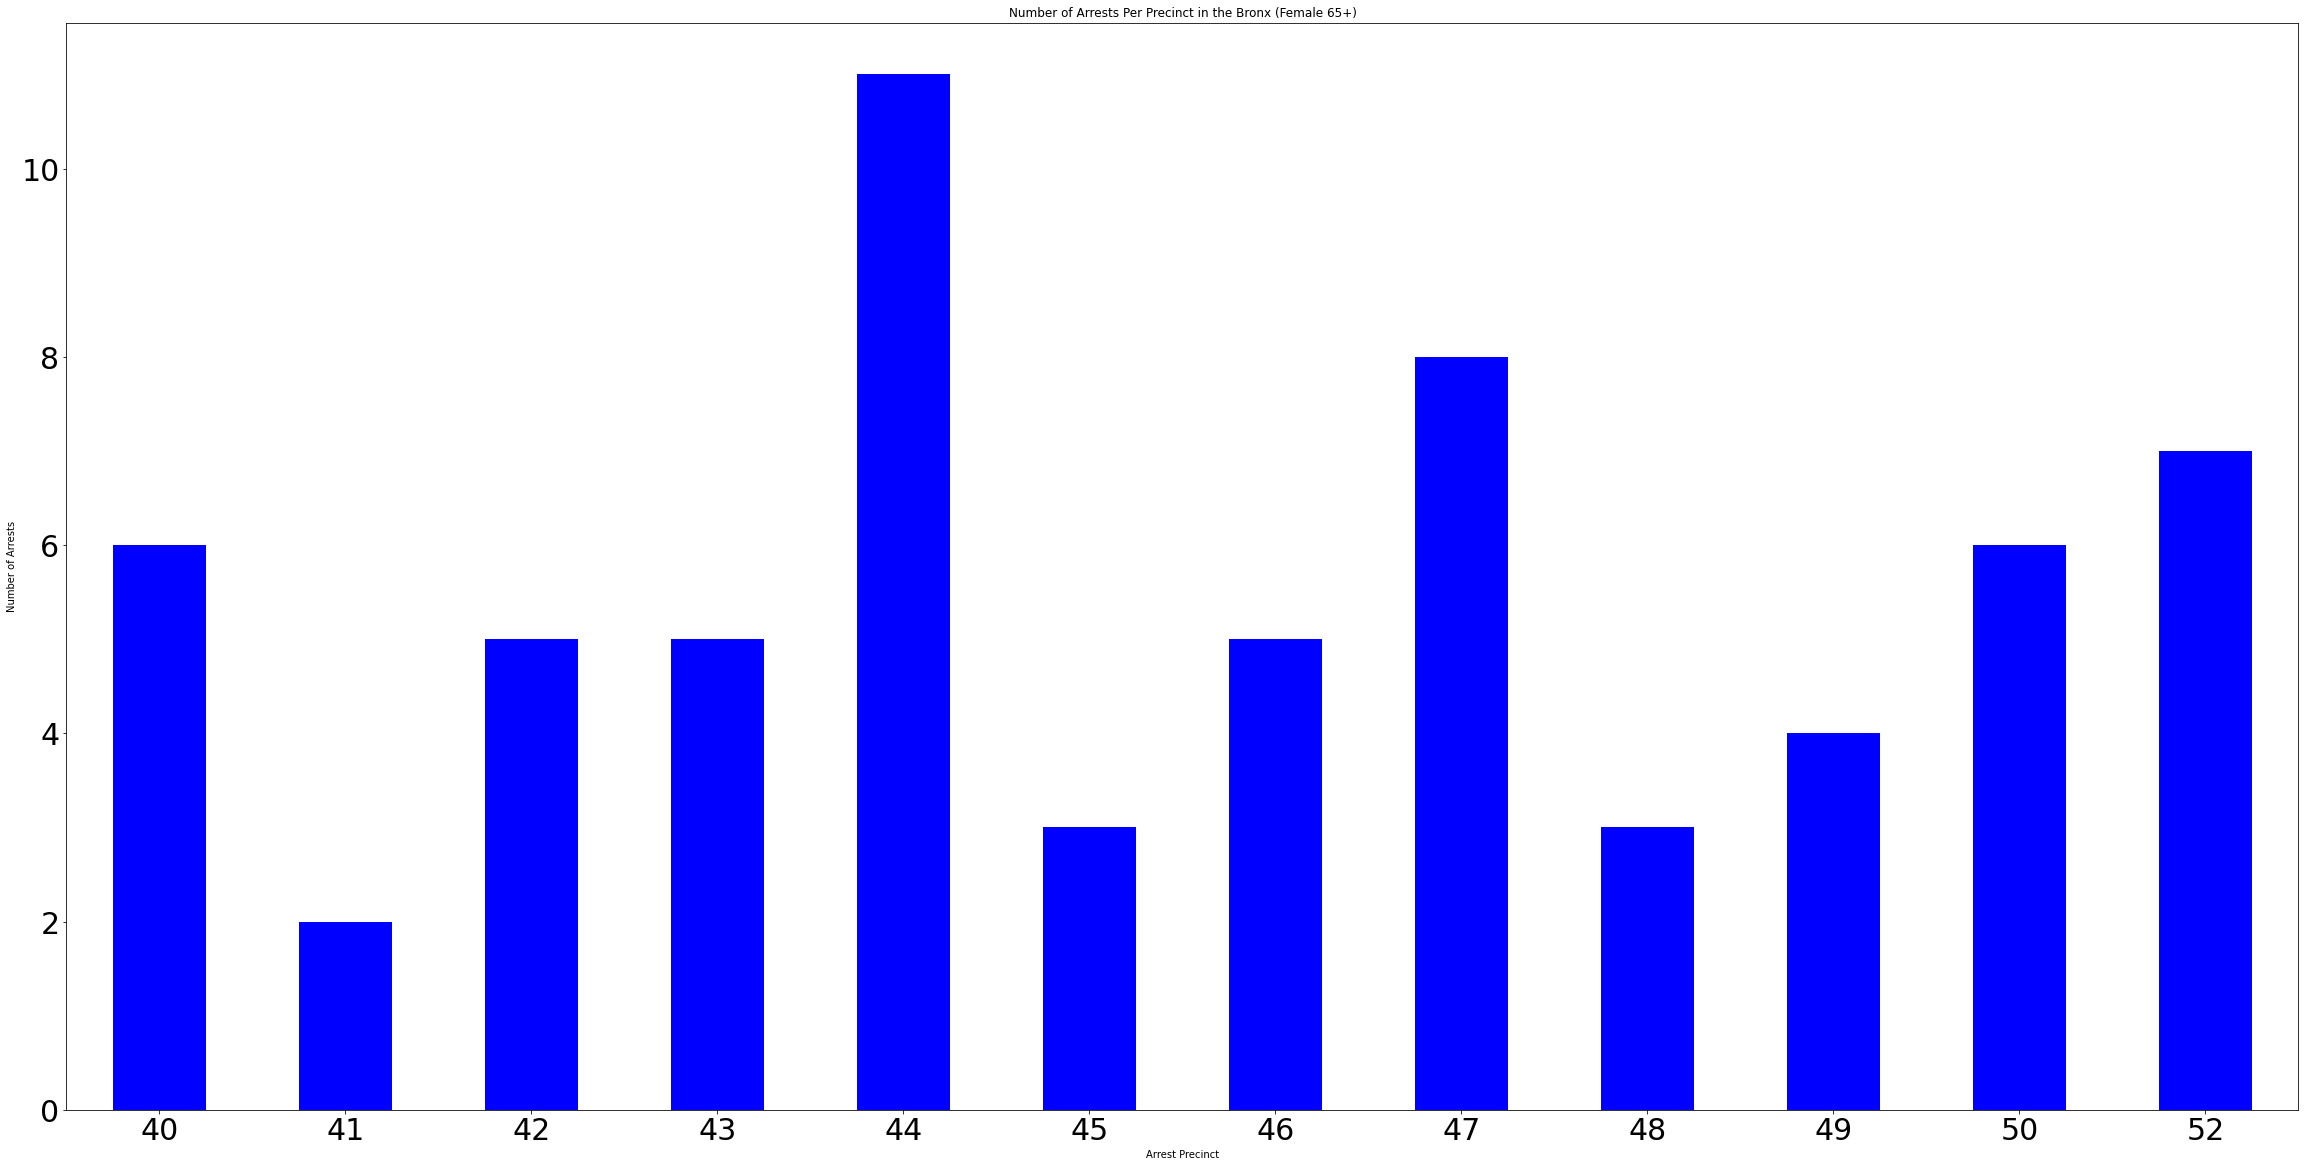

In [50]:
G_F_BX_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in the Bronx (Female 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Brooklyn (Female 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

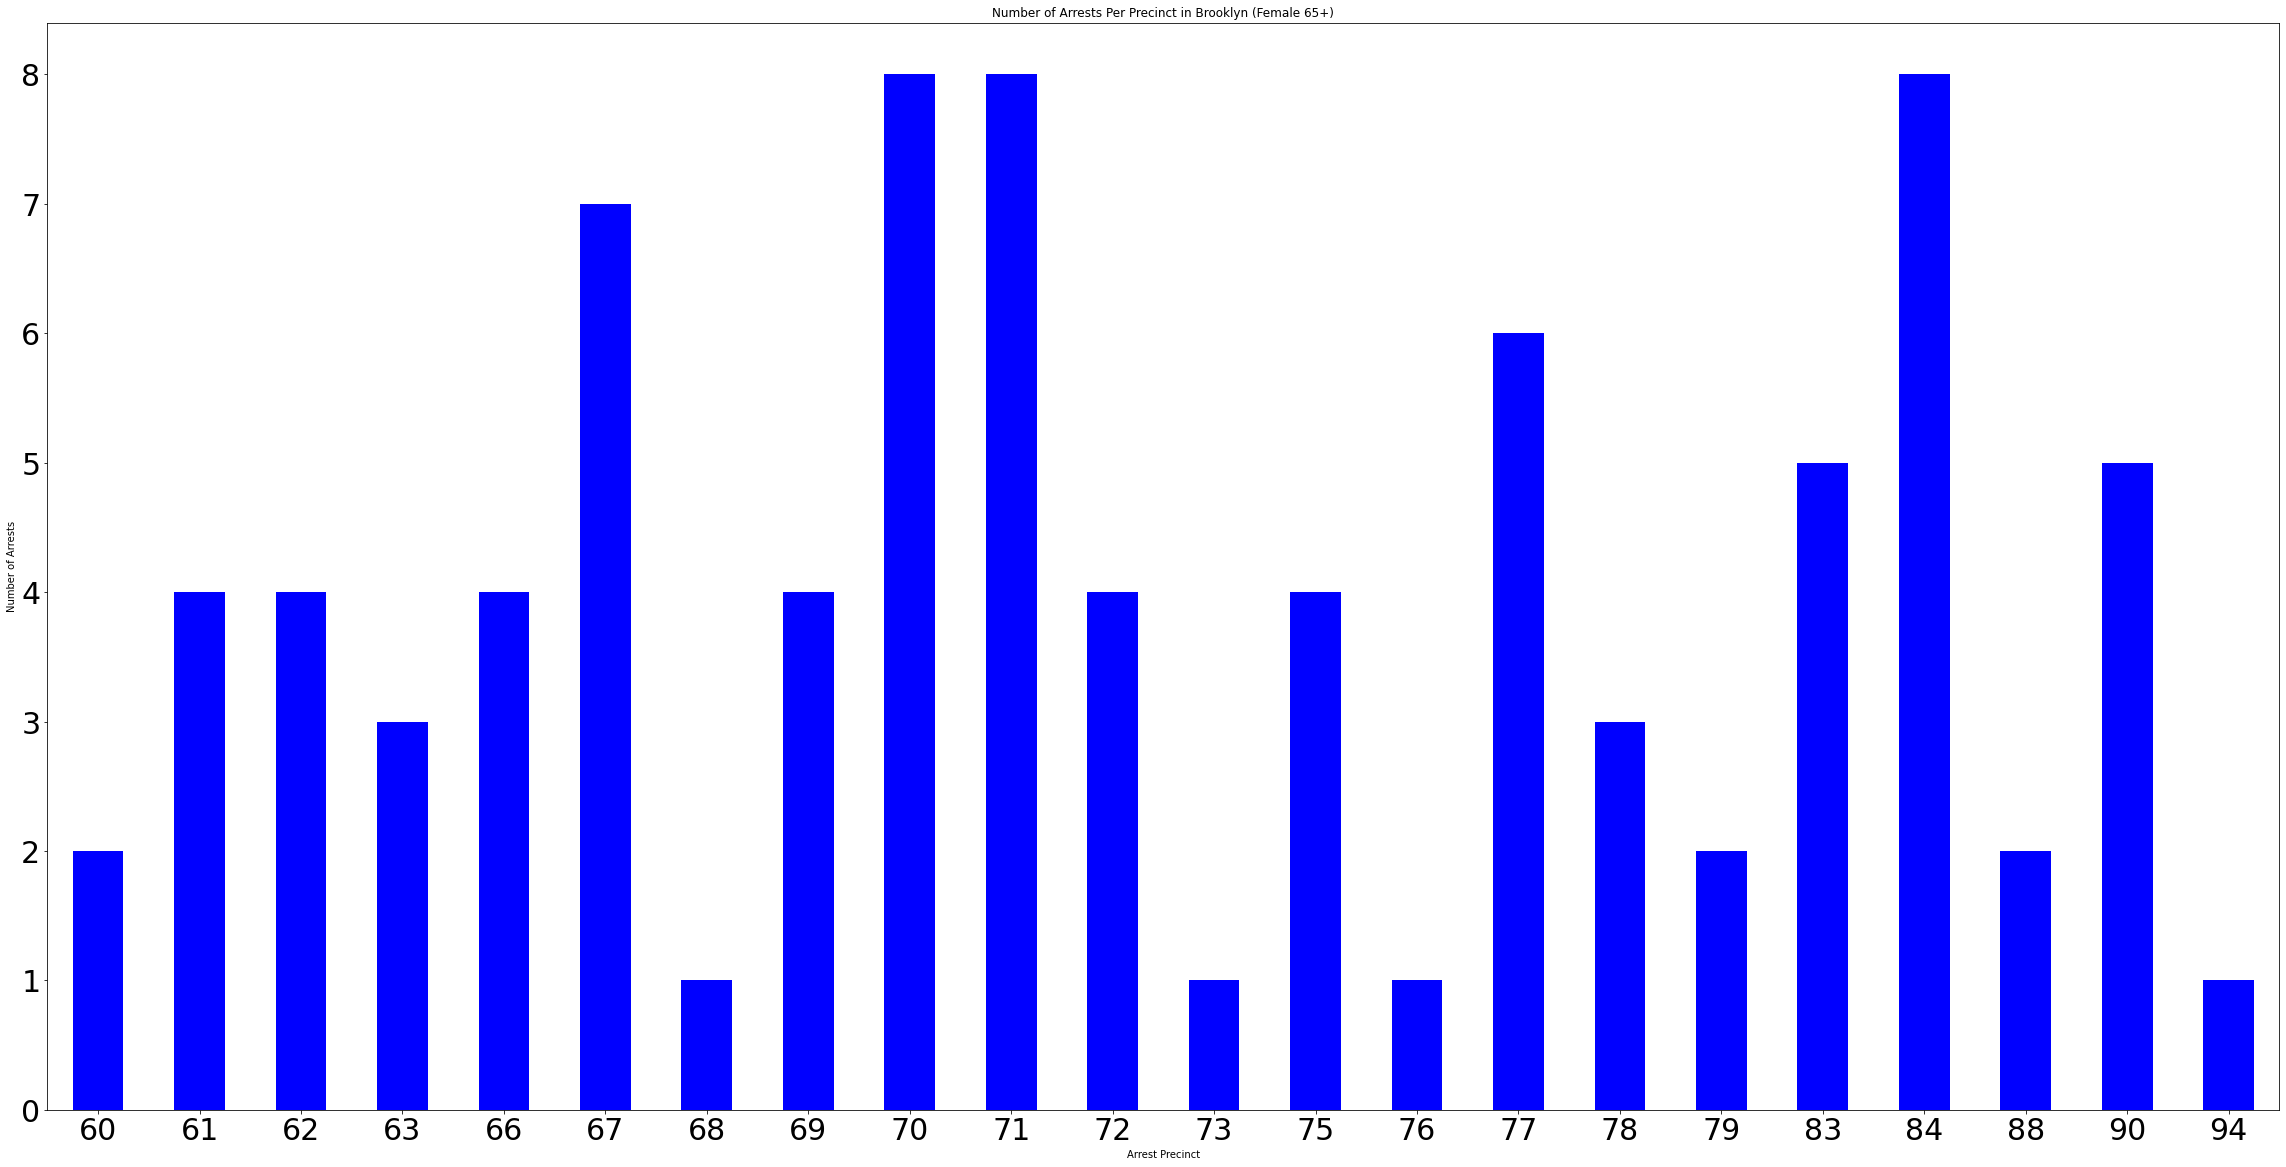

In [51]:
G_F_BK_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Brooklyn (Female 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Queens (Female 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

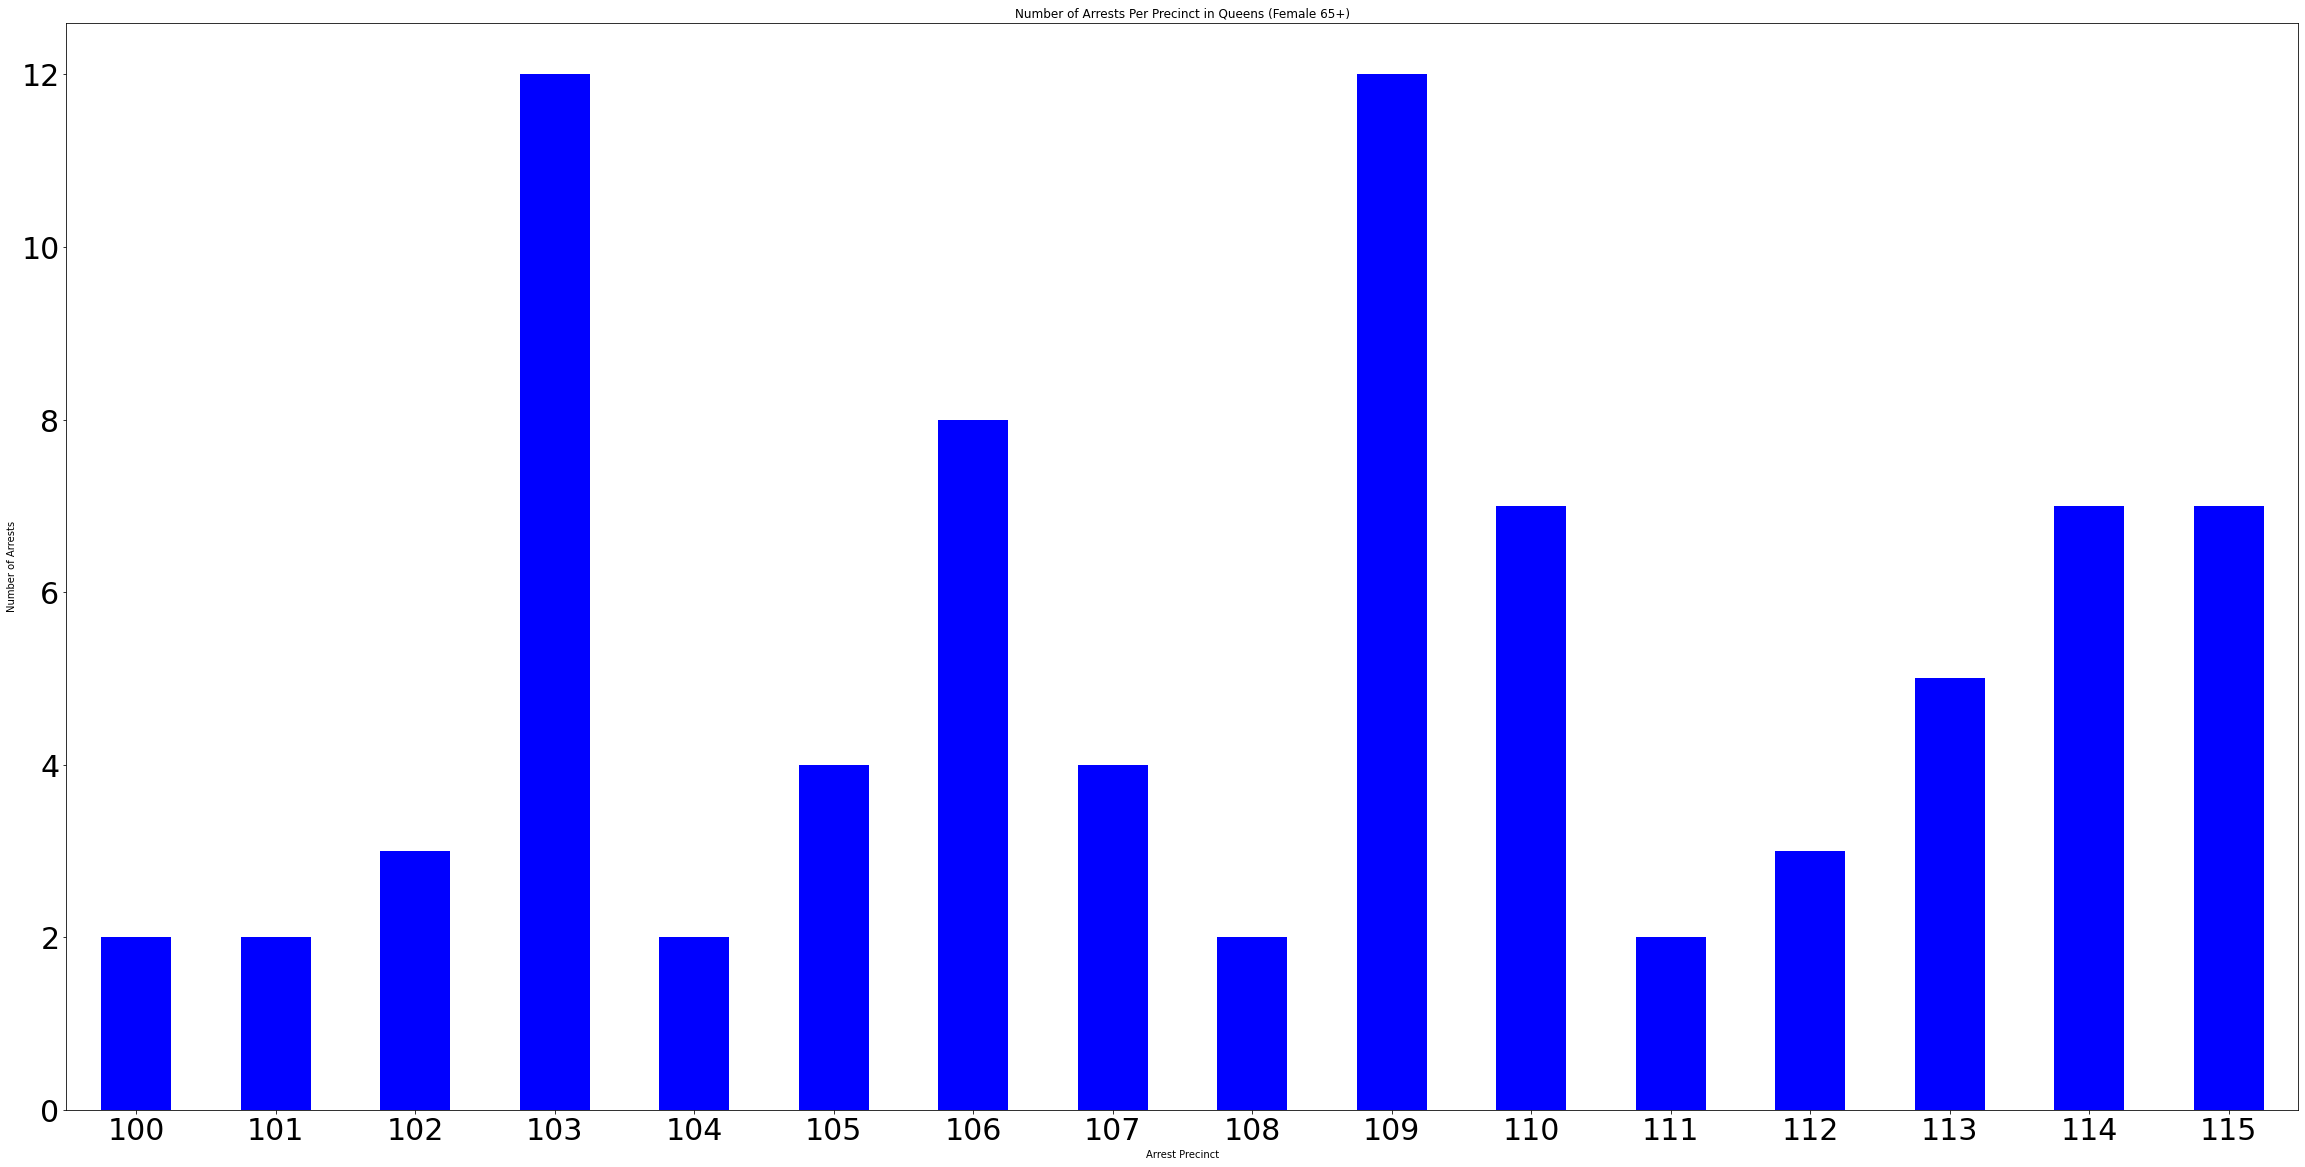

In [52]:
G_F_Q_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Queens (Female 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

<AxesSubplot:title={'center':'Number of Arrests Per Precinct in Staten Island (Female 65+)'}, xlabel='Arrest Precinct', ylabel='Number of Arrests'>

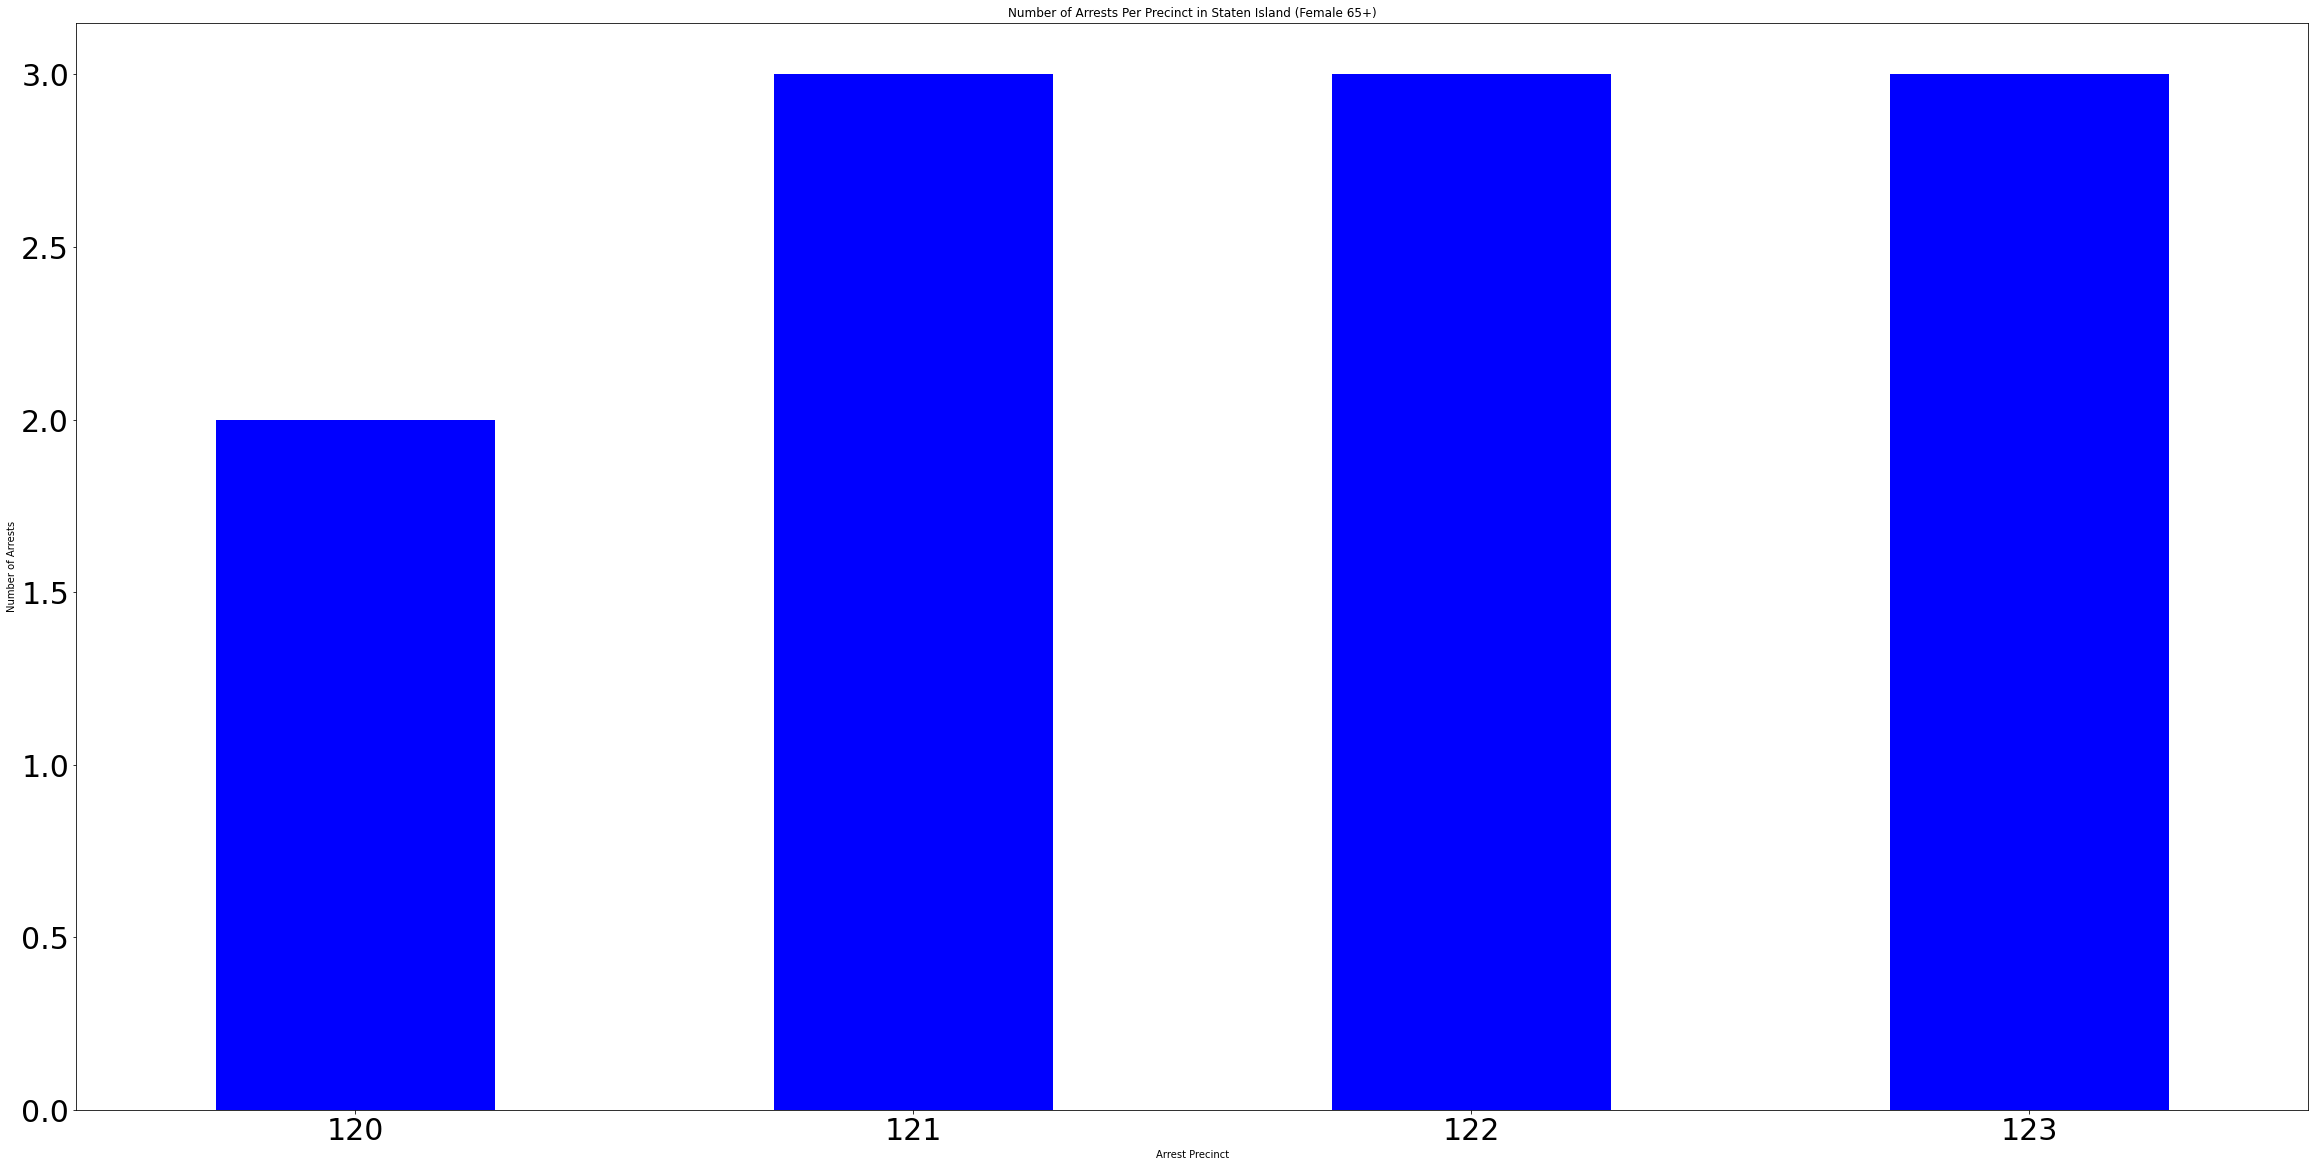

In [53]:
G_F_S_AP_Count_Dropped.plot.bar(ylabel= 'Number of Arrests', 
                                    title= 'Number of Arrests Per Precinct in Staten Island (Female 65+)',
                                   legend = False,
                                   color = 'blue',
                                figsize= (40,20),
                                fontsize= 30,
                                 rot = 0
                                )

In [92]:
#Make the same graphs but minus Gender specific
Y_Adult = df[(df['Age Group'] == '18-24')]
Y_Adult = Y_Adult.dropna()
TF_Adult = df[(df['Age Group'] == '25-44')]
TF_Adult = TF_Adult.dropna()
O_Adult = df[(df['Age Group'] == '45-64')]
O_Adult = O_Adult.dropna()
G_Adult = df[(df['Age Group'] == '65+')]
G_Adult = G_Adult.dropna()

#(Y)oung (A)dult (Ma)nhattan BX= Bronx BK= Brooklyn Q= Queens S= Staten Island
Y_A_Ma = Y_Adult[(Y_Adult['Arrest Borough'] == 'Manhattan')]
Y_A_BX = Y_Adult[(Y_Adult['Arrest Borough'] == 'Bronx')]
Y_A_BK = Y_Adult[(Y_Adult['Arrest Borough'] == 'Brooklyn')]
Y_A_Q = Y_Adult[(Y_Adult['Arrest Borough'] == 'Queens')]
Y_A_S = Y_Adult[(Y_Adult['Arrest Borough'] == 'Staten Island')]

#(T)wenty (F)ive (A)dult (Ma)nhattan BX= Bronx BK= Brooklyn Q= Queens S= Staten Island
TF_A_Ma = TF_Adult[(TF_Adult['Arrest Borough'] == 'Manhattan')]
TF_A_BX = TF_Adult[(TF_Adult['Arrest Borough'] == 'Bronx')]
TF_A_BK = TF_Adult[(TF_Adult['Arrest Borough'] == 'Brooklyn')]
TF_A_Q = TF_Adult[(TF_Adult['Arrest Borough'] == 'Queens')]
TF_A_S = TF_Adult[(TF_Adult['Arrest Borough'] == 'Staten Island')]

#(O)lder (A)dult (Ma)nhattan BX= Bronx BK= Brooklyn Q= Queens S= Staten Island
O_A_Ma = O_Adult[(O_Adult['Arrest Borough'] == 'Manhattan')]
O_A_BX = O_Adult[(O_Adult['Arrest Borough'] == 'Bronx')]
O_A_BK = O_Adult[(O_Adult['Arrest Borough'] == 'Brooklyn')]
O_A_Q = O_Adult[(O_Adult['Arrest Borough'] == 'Queens')]
O_A_S = O_Adult[(O_Adult['Arrest Borough'] == 'Staten Island')]

#(G)rand (A)dult (Ma)nhattan BX= Bronx BK= Brooklyn Q= Queens S= Staten Island
G_A_Ma = G_Adult[(G_Adult['Arrest Borough'] == 'Manhattan')]
G_A_BX = G_Adult[(G_Adult['Arrest Borough'] == 'Bronx')]
G_A_BK = G_Adult[(G_Adult['Arrest Borough'] == 'Brooklyn')]
G_A_Q = G_Adult[(G_Adult['Arrest Borough'] == 'Queens')]
G_A_S = G_Adult[(G_Adult['Arrest Borough'] == 'Staten Island')]
#Number of arrests per precinct
G_A_Ma_AP_Count = G_A_Ma.groupby('Arrest Precinct').count()
G_A_BX_AP_Count = G_A_BX.groupby('Arrest Precinct').count()
G_A_BK_AP_Count = G_A_BK.groupby('Arrest Precinct').count()
G_A_Q_AP_Count = G_A_Q.groupby('Arrest Precinct').count()
G_A_S_AP_Count = G_A_S.groupby('Arrest Precinct').count()

<AxesSubplot:xlabel='Latitude', ylabel='Longitude'>

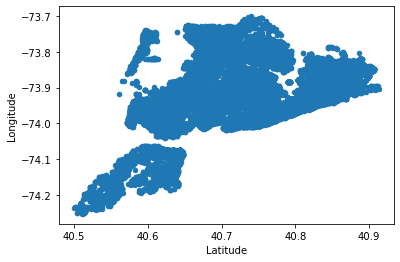

In [55]:
df.plot.scatter('Latitude', 'Longitude', by = 'Law Category CD')

In [60]:
import hvplot.pandas

hvexplorer = hvplot.explorer(df)
hvexplorer

hvDataFrameExplorer(axes=Axes(explorer=..., height=None, legend='right', logx=False, logy=False, name='Axes01969', responsive=False, shared_axes=True, width=None, xlim=None, ylim=None), by=[], colormapping=Colormapping(clim=None, cmap='kbc_r', cnorm='linear', color=None, colorbar=None, explorer=..., name='Colormapping01999', rescale_discrete_levels=True, symmetric=False), groupby=[], kind='line', labels=Labels(clabel='', explorer=..., fontscale=1, name='Labels02020', rot=0, title='', xlabel='', ylabel=''), name='hvDataFrameExplorer01954', operations=Operations(aggregator=None, datashade=False, dynspread=False, explorer=..., name='Operations02040', rasterize=False, x_sampling=None, y_sampling=None), style=Style(alpha=1, explorer=..., name='Style02060'), x='index', y='Arrest Number', y_multi=[], z=None)

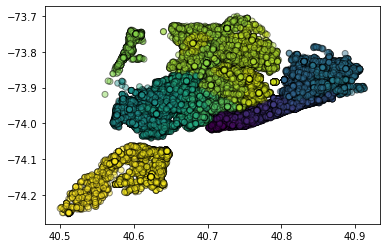

In [102]:
x_axis = df['Latitude']
y_axis = df['Longitude']
by = df['Arrest Precinct']
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", c = by, alpha=0.45)

In [78]:
precinct_count_severity_Ma = df[(df['Arrest Precinct'] == 'Manhattan' )]
precinct_count_severity_BX = df[(df['Arrest Precinct'] == 'Bronx' )]
precinct_count_severity_BK = df[(df['Arrest Precinct'] == 'Brooklyn' )]
precinct_count_severity_Q = df[(df['Arrest Precinct'] == 'Queens' )]
precinct_count_severity_S = df[(df['Arrest Precinct'] == 'Staten Island' )]


In [89]:
df['Gender'] = df['Gender'].replace(['M', 'F'],[1, 2])

<AxesSubplot:xlabel='Arrest Precinct'>

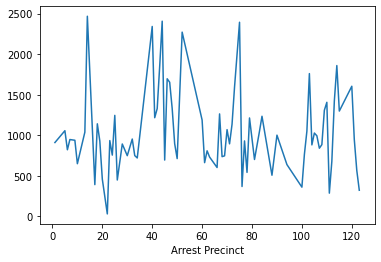

In [100]:
TF_Adult_PRECINCT_COUNT = TF_Adult.groupby('Arrest Precinct').count()


TF_Adult_PRECINCT_COUNT.plot.line(y = 'Arrest Number',legend = False)

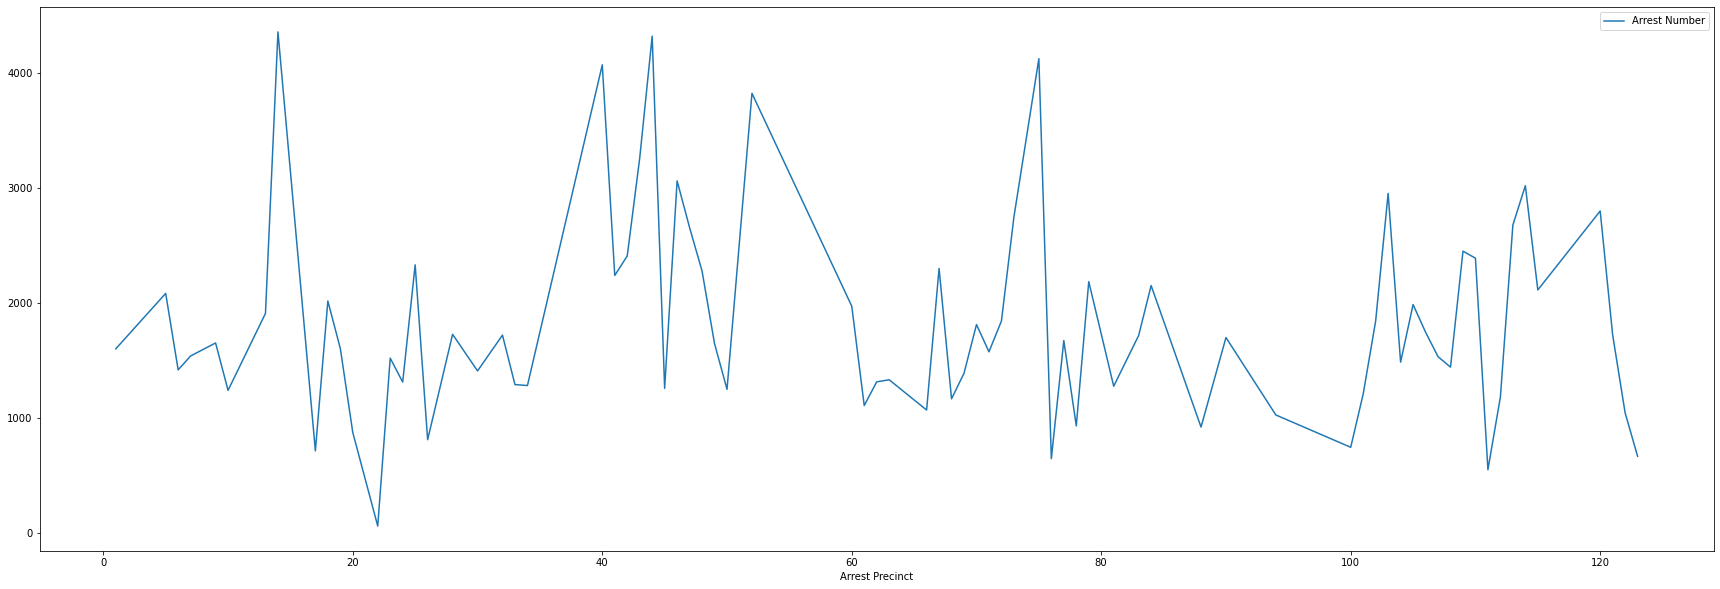

In [218]:
all_age_precinct_count = df.groupby('Arrest Precinct').count()
all_age_borough = df.groupby('Arrest Borough').count()
all_age_precinct_count = all_age_precinct_count[['Arrest Number']]
all_age_borough = all_age_borough[['Arrest Number']]
all_age_precinct_count.plot.line( figsize = (30,10))

plt.savefig('Precinct arrest Count.png')

In [112]:
df

Arrest Number Arrest Date  Offense Code  \
0           238942621  01/10/2022         101.0   
1           238980679  01/11/2022         244.0   
2           239553009  01/23/2022         464.0   
3           239651234  01/25/2022         153.0   
4           241524225  03/03/2022         157.0   
...               ...         ...           ...   
140559      251412120  09/21/2022         114.0   
140560      249578318  08/15/2022         105.0   
140561      247641284  07/06/2022         339.0   
140562      251006627  09/13/2022         508.0   
140563      248124580  07/16/2022         847.0   

                 Offense Description 1  KY number  \
0                            ASSAULT 3      344.0   
1        BURGLARY,UNCLASSIFIED,UNKNOWN      107.0   
2                             JOSTLING      230.0   
3                               RAPE 3      104.0   
4                               RAPE 1      104.0   
...                                ...        ...   
140559             OBSTR BREATH/CIRCUL      344.0   
140560               STRANGULATION 1ST      106.0   
140561  LARCENY,PETIT FROM OPEN AREAS,      341.0   
140562  DRUG PARAPHERNALIA,   POSSESSE      235.0   
140563  NY STATE LAWS,UNCLASSIFIED FEL      125.0   

               Offense Description 2    Law Code Law Category CD  \
0       ASSAULT 3 & RELATED OFFENSES  PL 1200001               3   
1                           BURGLARY  PL 1402000               1   
2                           JOSTLING  PL 1652501               3   
3                               RAPE  PL 1302503               1   
4                               RAPE  PL 1303501               1   
...                              ...         ...             ...   
140559  ASSAULT 3 & RELATED OFFENSES  PL 1211100               3   
140560                FELONY ASSAULT  PL 1211200               1   
140561                 PETIT LARCENY  PL 1552500               3   
140562               DANGEROUS DRUGS  PL 2205001               3   
140563  NYS LAWS-UNCLASSIFIED FELONY  VTL05110FE               1   

       Arrest Borough  Arrest Precinct  Jurisdiction Code Age Group Gender  \
0           Manhattan                9                  0     18-24      1   
1              Queens              101                  0     25-44      1   
2              Queens              110                  1     25-44      1   
3            Brooklyn               71                  0     25-44      1   
4            Brooklyn               84                  0     18-24      1   
...               ...              ...                ...       ...    ...   
140559          Bronx               41                  0     25-44      1   
140560       Brooklyn               70                  0     25-44      1   
140561       Brooklyn               78                  0     45-64      1   
140562          Bronx               43                  0     25-44      2   
140563      Manhattan               32                  0     45-64      1   

             Ethnicity  X Coordinate  Y Coordinate   Latitude  Longitude  \
0                WHITE        987058        203626  40.725583 -73.989869   
1                WHITE       1052353        159425  40.604001 -73.754742   
2                BLACK       1027679        214505  40.755336 -73.843245   
3                BLACK        998742        181235  40.664121 -73.947765   
4                BLACK        988902        192641  40.695439 -73.983225   
...                ...           ...           ...        ...        ...   
140559  WHITE HISPANIC       1013096        236605  40.816057 -73.895785   
140560           BLACK        991549        169019  40.630600 -73.973705   
140561           BLACK        990420        188642  40.684454 -73.977750   
140562           BLACK       1019464        241704  40.830027 -73.872754   
140563  WHITE HISPANIC       1001611        241370  40.829163 -73.937267   

                                          Geocoded  
0                 POINT (-73.98986919 

In [145]:
cleaned_df = df[['Arrest Date', 
                 'Offense Description 2', 
                 'Law Category CD', 
                 'Arrest Borough', 
                 'Arrest Precinct',
                'Age Group',
                'Gender',
                'Geocoded']]

In [127]:
cleaned_df.plot.scatter(x = '', y = )

Arrest Date           Offense Description 1 Law Category CD  \
0       01/10/2022                       ASSAULT 3               3   
1       01/11/2022   BURGLARY,UNCLASSIFIED,UNKNOWN               1   
2       01/23/2022                        JOSTLING               3   
3       01/25/2022                          RAPE 3               1   
4       03/03/2022                          RAPE 1               1   
...            ...                             ...             ...   
140559  09/21/2022             OBSTR BREATH/CIRCUL               3   
140560  08/15/2022               STRANGULATION 1ST               1   
140561  07/06/2022  LARCENY,PETIT FROM OPEN AREAS,               3   
140562  09/13/2022  DRUG PARAPHERNALIA,   POSSESSE               3   
140563  07/16/2022  NY STATE LAWS,UNCLASSIFIED FEL               1   

       Arrest Borough  Arrest Precinct Age Group Gender  \
0           Manhattan                9     18-24      1   
1              Queens              101     25-44      1   
2              Queens              110     25-44      1   
3            Brooklyn               71     25-44      1   
4            Brooklyn               84     18-24      1   
...               ...              ...       ...    ...   
140559          Bronx               41     25-44      1   
140560       Brooklyn               70     25-44      1   
140561       Brooklyn               78     45-64      1   
140562          Bronx               43     25-44      2   
140563      Manhattan               32     45-64      1   

                                          Geocoded  
0                 POINT (-73.98986919 40.72558254)  
1                     POINT (-73.754742 40.604001)  
2                 POINT (-73.84324519 40.75533648)  
3        POINT (-73.9477648403751 40.664121282631)  
4       POINT (-73.9832253756043 40.6954388081238)  
...                                            ...  
140559                POINT (-73.895785 40.816057)  
140560  POINT (-73.9737053160275 40.6305998504358)  
140561                 POINT (-73.97775 40.684454)  
140562            POINT (-73.87275417 40.83002685)  
140563            POINT (-73.93726683 40.82916325)  

[140564 rows x 8 columns]

In [120]:
cleaned_df

Arrest Date           Offense Description 1 Law Category CD  \
0       01/10/2022                       ASSAULT 3               3   
1       01/11/2022   BURGLARY,UNCLASSIFIED,UNKNOWN               1   
2       01/23/2022                        JOSTLING               3   
3       01/25/2022                          RAPE 3               1   
4       03/03/2022                          RAPE 1               1   
...            ...                             ...             ...   
140559  09/21/2022             OBSTR BREATH/CIRCUL               3   
140560  08/15/2022               STRANGULATION 1ST               1   
140561  07/06/2022  LARCENY,PETIT FROM OPEN AREAS,               3   
140562  09/13/2022  DRUG PARAPHERNALIA,   POSSESSE               3   
140563  07/16/2022  NY STATE LAWS,UNCLASSIFIED FEL               1   

       Arrest Borough  Arrest Precinct Age Group Gender  \
0           Manhattan                9     18-24      1   
1              Queens              101     25-44      1   
2              Queens              110     25-44      1   
3            Brooklyn               71     25-44      1   
4            Brooklyn               84     18-24      1   
...               ...              ...       ...    ...   
140559          Bronx               41     25-44      1   
140560       Brooklyn               70     25-44      1   
140561       Brooklyn               78     45-64      1   
140562          Bronx               43     25-44      2   
140563      Manhattan               32     45-64      1   

                                          Geocoded  
0                 POINT (-73.98986919 40.72558254)  
1                     POINT (-73.754742 40.604001)  
2                 POINT (-73.84324519 40.75533648)  
3        POINT (-73.9477648403751 40.664121282631)  
4       POINT (-73.9832253756043 40.6954388081238)  
...                                            ...  
140559                POINT (-73.895785 40.816057)  
140560  POINT (-73.9737053160275 40.6305998504358)  
140561                 POINT (-73.97775 40.684454)  
140562            POINT (-73.87275417 40.83002685)  
140563            POINT (-73.93726683 40.82916325)  

[140564 rows x 8 columns]

In [129]:
grandparents = df.loc[df['Age Group'] == '65+']
grandparents['Arrest Borough'].value_counts()
values = [573,530,510,380,90]
labels = ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

Manhattan        573
Brooklyn         530
Queens           510
Bronx            380
Staten Island     90
Name: Arrest Borough, dtype: int64

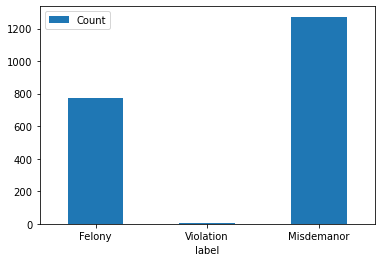

In [137]:
grandparents['Law Category CD'].value_counts()

grand_counts = []
grand_label = []

df3 = pd.DataFrame({'label':['Felony', 'Violation', 'Misdemanor'], 'Count':[772, 5, 1273]})
ax3 = df3.plot.bar(x='label', y='Count', rot=0, )


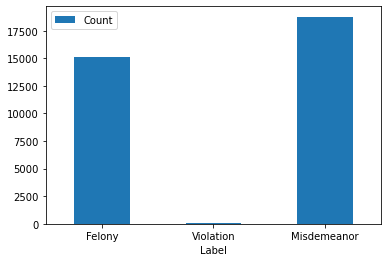

In [143]:
df4 = pd.DataFrame({'Label': ['Felony', 'Violation', 'Misdemeanor'], 'Count' : [15147, 86, 18771] })
ax4 = df4.plot.bar(x='Label', y='Count', rot=0, )

In [147]:
clean_manhattan = cleaned_df.loc[cleaned_df['Arrest Borough'] == 'Manhattan'].dropna()
clean_manhattan_felonies = clean_manhattan.loc[clean_manhattan['Law Category CD'] == '1']
clean_manhattan_felonies['Offense Description 2'].value_counts()



FELONY ASSAULT                     2752
GRAND LARCENY                      2665
ROBBERY                            1946
BURGLARY                           1906
MISCELLANEOUS PENAL LAW            1356
DANGEROUS DRUGS                    1210
CRIMINAL MISCHIEF & RELATED OF      830
DANGEROUS WEAPONS                   736
FORGERY                             491
MURDER & NON-NEGL. MANSLAUGHTE      286
POSSESSION OF STOLEN PROPERTY       285
SEX CRIMES                          139
GRAND LARCENY OF MOTOR VEHICLE      125
NYS LAWS-UNCLASSIFIED FELONY        122
RAPE                                100
ARSON                                38
INTOXICATED/IMPAIRED DRIVING         37
THEFT-FRAUD                          27
VEHICLE AND TRAFFIC LAWS             27
KIDNAPPING & RELATED OFFENSES        22
PROSTITUTION & RELATED OFFENSES      12
HOMICIDE-NEGLIGENT,UNCLASSIFIE        8
INTOXICATED & IMPAIRED DRIVING        6
OTHER STATE LAWS (NON PENAL LA        5
CANNABIS RELATED OFFENSES             4


In [142]:
clean_manhattan['Law Category CD'].value_counts()

3    18771
1    15147
2       86
I       60
9        8
Name: Law Category CD, dtype: int64

In [168]:

offense_manhattan = clean_manhattan_felonies['Offense'].value_counts().to_frame()

offense_manhattan = offense_manhattan.rename(columns={'': 'Offense', 'Offense': 'Count'})

In [166]:

clean_manhattan_felonies = clean_manhattan_felonies.rename(columns = {'Offense Description 2' : 'Offense'})

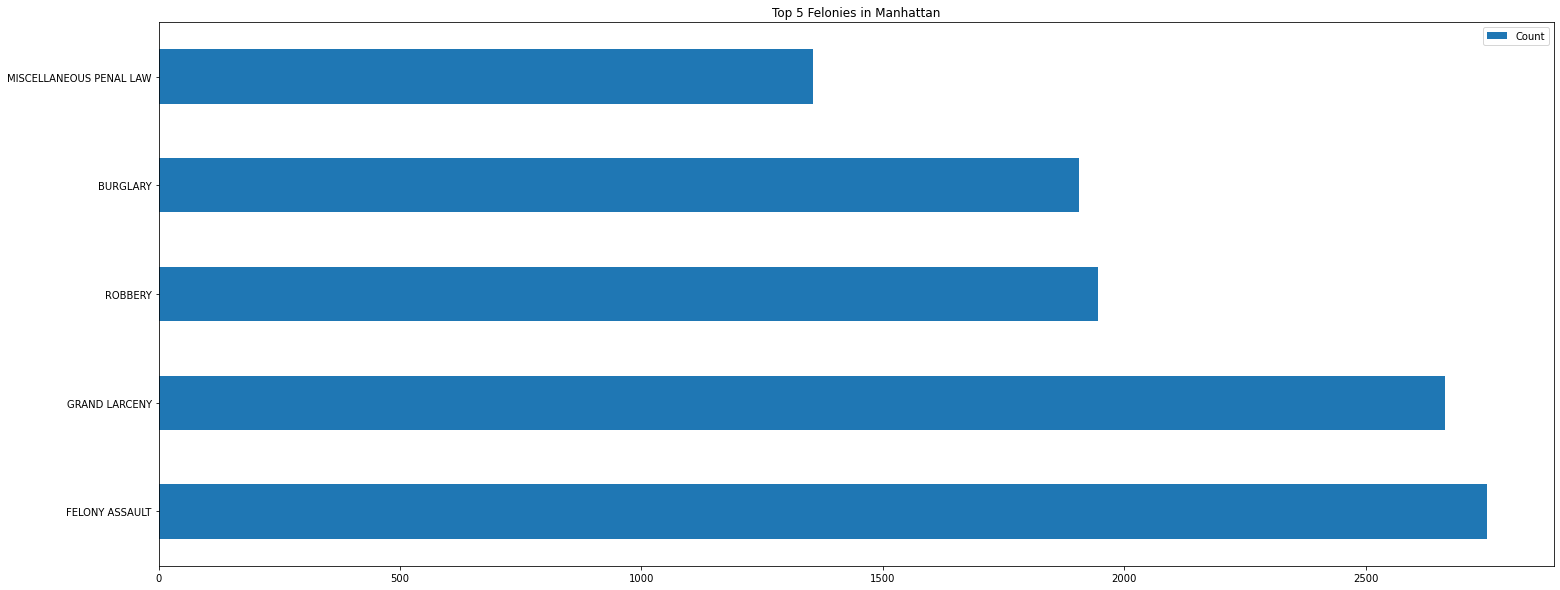

In [228]:
offense_manhattan = offense_manhattan.head(5)
offense_manhattan.plot.barh(figsize = (25,10)) 
plt.title('Top 5 Felonies in Manhattan')
plt.savefig("Manhattan Felonies.png")

In [180]:
clean_brooklyn = cleaned_df.loc[cleaned_df['Arrest Borough'] == 'Brooklyn'].dropna()
clean_brooklyn_felonies = clean_brooklyn.loc[clean_brooklyn['Law Category CD'] == '1']

offense_brooklyn = clean_brooklyn_felonies['Offense Description 2'].value_counts().to_frame().rename(columns = {'Offense Description 2': 'Count'})

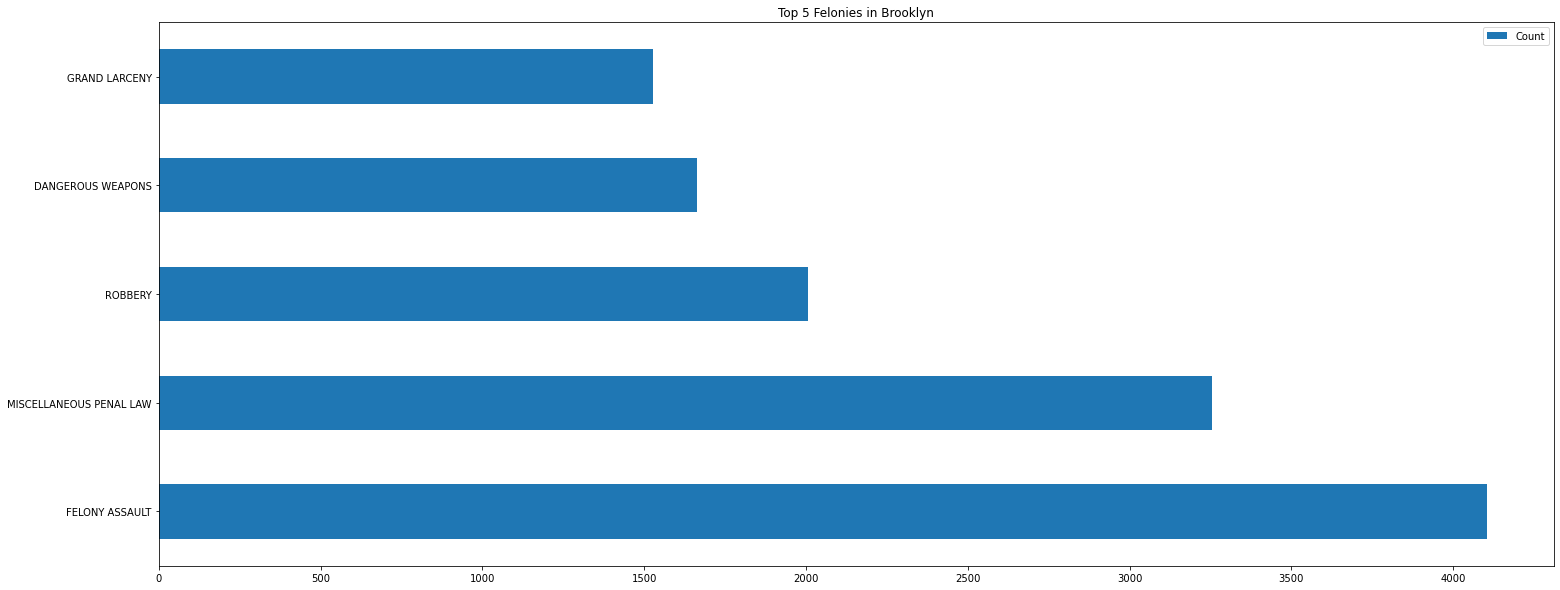

In [227]:
offense_brooklyn = offense_brooklyn.head(5)
offense_brooklyn.plot.barh(figsize = (25,10) )
plt.title('Top 5 Felonies in Brooklyn')
plt.savefig("Brooklyn Felonies.png")

In [189]:
clean_bronx = cleaned_df.loc[cleaned_df['Arrest Borough'] == 'Bronx'].dropna()
clean_bronx_felonies = clean_bronx.loc[clean_bronx['Law Category CD'] == '1']

offense_bronx = clean_bronx_felonies['Offense Description 2'].value_counts().to_frame().rename(columns = {'Offense Description 2': 'Count'})

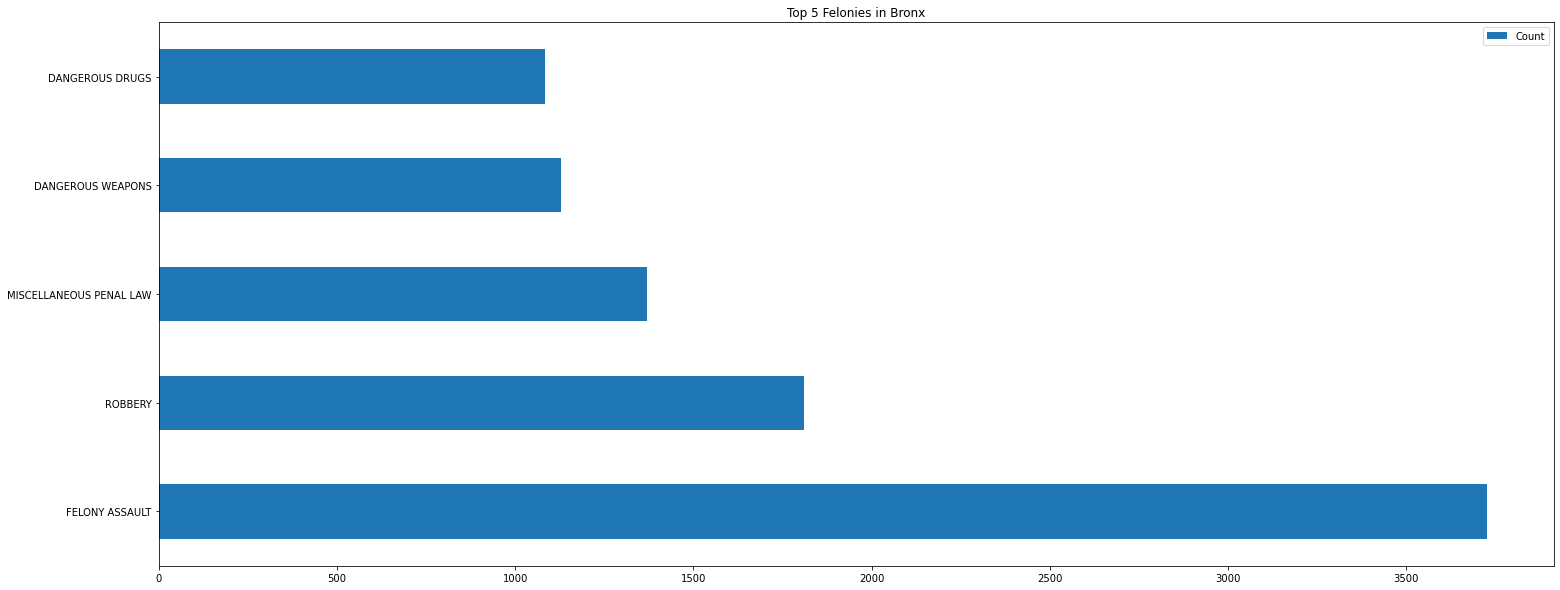

In [226]:
offense_bronx = offense_bronx.head(5)
offense_bronx.plot.barh(figsize = (25,10) )
plt.title('Top 5 Felonies in Bronx')
plt.savefig("Bronx Felonies.png")

In [191]:
clean_queens = cleaned_df.loc[cleaned_df['Arrest Borough'] == 'Queens'].dropna()
clean_queens_felonies = clean_queens.loc[clean_queens['Law Category CD'] == '1']

offense_queens = clean_queens_felonies['Offense Description 2'].value_counts().to_frame().rename(columns = {'Offense Description 2': 'Count'})

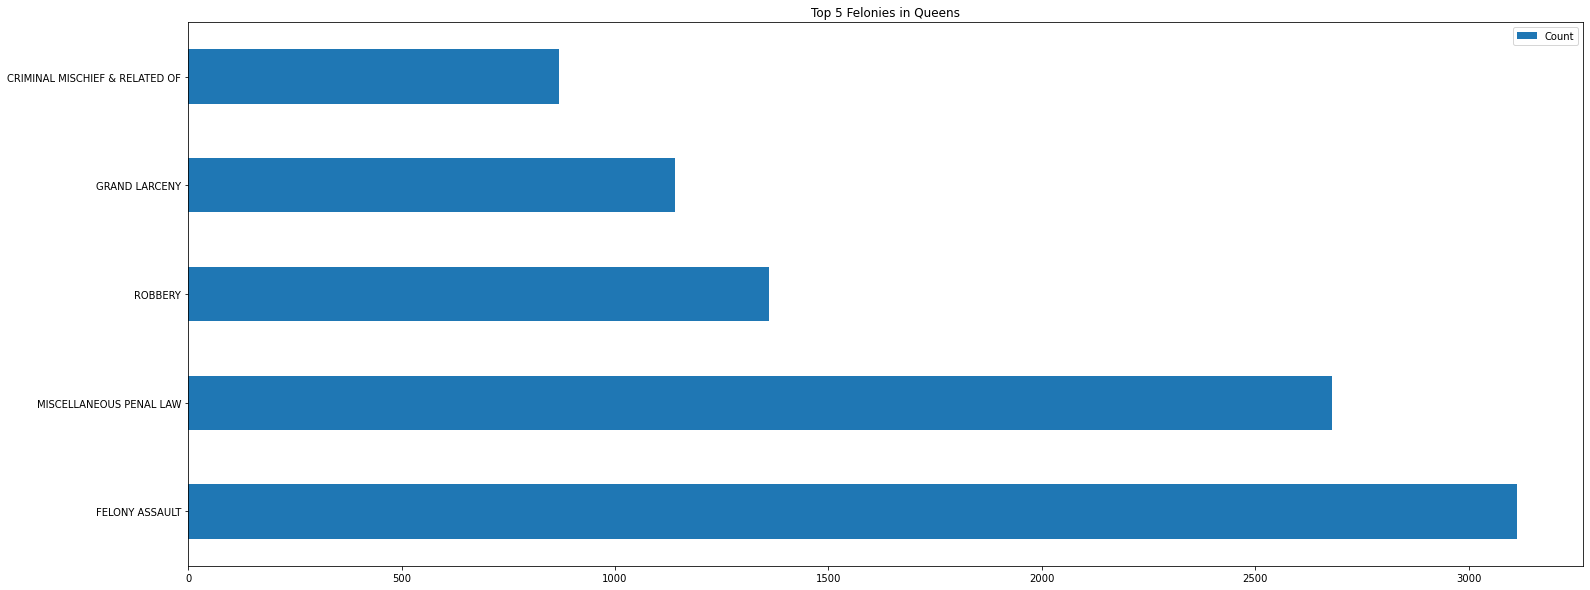

In [225]:
offense_queens = offense_queens.head(5)
offense_queens.plot.barh(figsize = (25,10) )
plt.title('Top 5 Felonies in Queens')
plt.savefig("Queens Felonies.png")

In [195]:
clean_staten = cleaned_df.loc[cleaned_df['Arrest Borough'] == 'Staten Island'].dropna()
clean_staten_felonies = clean_staten.loc[clean_staten['Law Category CD'] == '1']

offense_staten = clean_staten_felonies['Offense Description 2'].value_counts().to_frame().rename(columns = {'Offense Description 2': 'Count'})

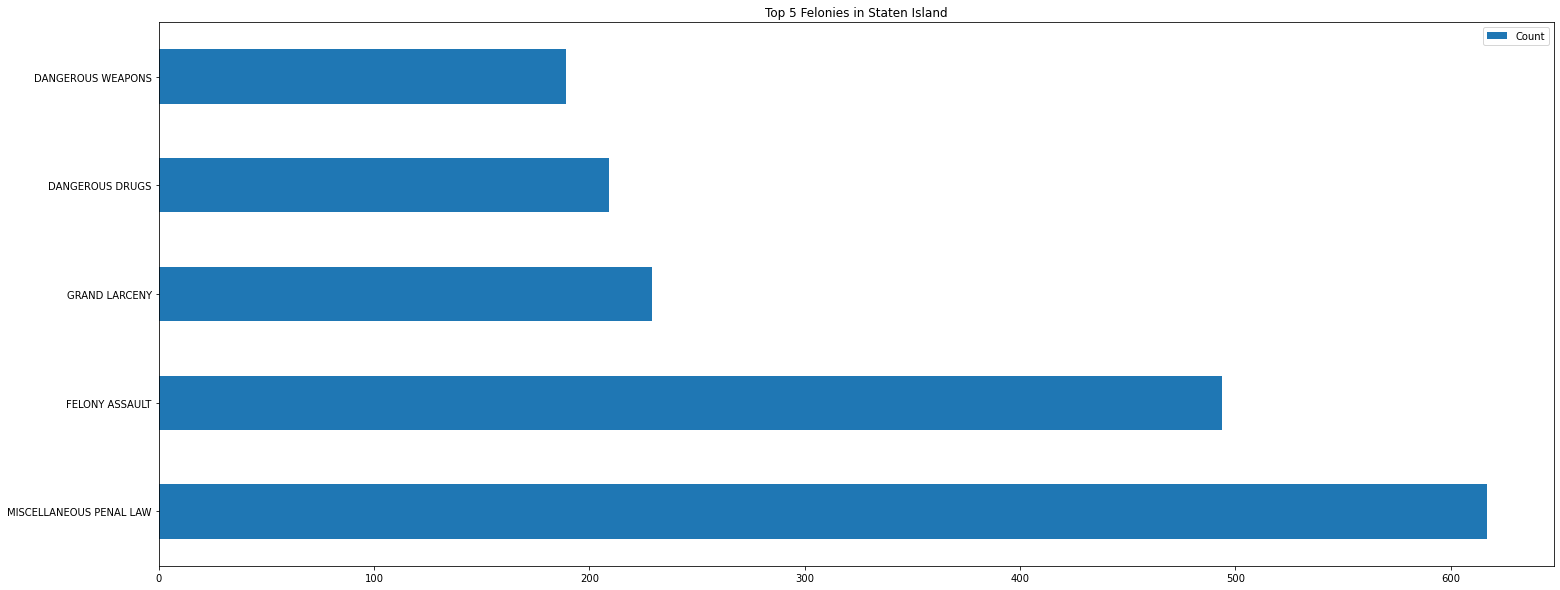

In [223]:
offense_staten = offense_staten.head(5)
offense_staten.plot.barh(figsize = (25,10) )
plt.title('Top 5 Felonies in Staten Island')
plt.savefig("Staten Island Felonies.png")

In [197]:
mid = cleaned_df.loc[cleaned_df['Age Group'] == '25-44']
mid_felonies = mid.loc[mid['Law Category CD'] == '1']
mid_offense = mid_felonies['Offense Description 2'].value_counts().to_frame().rename(columns = {'Offense Description 2': 'Count'})

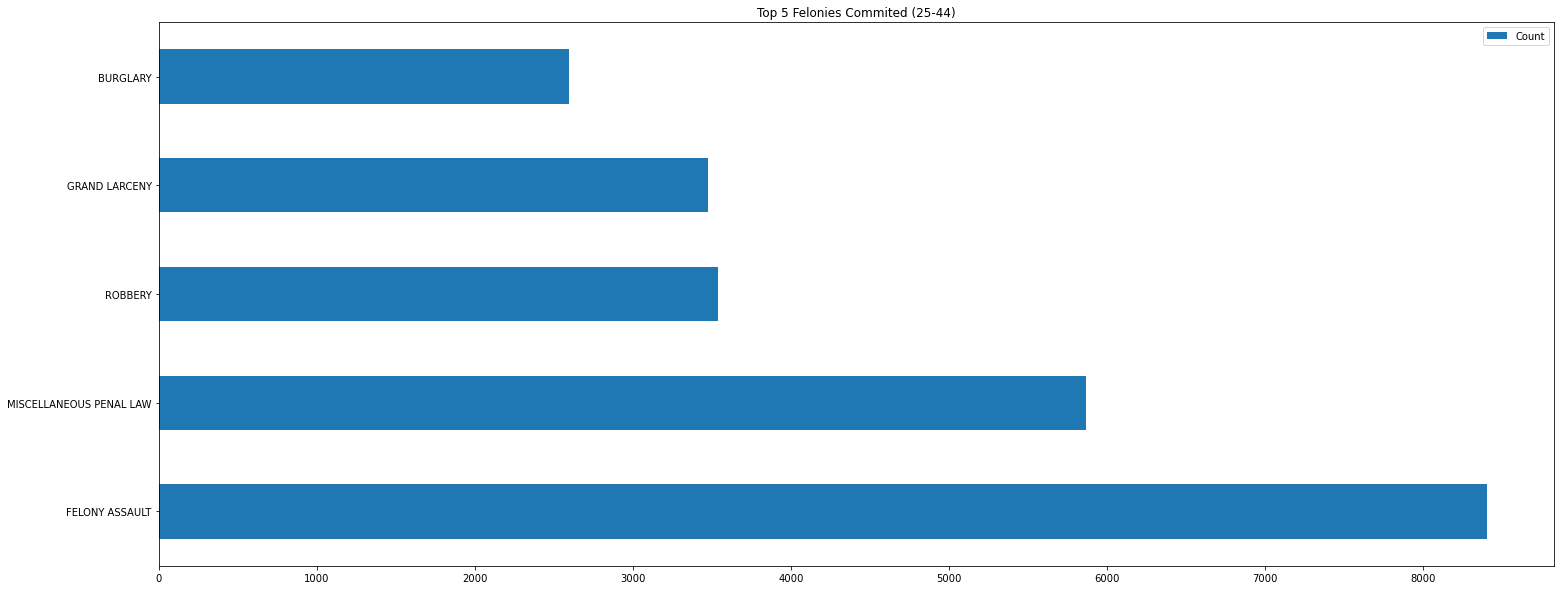

In [224]:
mid_offense = mid_offense.head(5)
mid_offense.plot.barh(figsize = (25,10) )
plt.title('Top 5 Felonies Commited (25-44)')
plt.savefig("25-44 Felonies.png")

In [201]:
old = cleaned_df.loc[cleaned_df['Age Group'] == '65+']
old_felonies = old.loc[old['Law Category CD'] == '1']
old_offense = old_felonies['Offense Description 2'].value_counts().to_frame().rename(columns = {'Offense Description 2': 'Count'})

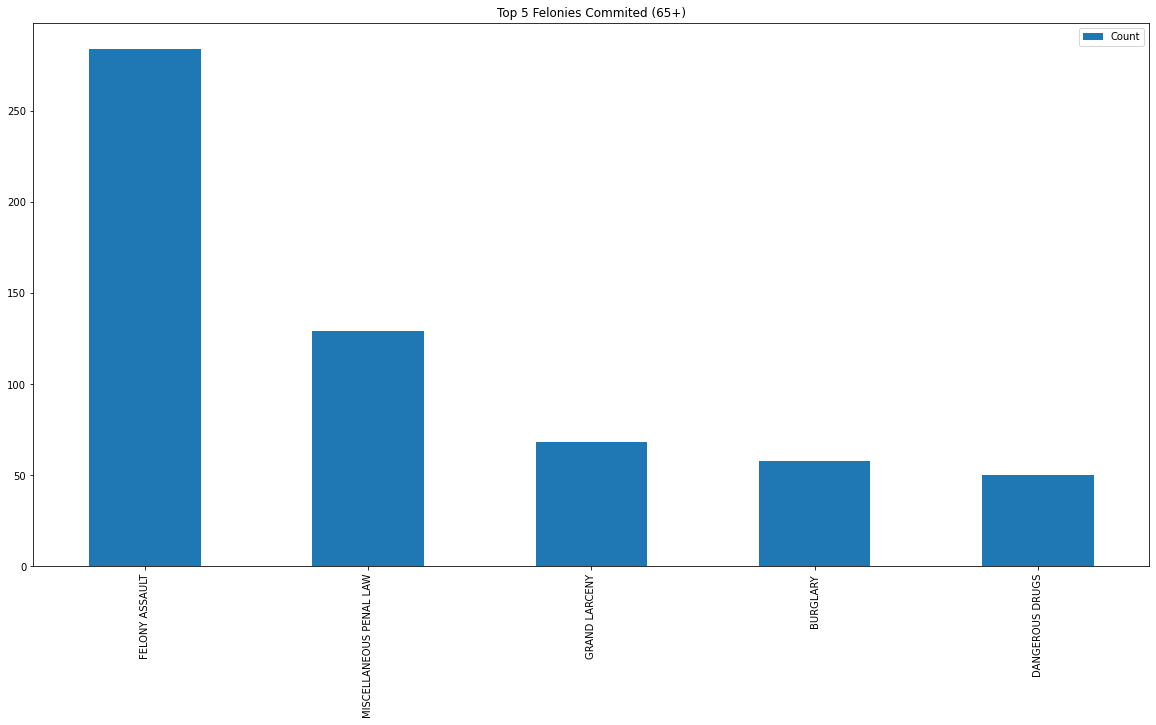

In [202]:
old_offense = old_offense.head(5)
old_offense.plot.bar(figsize = (20,10) )
plt.title('Top 5 Felonies Commited (65+)')
plt.savefig("65+ Felonies.png")

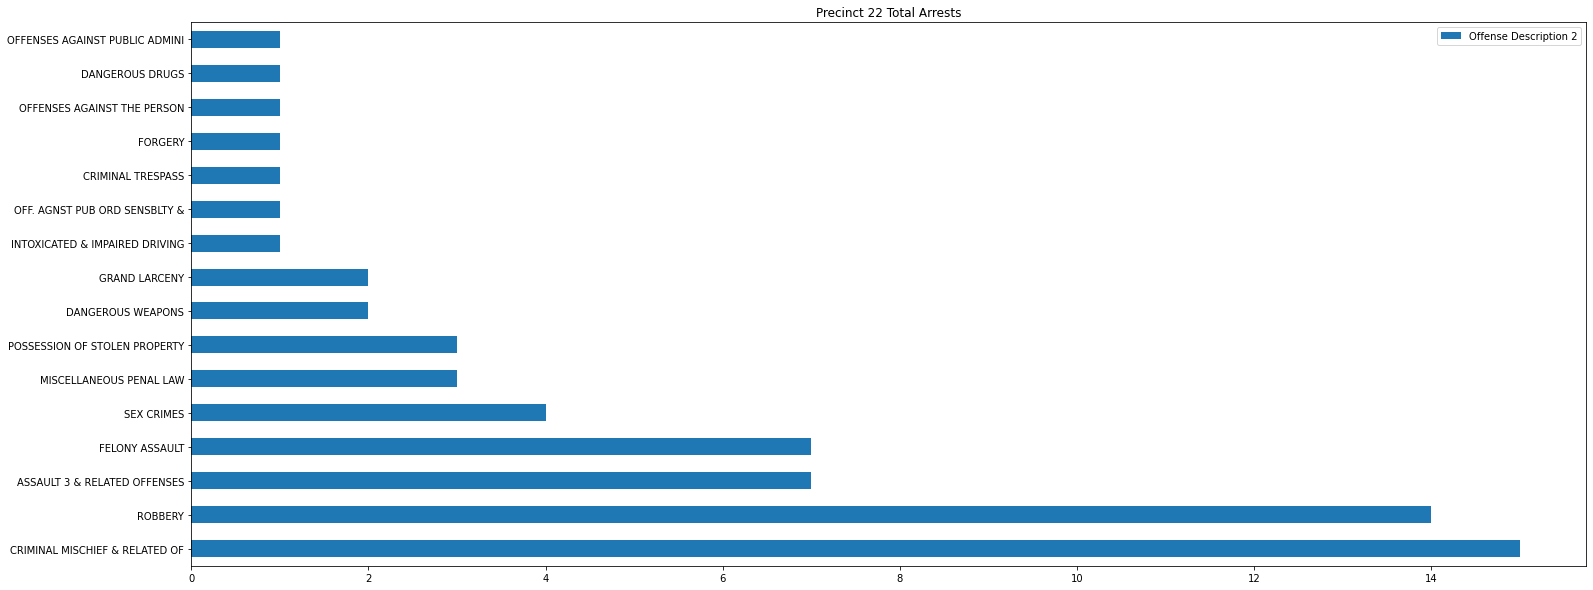

In [220]:
precinct_22 = cleaned_df.loc[cleaned_df['Arrest Precinct'] == 22]

precinct_22 = precinct_22['Offense Description 2'].value_counts().to_frame()

precinct_22.plot.barh(figsize = (25,10))
plt.title('Precinct 22 Total Arrests')
plt.savefig('Precinct 22 Arrests.png')

In [222]:
cleaned_df.loc[cleaned_df['Arrest Precinct'] == 22]

Arrest Date           Offense Description 2 Law Category CD  \
10826   03/02/2022                         ROBBERY               1   
13760   03/24/2022               DANGEROUS WEAPONS               1   
14200   03/02/2022                         ROBBERY               1   
17151   05/01/2022               DANGEROUS WEAPONS               3   
20486   06/04/2022                         ROBBERY               1   
...            ...                             ...             ...   
134755  09/14/2022                  FELONY ASSAULT               1   
135841  09/11/2022  CRIMINAL MISCHIEF & RELATED OF               3   
136112  09/08/2022                         ROBBERY               1   
137206  09/07/2022                      SEX CRIMES               1   
140295  08/30/2022  OFFENSES AGAINST PUBLIC ADMINI               3   

       Arrest Borough  Arrest Precinct Age Group Gender  \
10826       Manhattan               22       <18      1   
13760       Manhattan               22     25-44      1   
14200       Manhattan               22       <18      1   
17151       Manhattan               22     45-64      1   
20486       Manhattan               22     18-24      1   
...               ...              ...       ...    ...   
134755      Manhattan               22     25-44      1   
135841      Manhattan               22     25-44      1   
136112      Manhattan               22     18-24      1   
137206      Manhattan               22     25-44      1   
140295      Manhattan               22     25-44      1   

                                          Geocoded  
10826   POINT (-73.9658782689495 40.7824518600123)  
13760   POINT (-73.9658782689495 40.7824518600123)  
14200             POINT (-73.97468318 40.77470844)  
17151             POINT (-73.97454426 40.76976514)  
20486             POINT (-73.96721547 40.78447508)  
...                                            ...  
134755  POINT (-73.9658782689495 40.7824518600123)  
135841            POINT (-73.97454426 40.76976514)  
136112                POINT (-73.964842 40.783636)  
137206  POINT (-73.9658782689495 40.7824518600123)  
140295            POINT (-73.96256406 40.79163467)  

[64 rows x 8 columns]